## EDA INICIAL

#### Distribucion de variables con respecto al target

In [23]:
# Definimos el target

target = 'HasDetections'

In [24]:
# Seleccionamos como índice el identificador de dispositivo

df.set_index('MachineIdentifier', inplace = True)


In [25]:
# Separamos variables numéricas, boleanas y categóricas

def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2  and i not in target:
               lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="b" or dataset[i].dtype.kind=="i")  and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O")  and i not in target:
              lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

In [26]:
lnum, lbool, lcat= obtener_lista_variables(df)

##### Numericas

In [27]:
lnum

['RtpStateBitfield',
 'DefaultBrowsersIdentifier',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'OsBuild',
 'OsSuite',
 'IsProtected',
 'SMode',
 'IeVerIdentifier',
 'Firewall',
 'UacLuaenable',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_OSInstallLanguageIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census_IsFlightingInternal',
 'Census_IsFlightsDisabled

In [28]:
len(lnum)

42

##### Booleans

In [29]:
lbool

['IsBeta',
 'IsSxsPassiveMode',
 'HasTpm',
 'AutoSampleOptIn',
 'Census_HasOpticalDiskDrive',
 'Census_IsPortableOperatingSystem',
 'Census_IsSecureBootEnabled',
 'Census_IsTouchEnabled',
 'Census_IsPenCapable']

In [30]:
len(lbool)

9

##### Categoricas

In [31]:
lcat

['ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'Platform',
 'Processor',
 'OsVer',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'PuaMode',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing']

In [32]:
len(lcat)

29

##### Representación gráfica de variables numéricas con respecto al target

In [33]:
def explore_columns_v2(df):
  for column in lnum:
 # Imprimir nombre de la columna
        print(f"\n\nExploring Column: {column}\n")

        # Boxplot
        plt.figure(figsize=[20, 5])
        sns.boxplot(data=df, x='HasDetections', y=column)
        plt.title(f'Box Plot for {column}')
        plt.show()



Exploring Column: RtpStateBitfield



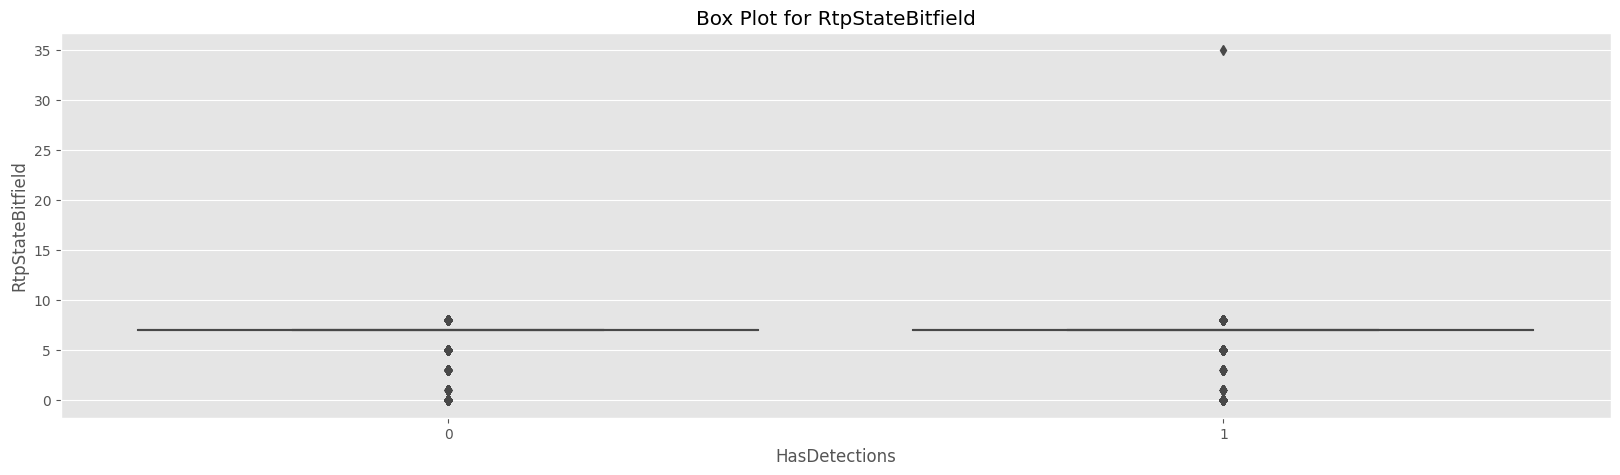



Exploring Column: DefaultBrowsersIdentifier



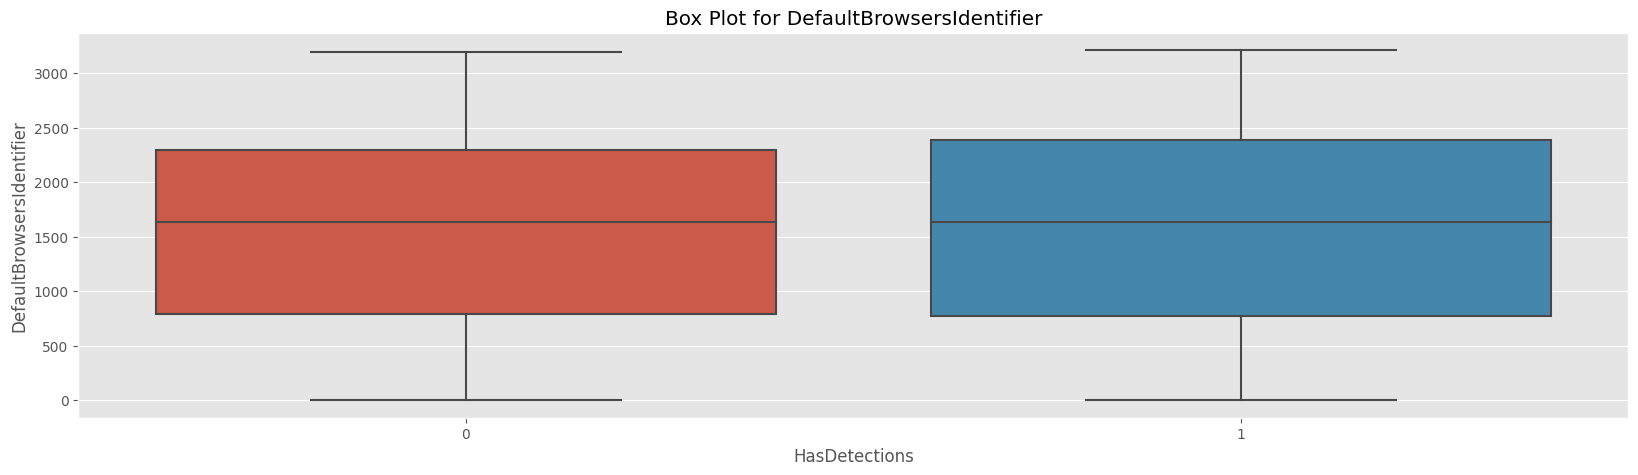



Exploring Column: AVProductStatesIdentifier



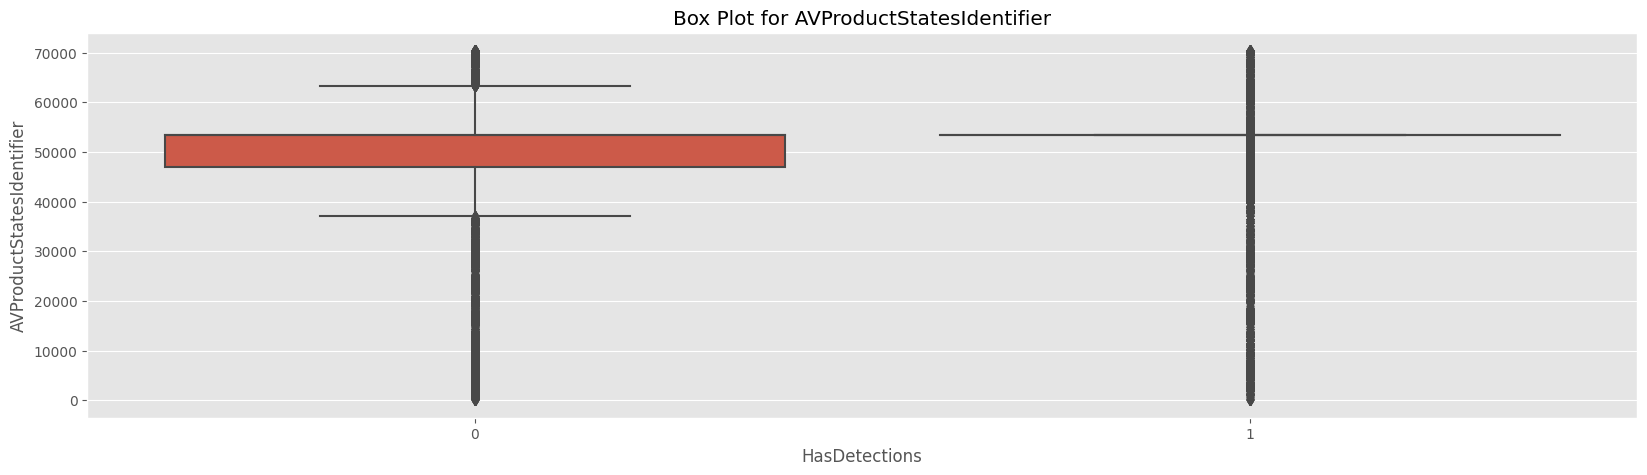



Exploring Column: AVProductsInstalled



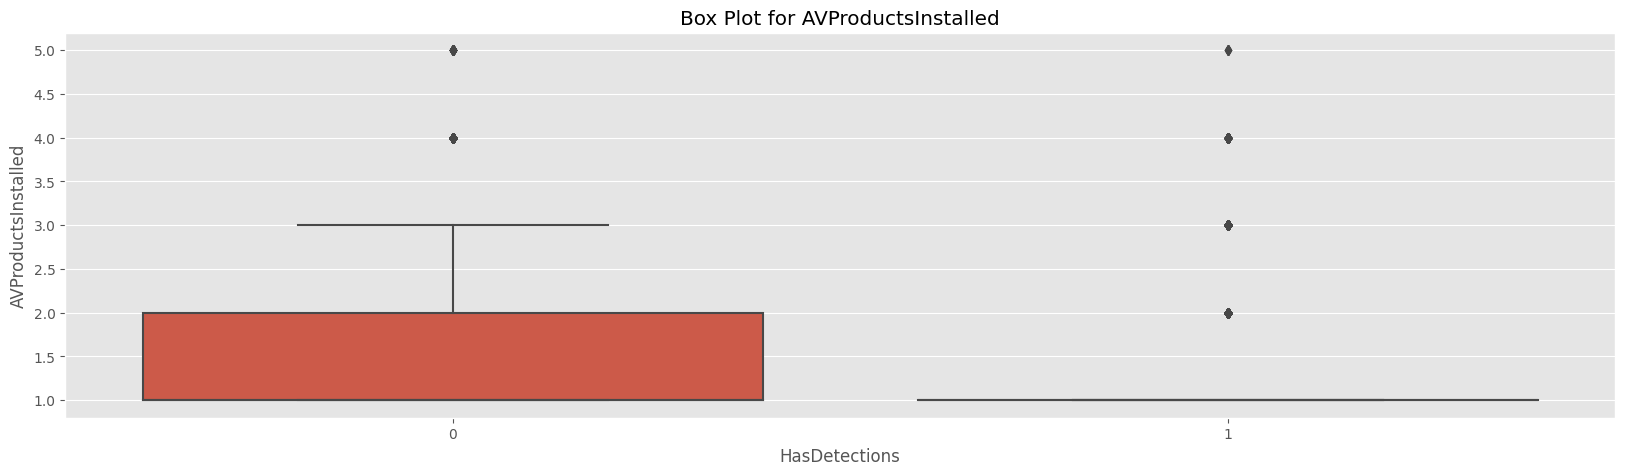



Exploring Column: AVProductsEnabled



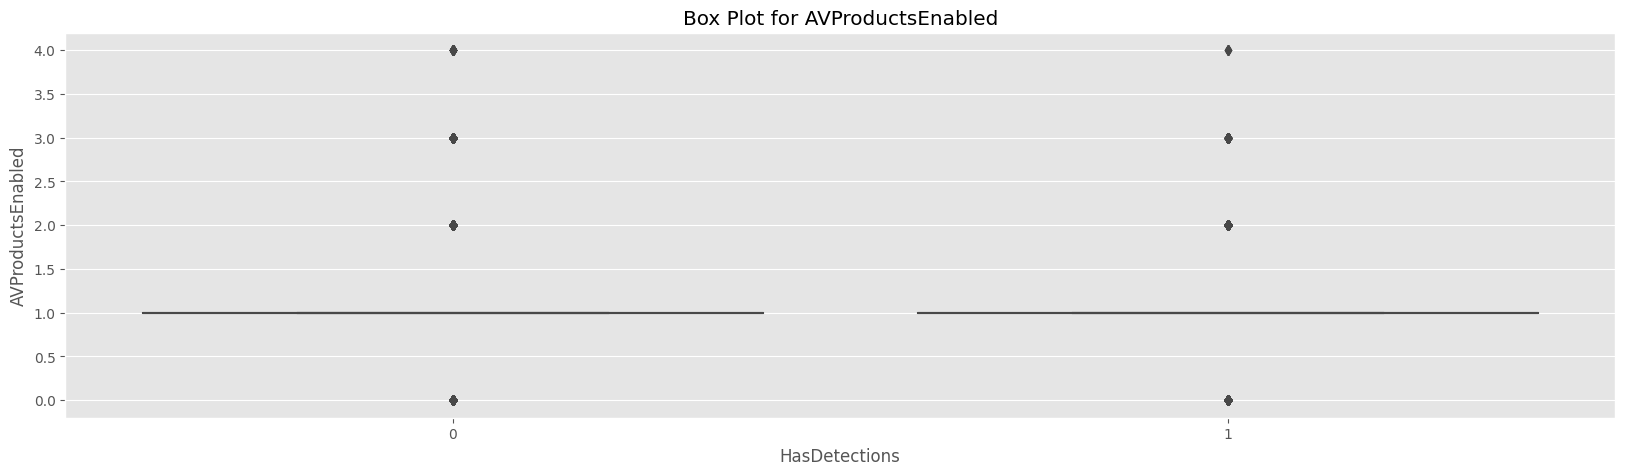



Exploring Column: CountryIdentifier



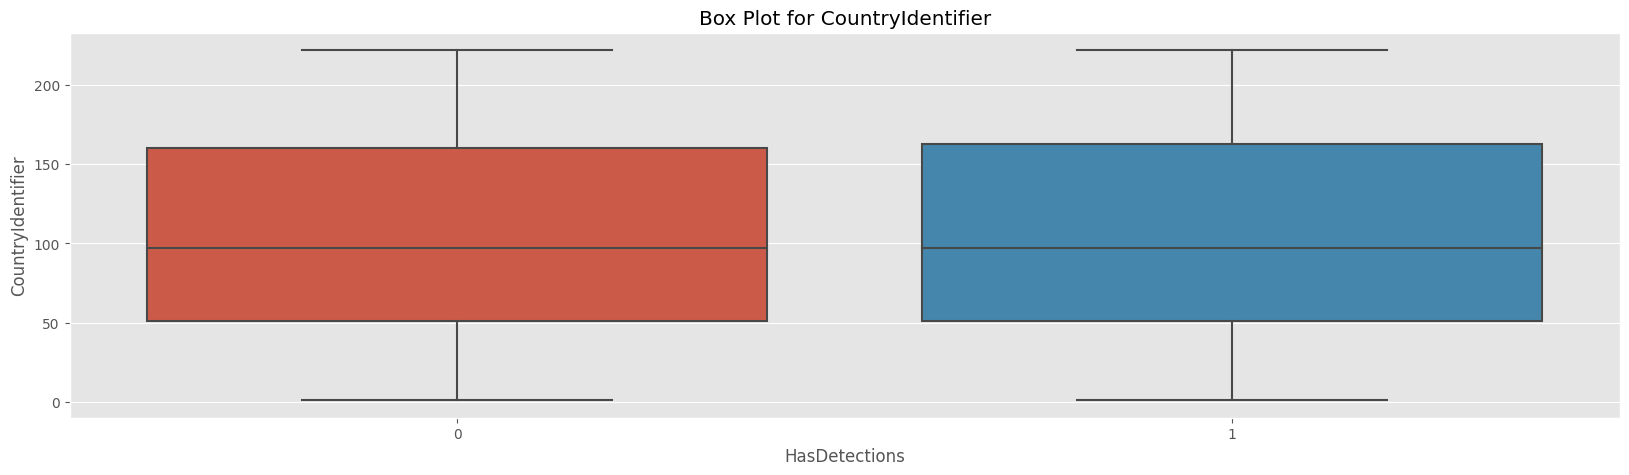



Exploring Column: CityIdentifier



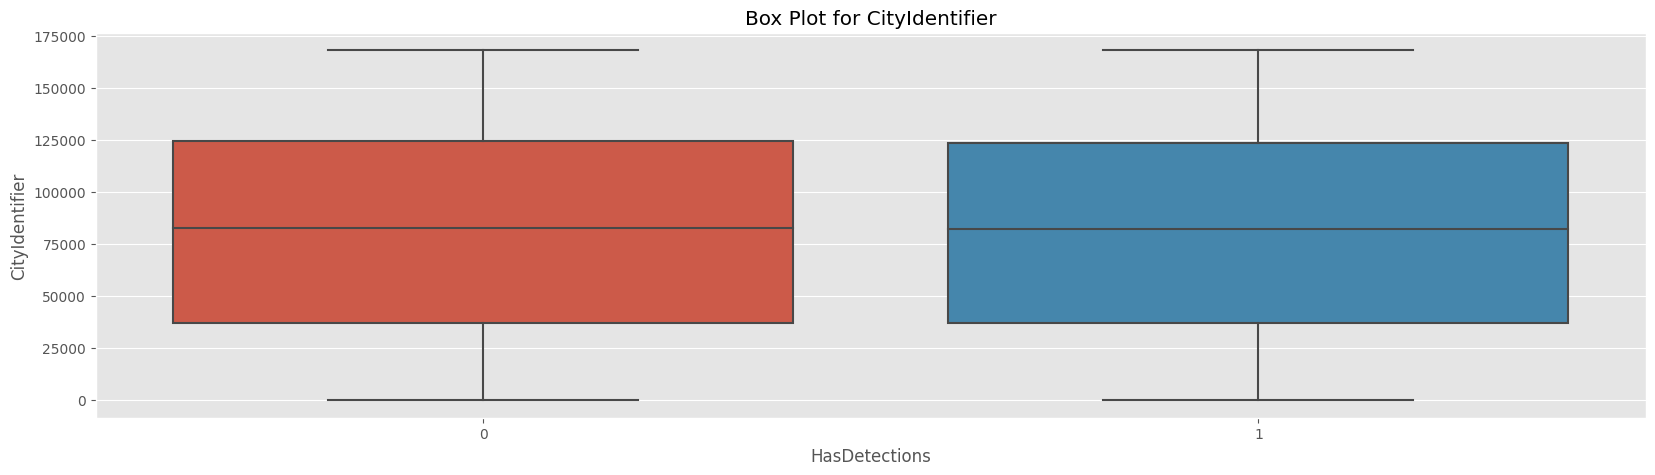



Exploring Column: OrganizationIdentifier



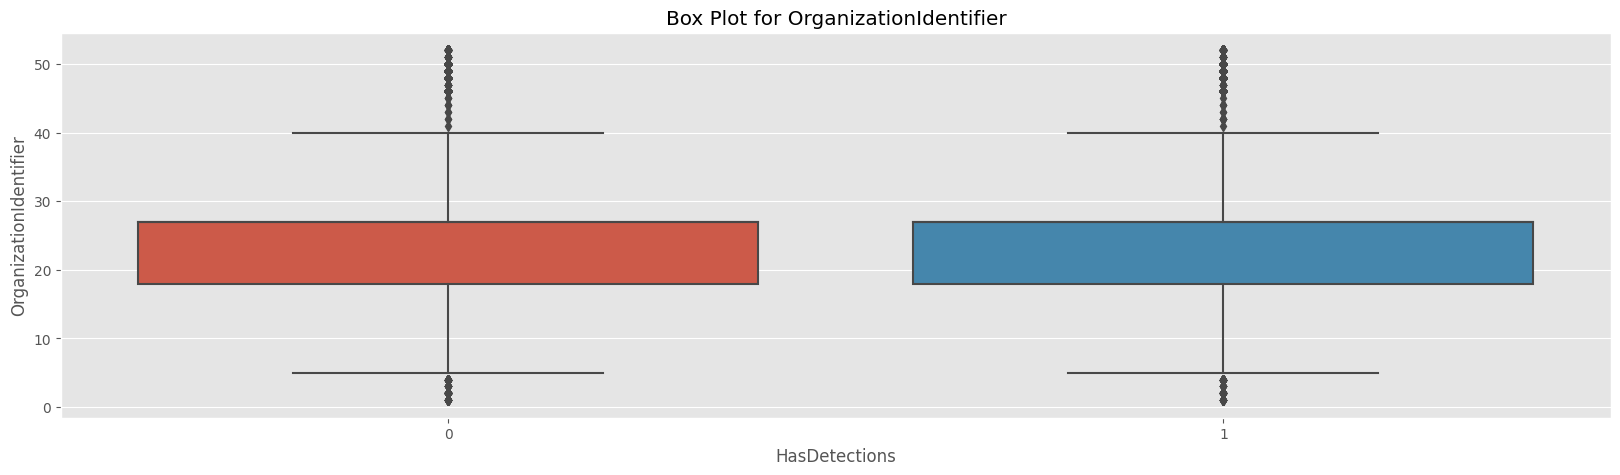



Exploring Column: GeoNameIdentifier



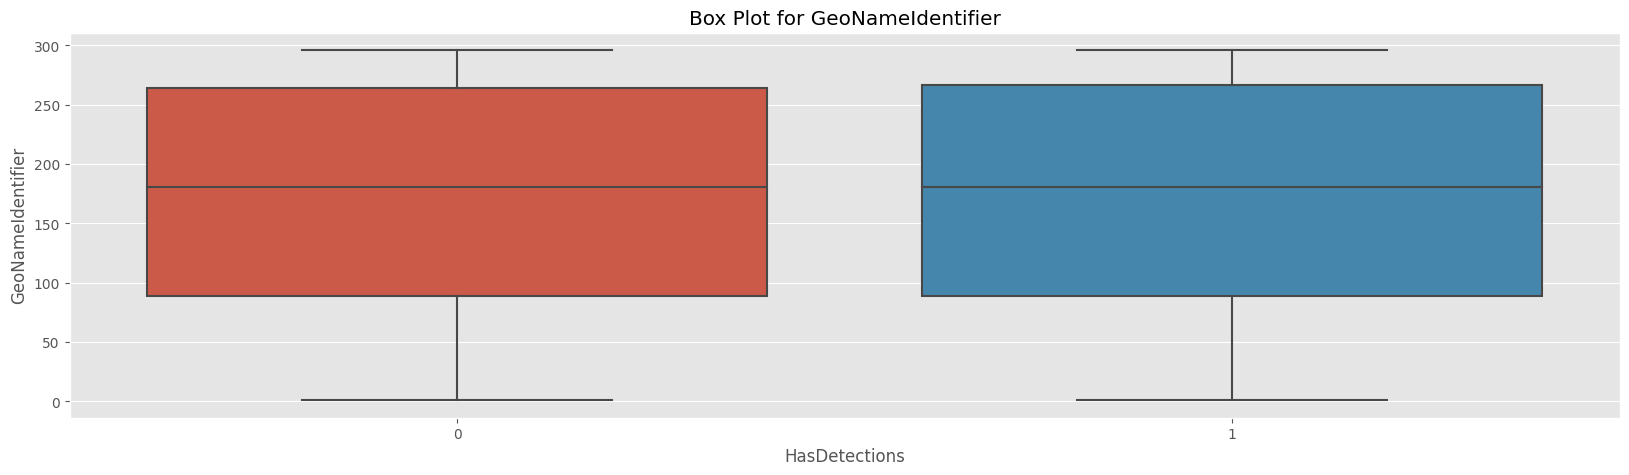



Exploring Column: LocaleEnglishNameIdentifier



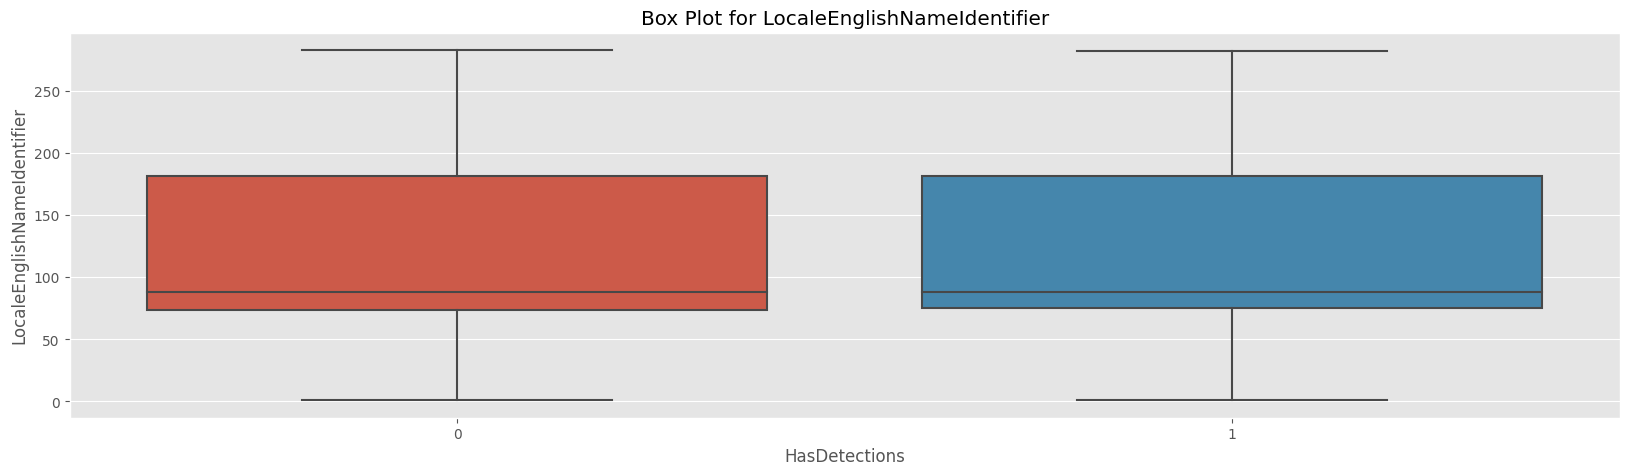



Exploring Column: OsBuild



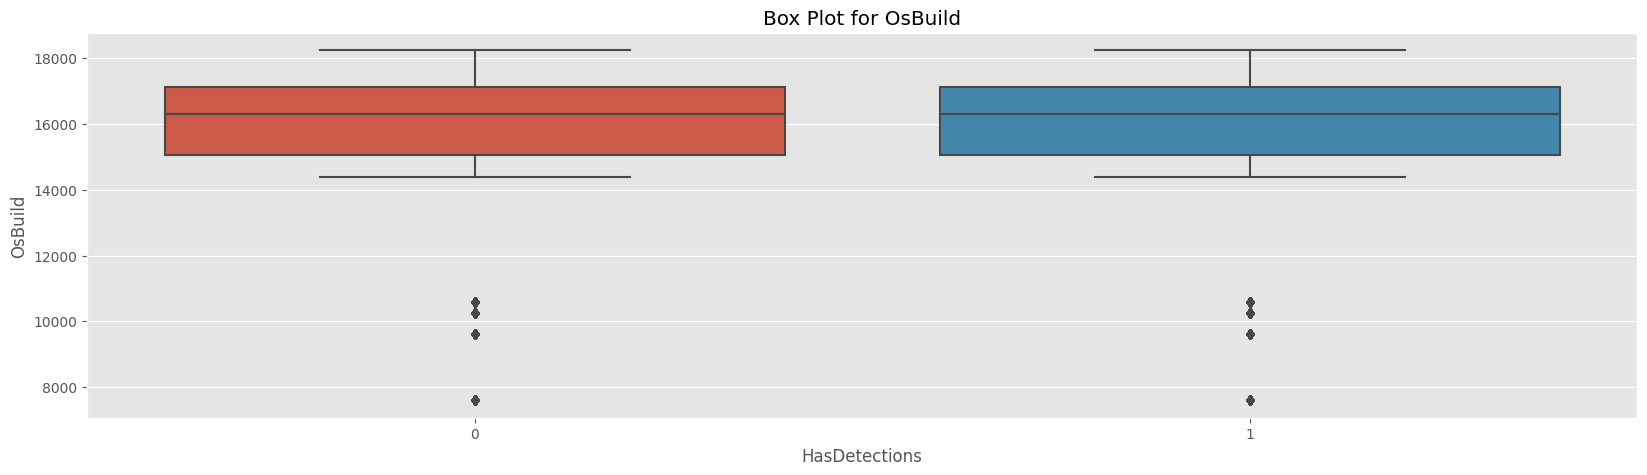



Exploring Column: OsSuite



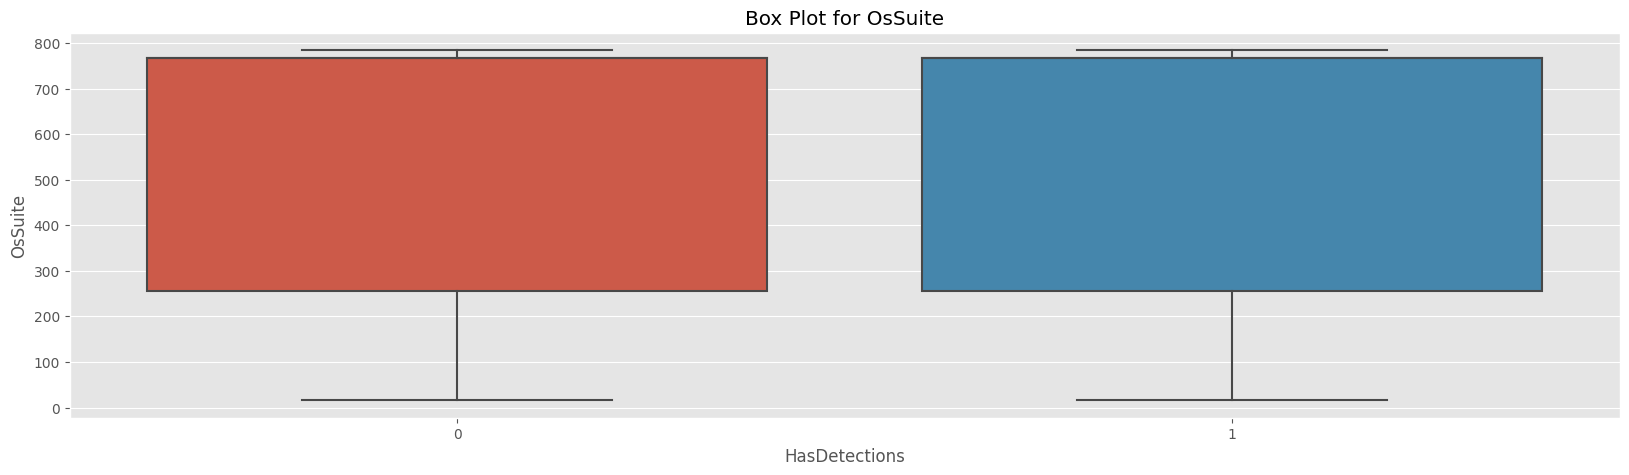



Exploring Column: IsProtected



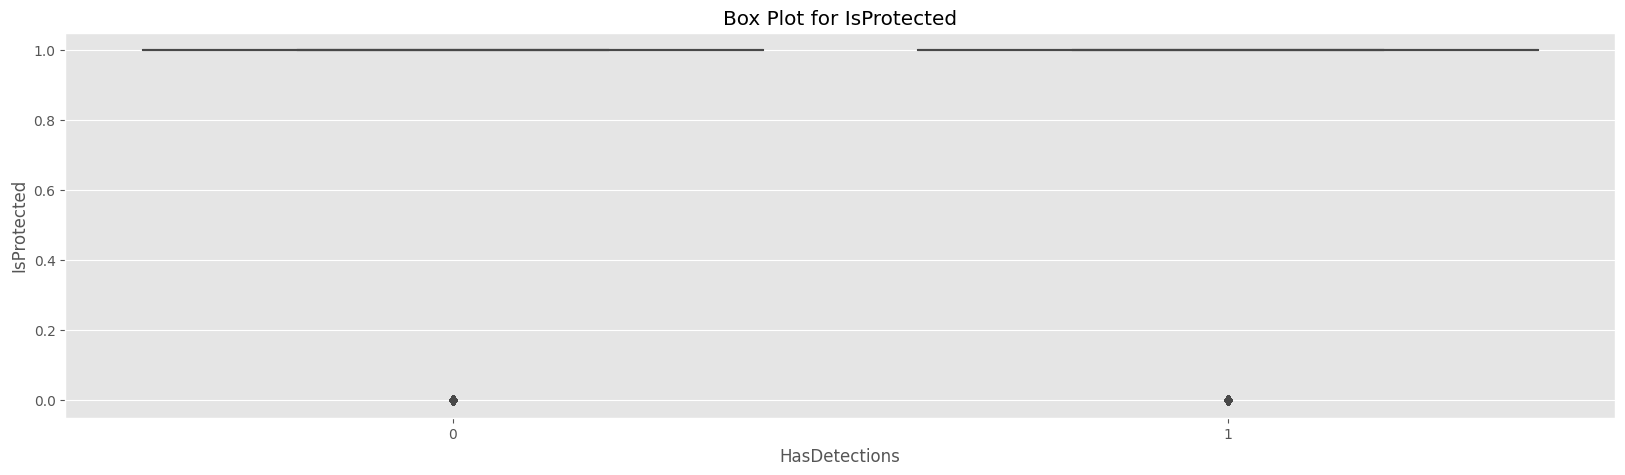



Exploring Column: SMode



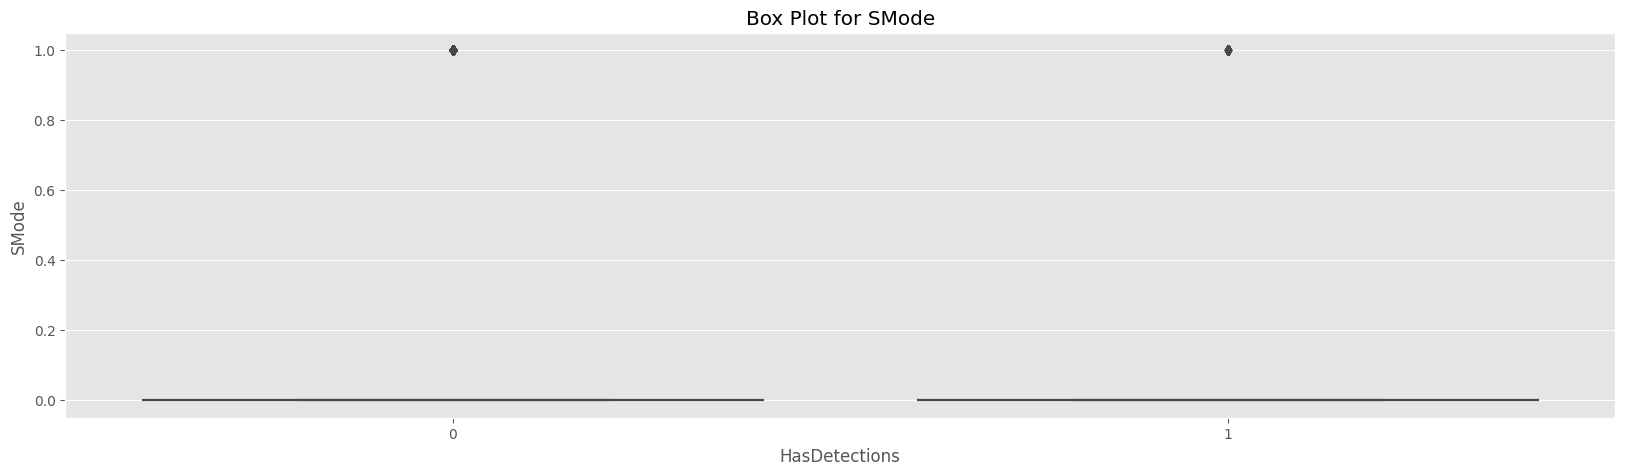



Exploring Column: IeVerIdentifier



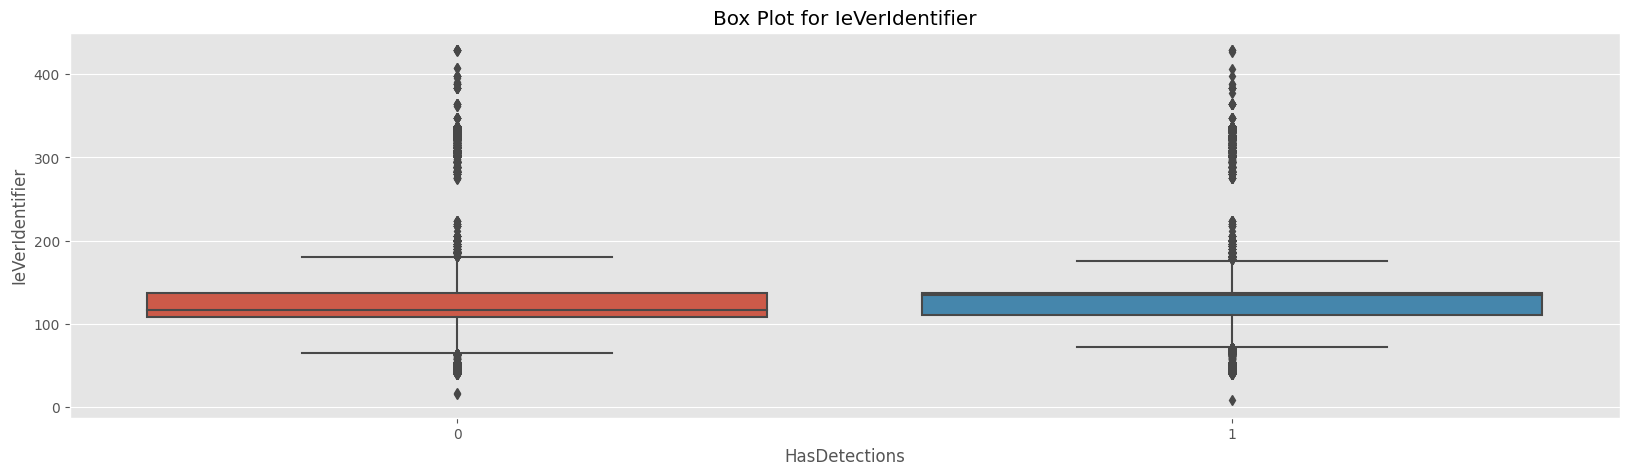



Exploring Column: Firewall



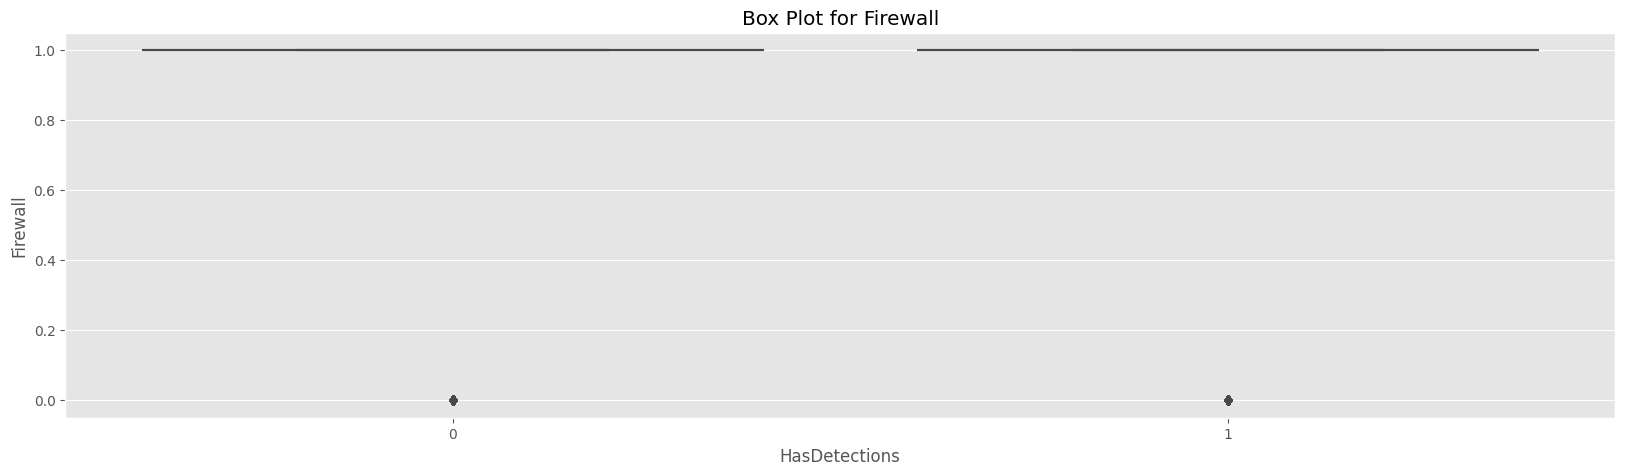



Exploring Column: UacLuaenable



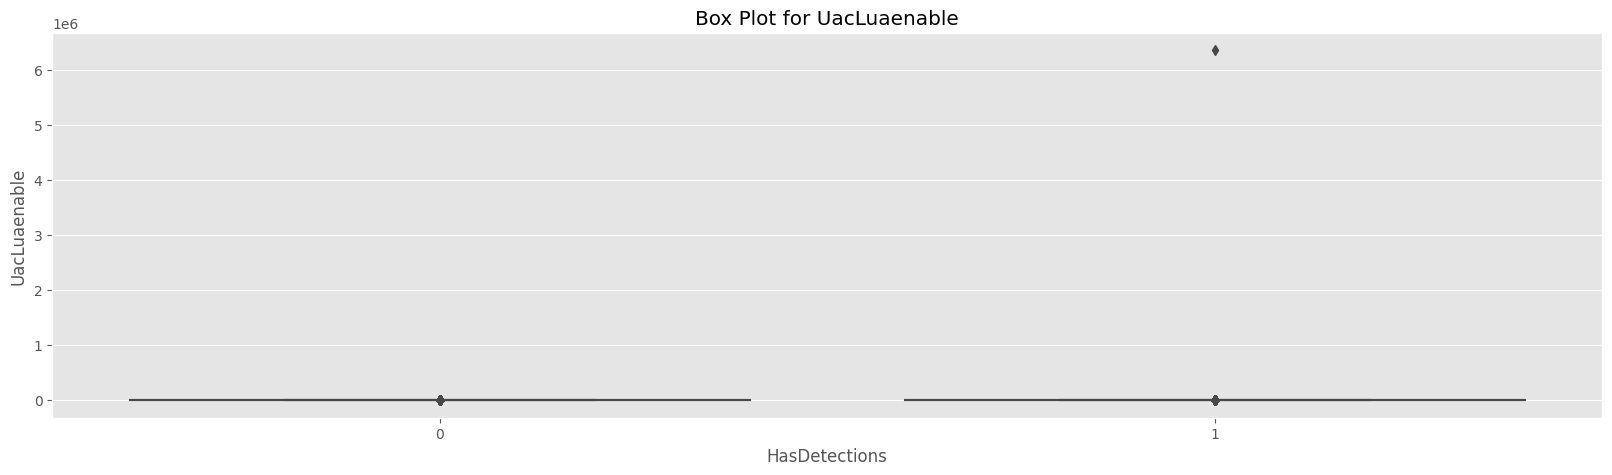



Exploring Column: Census_OEMNameIdentifier



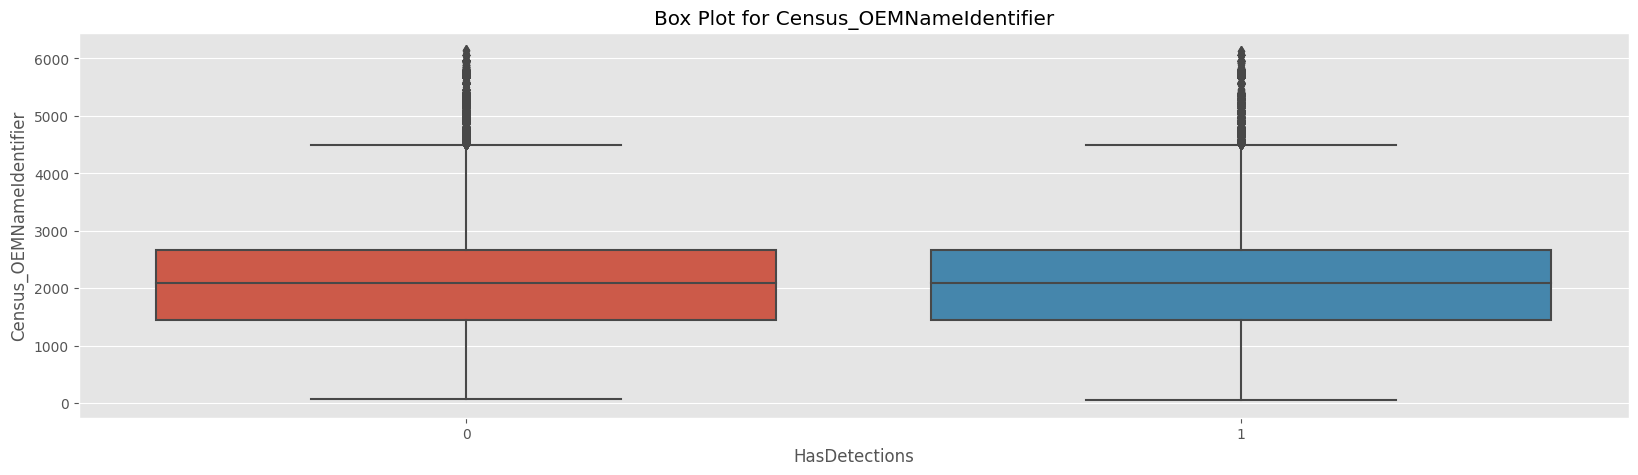



Exploring Column: Census_OEMModelIdentifier



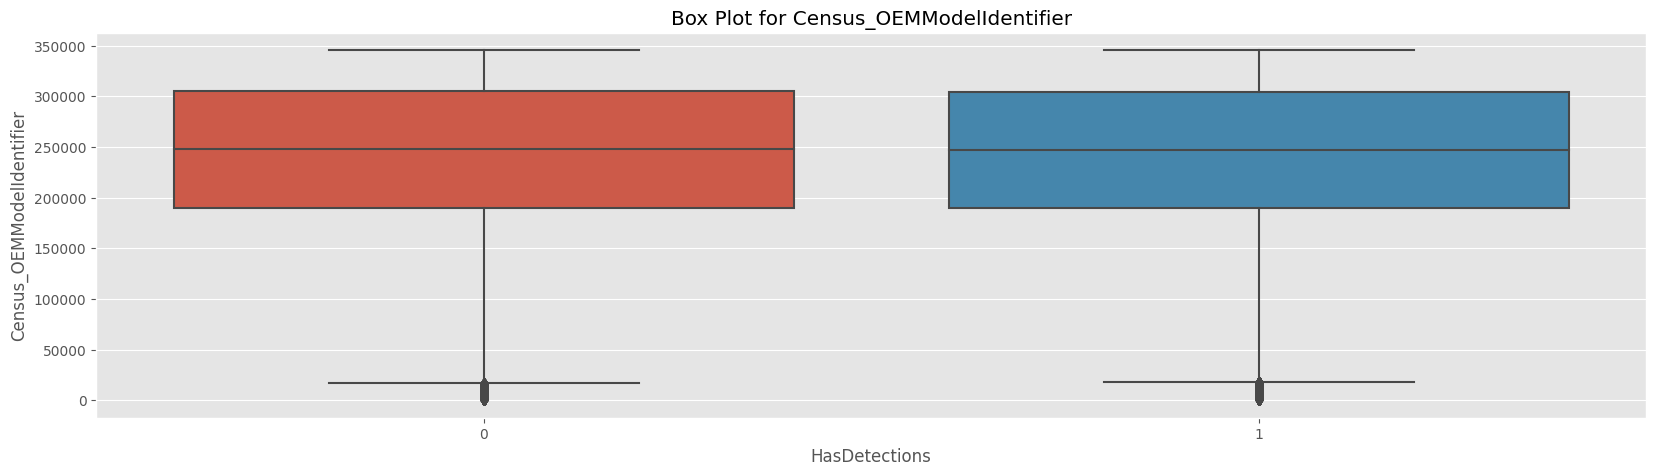



Exploring Column: Census_ProcessorCoreCount



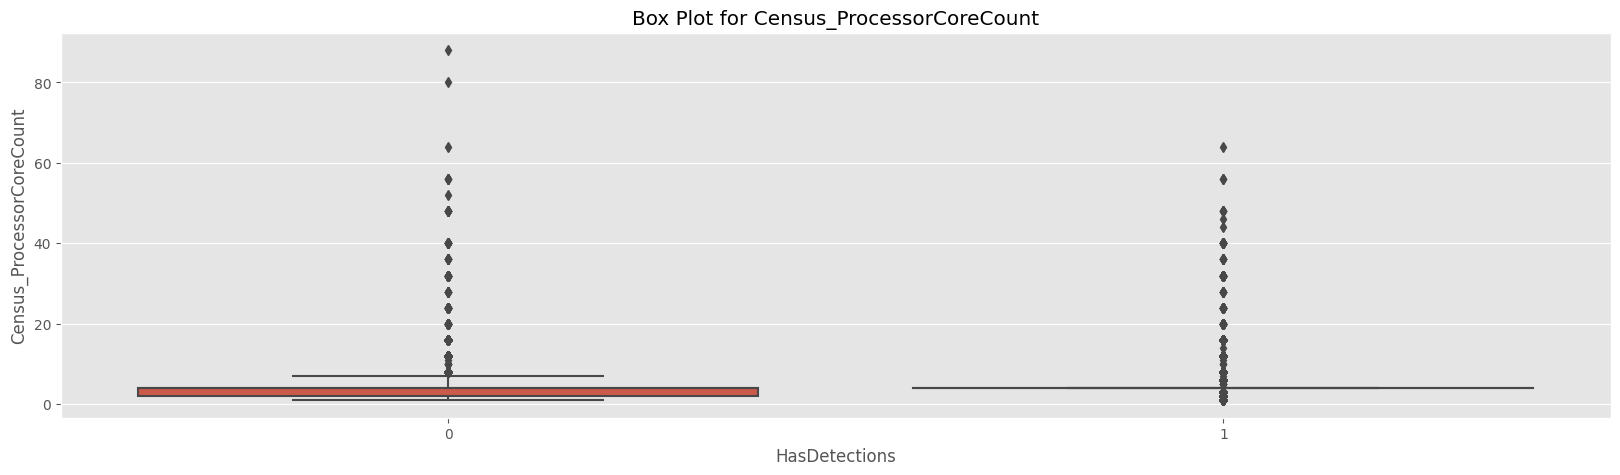



Exploring Column: Census_ProcessorManufacturerIdentifier



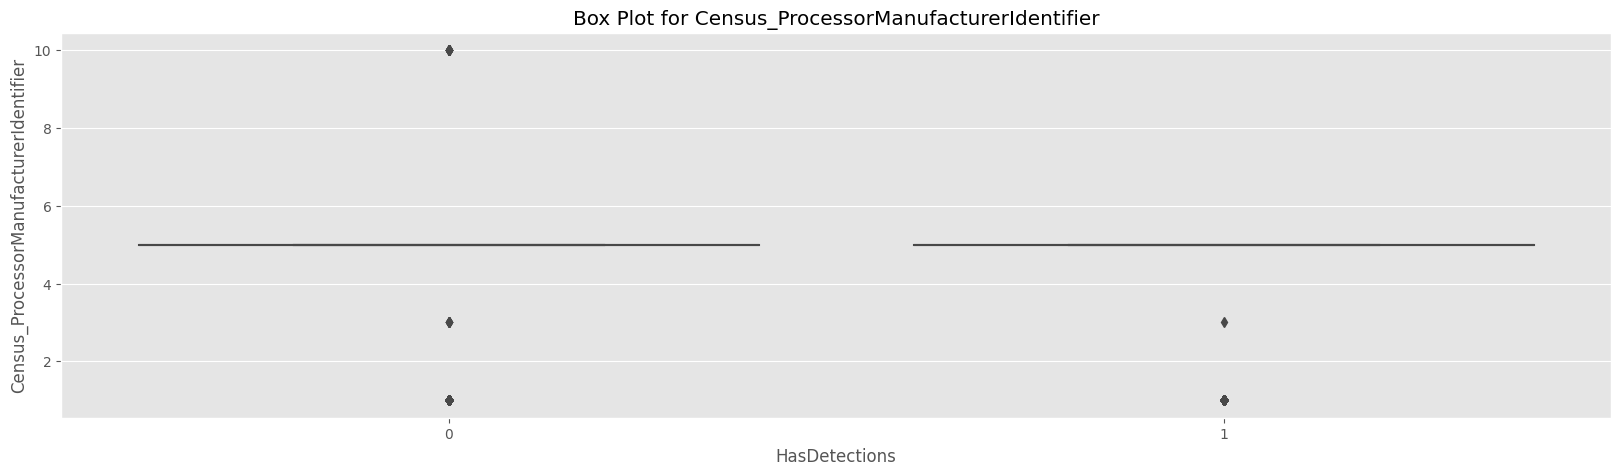



Exploring Column: Census_ProcessorModelIdentifier



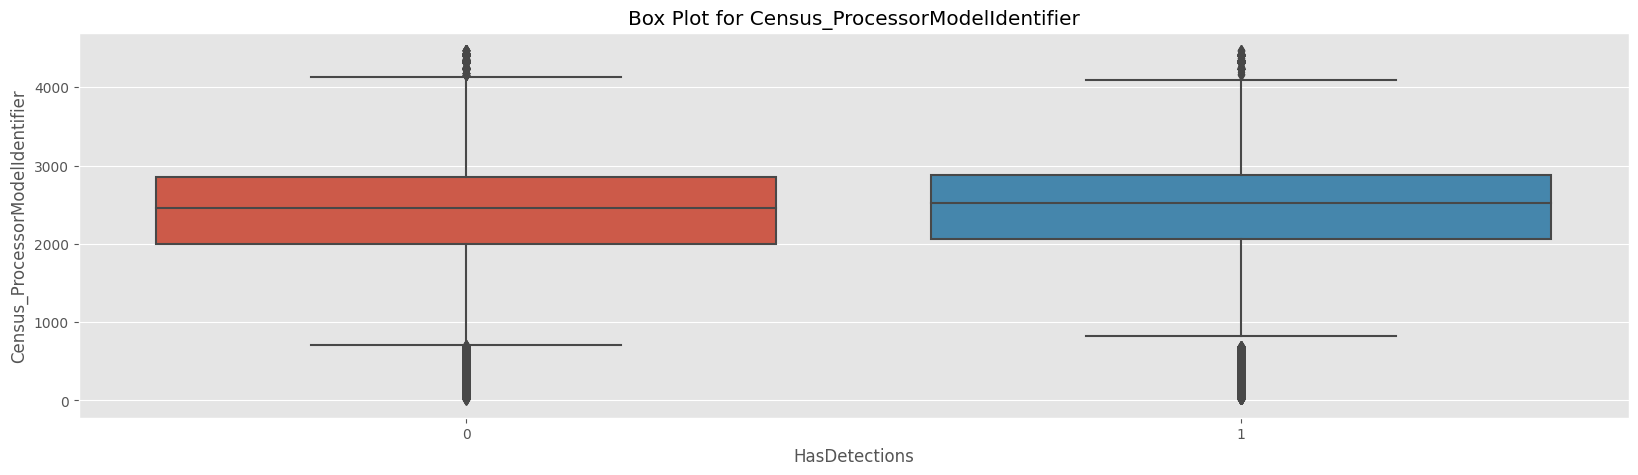



Exploring Column: Census_PrimaryDiskTotalCapacity



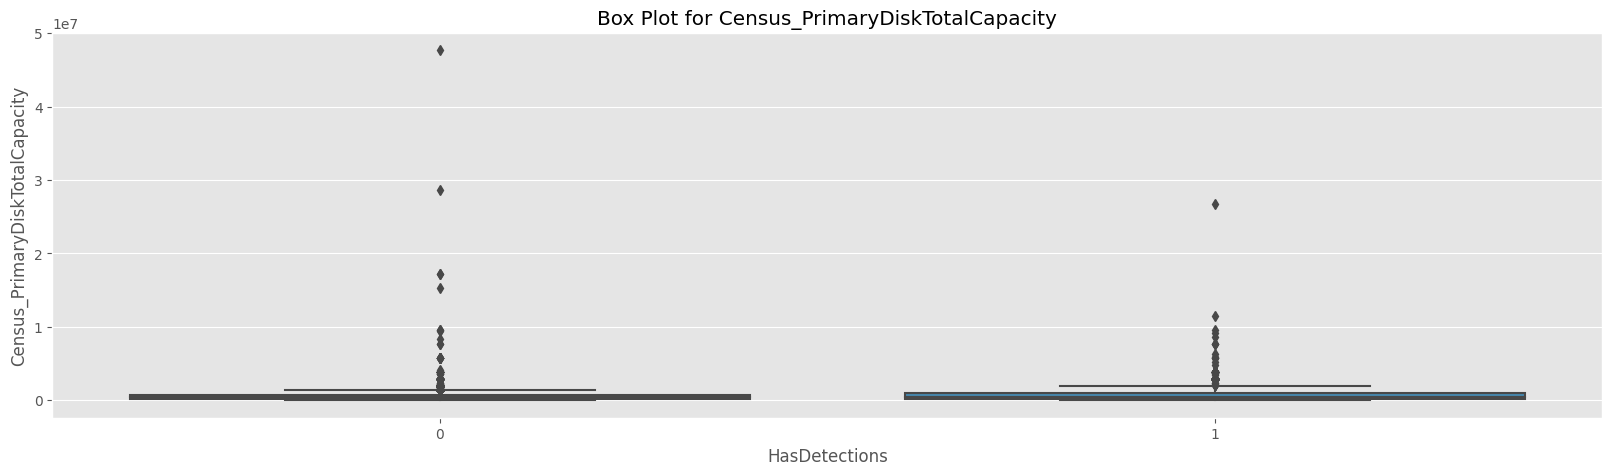



Exploring Column: Census_SystemVolumeTotalCapacity



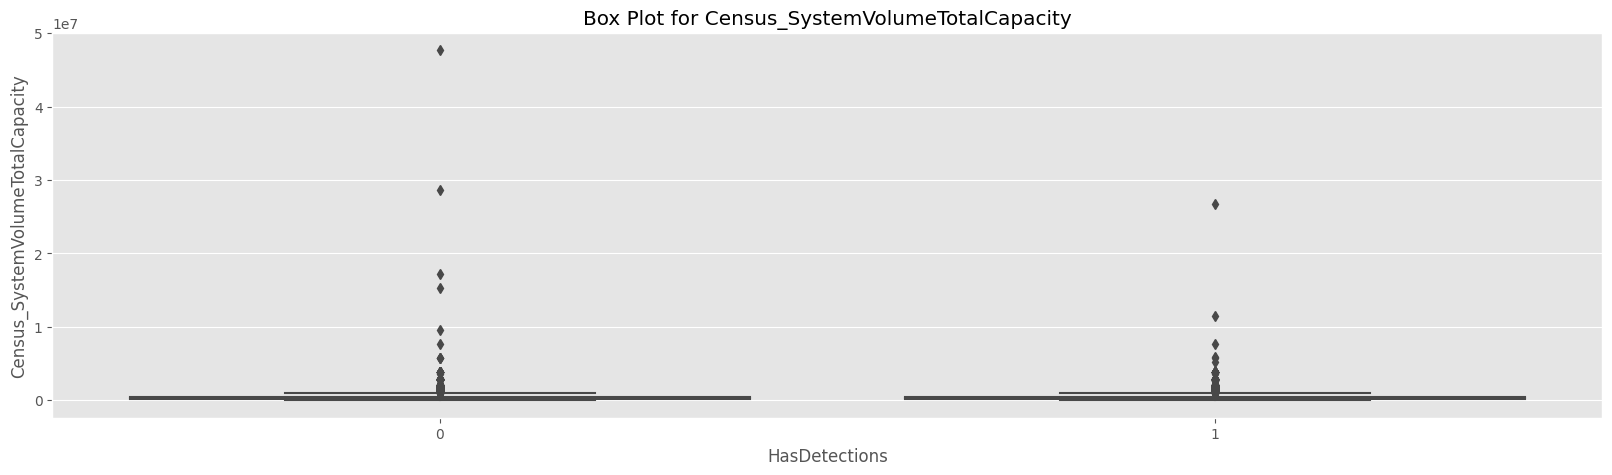



Exploring Column: Census_TotalPhysicalRAM



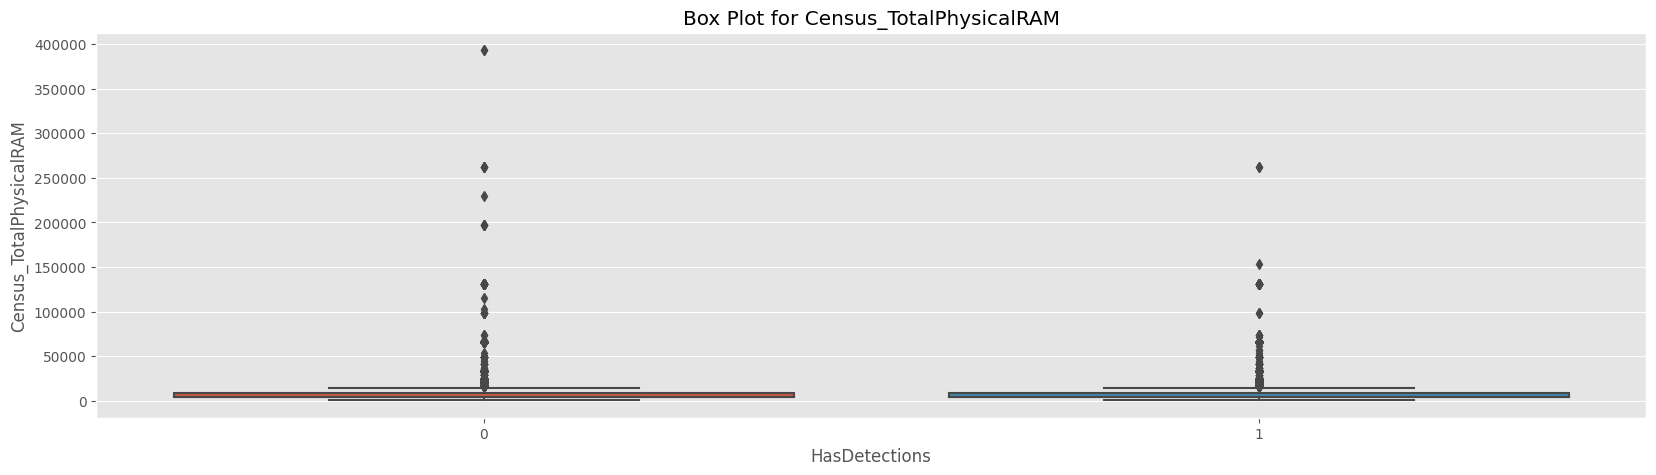



Exploring Column: Census_InternalPrimaryDiagonalDisplaySizeInInches



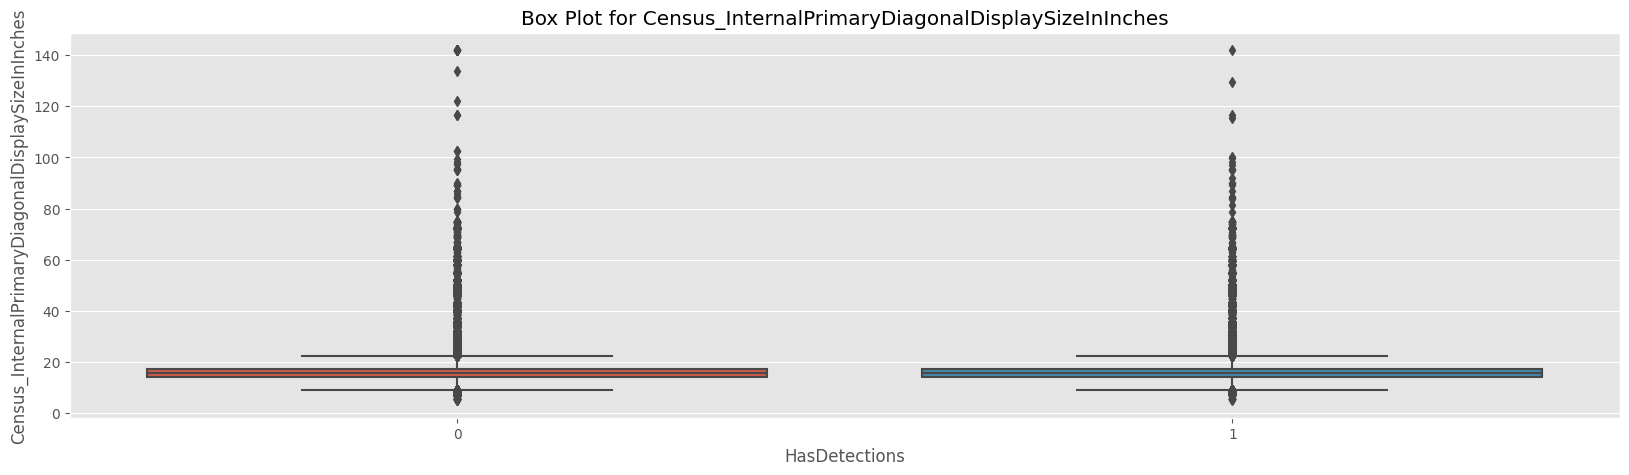



Exploring Column: Census_InternalPrimaryDisplayResolutionHorizontal



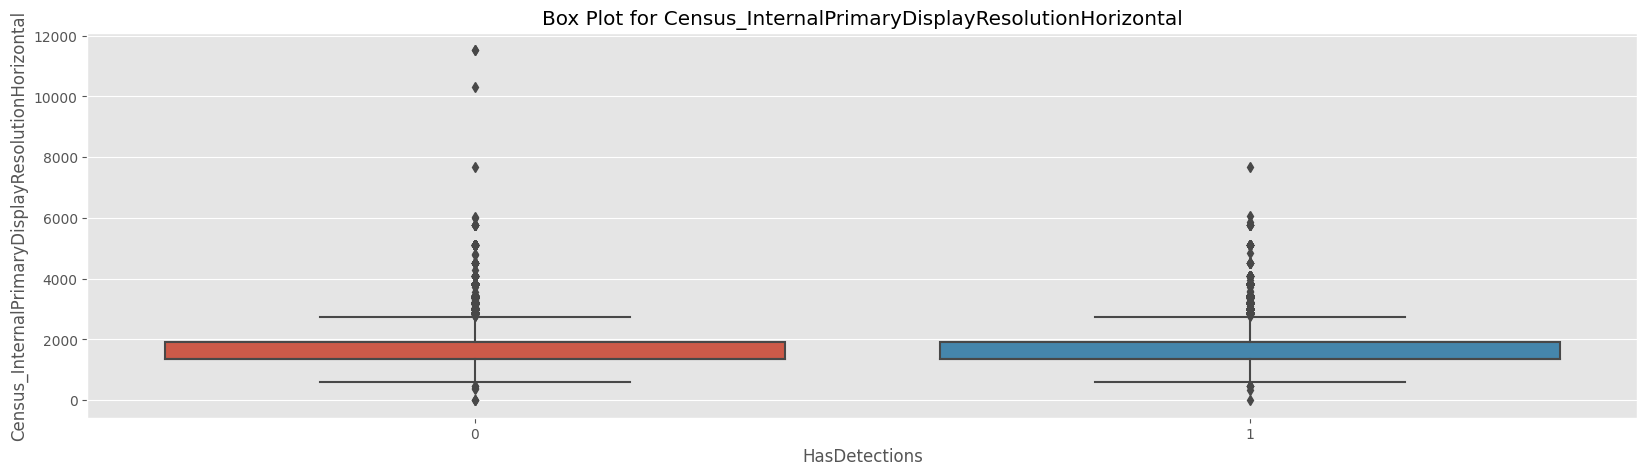



Exploring Column: Census_InternalPrimaryDisplayResolutionVertical



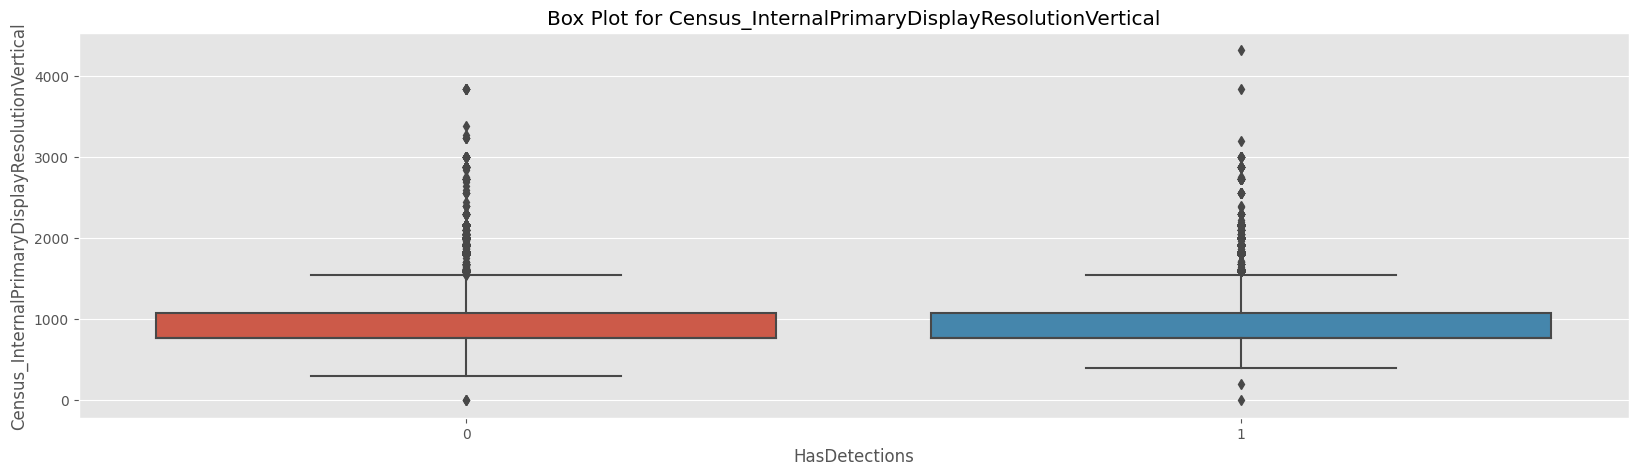



Exploring Column: Census_InternalBatteryNumberOfCharges



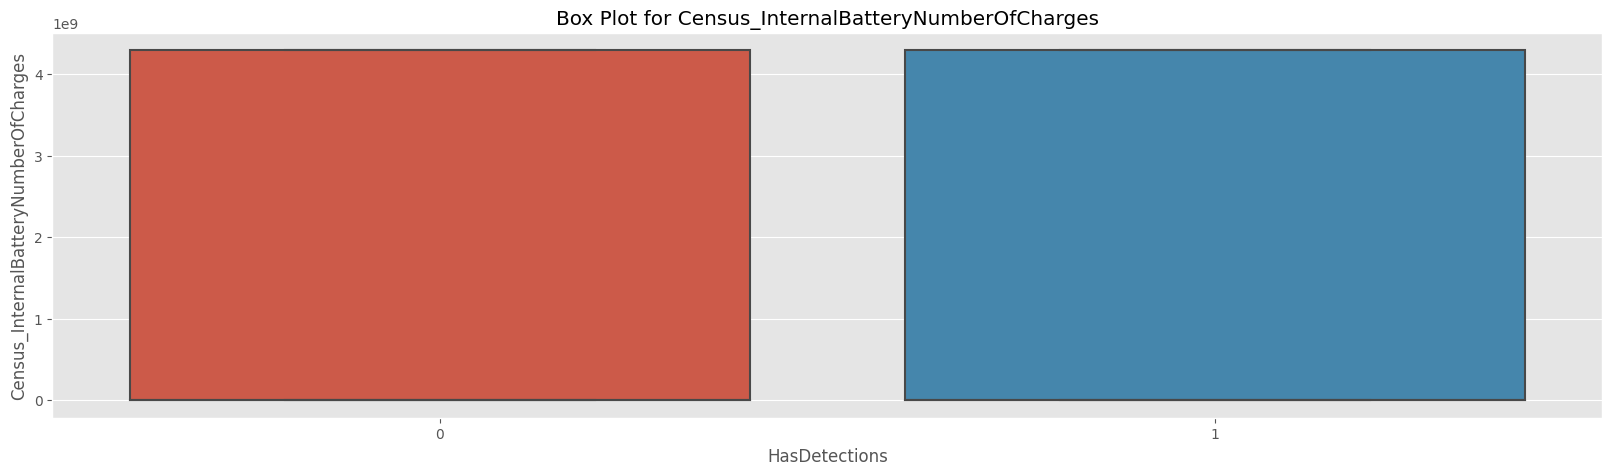



Exploring Column: Census_OSBuildNumber



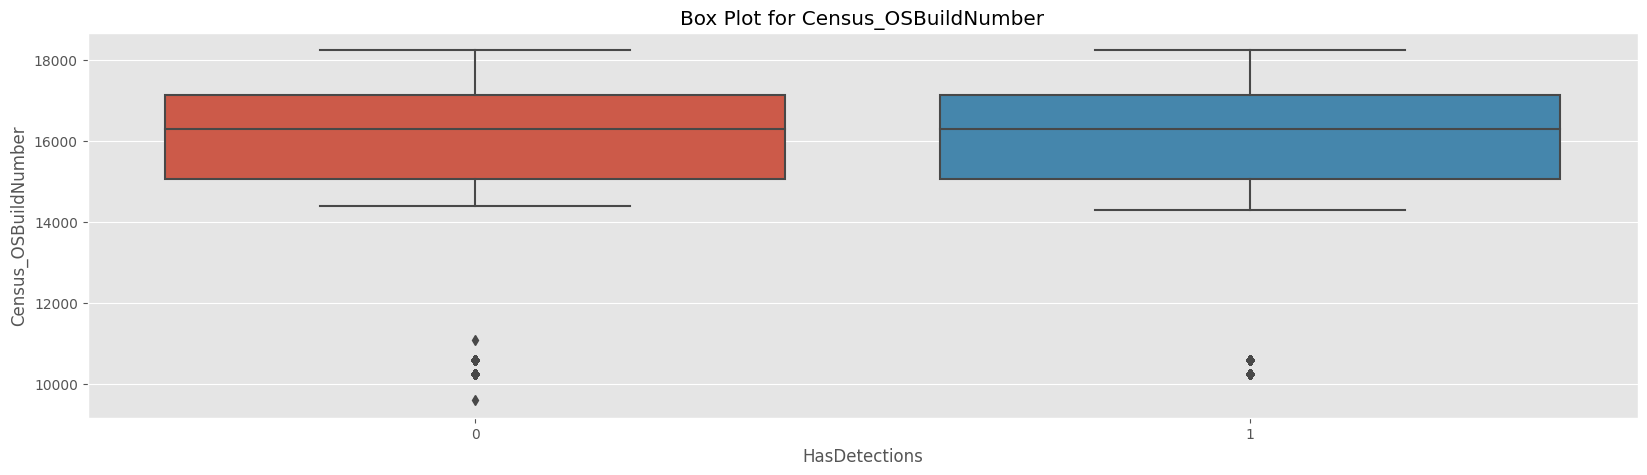



Exploring Column: Census_OSBuildRevision



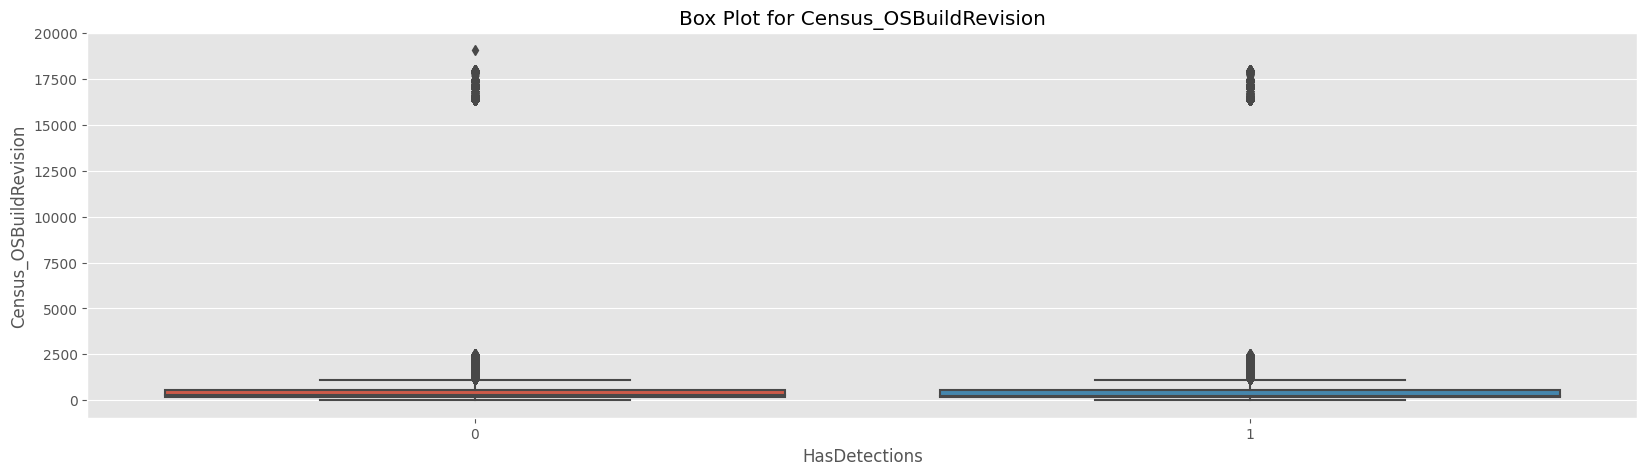



Exploring Column: Census_OSInstallLanguageIdentifier



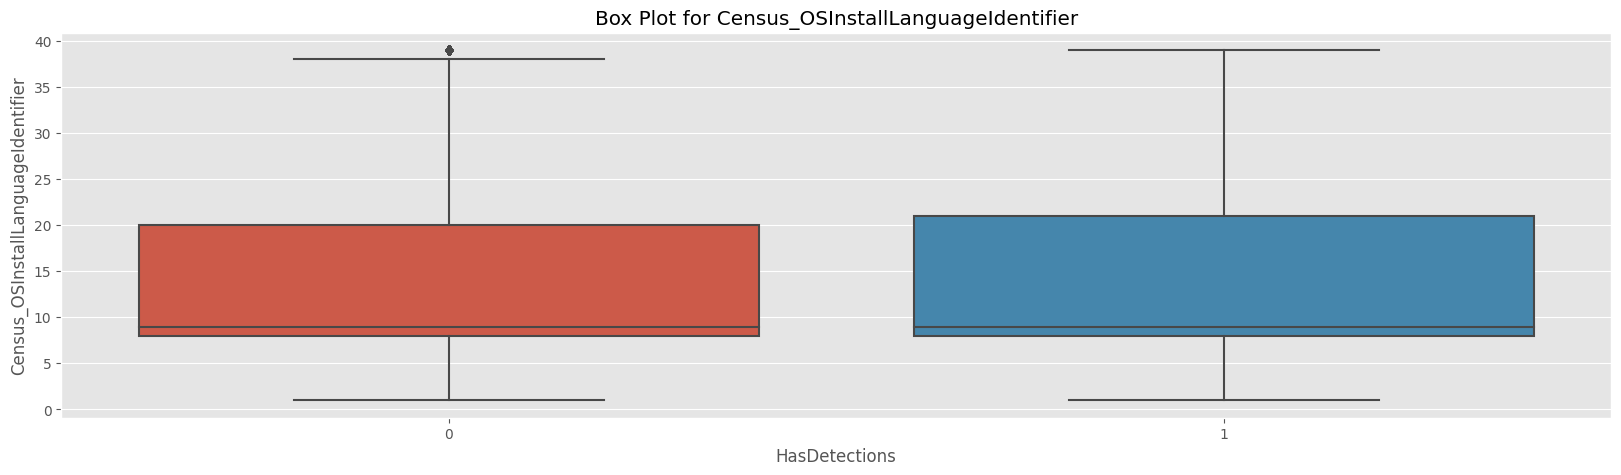



Exploring Column: Census_OSUILocaleIdentifier



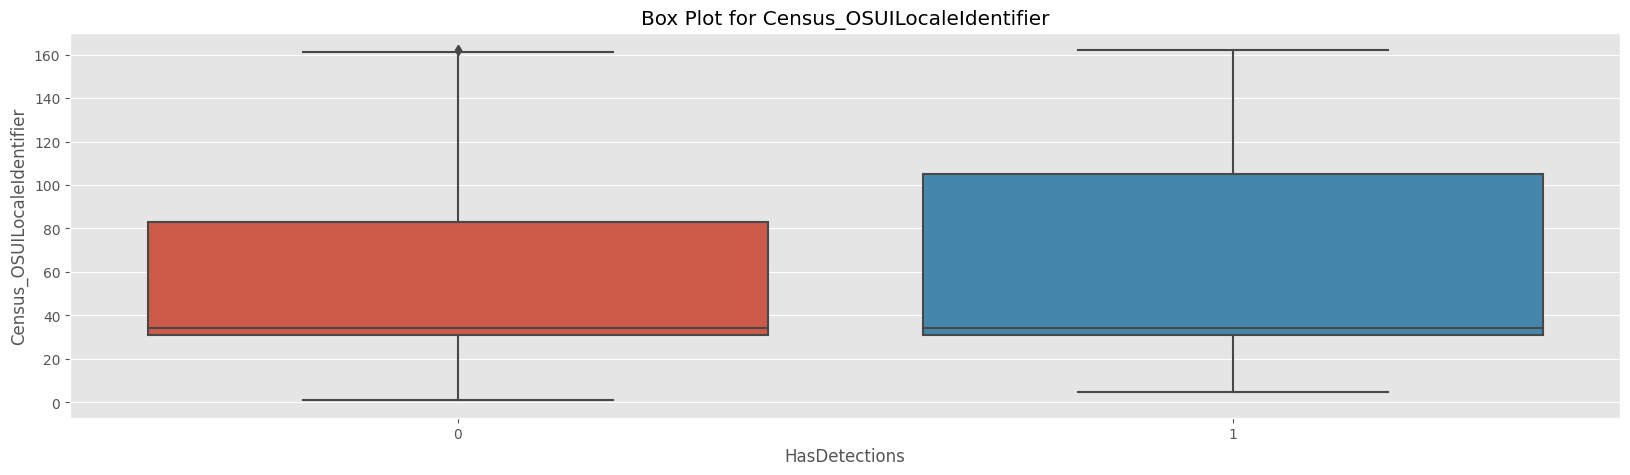



Exploring Column: Census_IsFlightingInternal



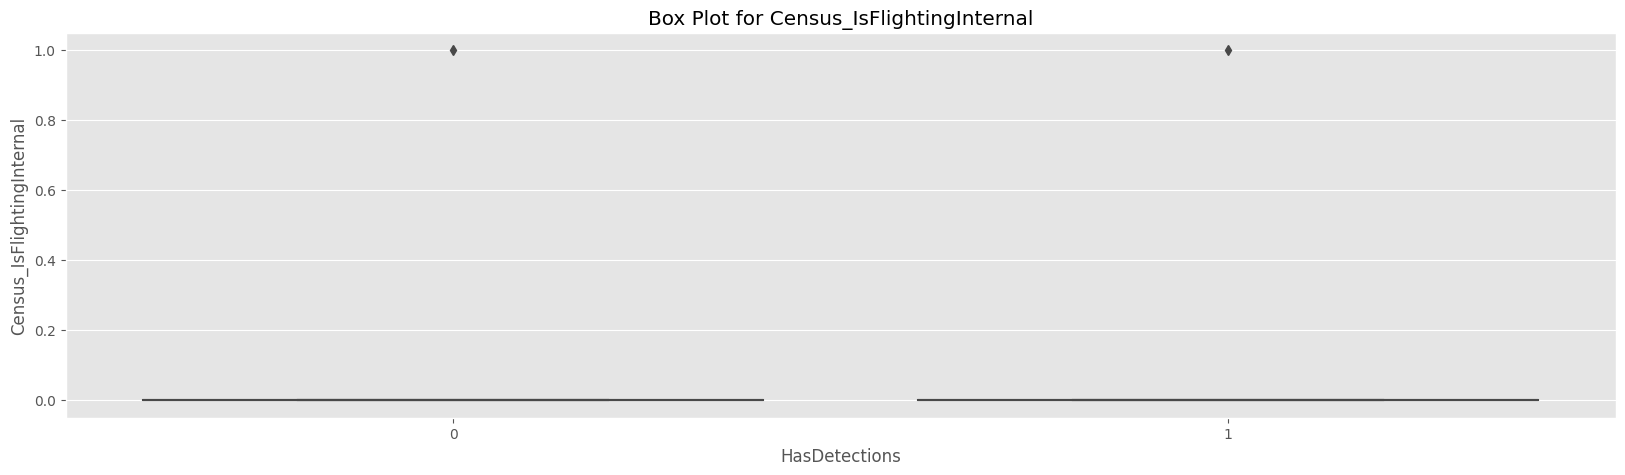



Exploring Column: Census_IsFlightsDisabled



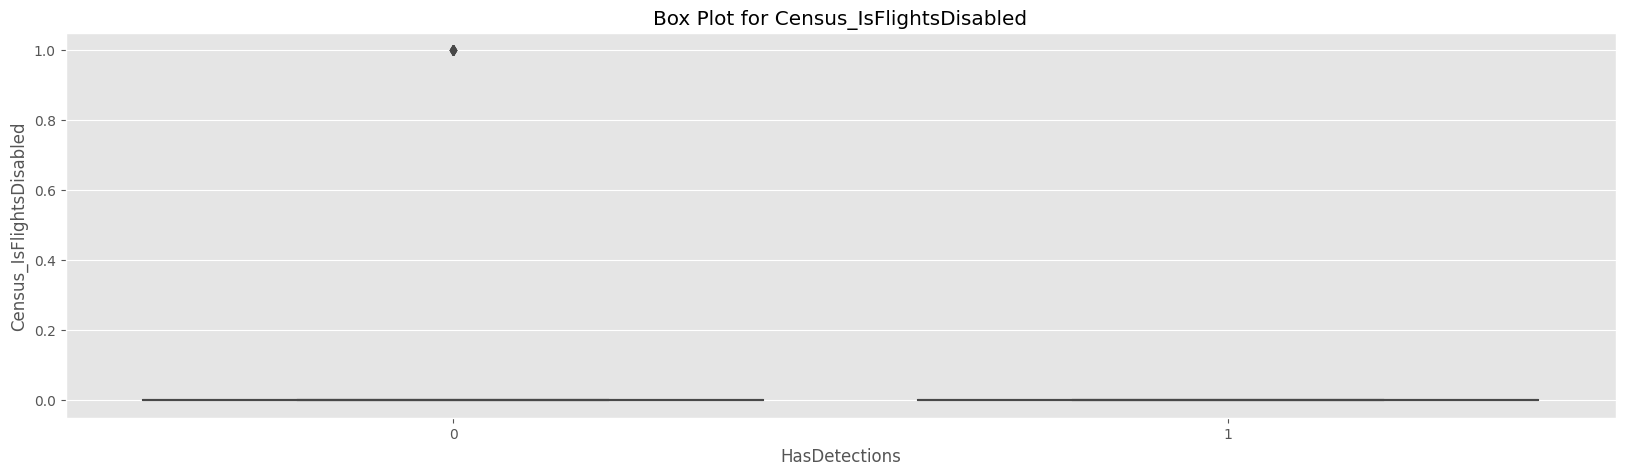



Exploring Column: Census_ThresholdOptIn



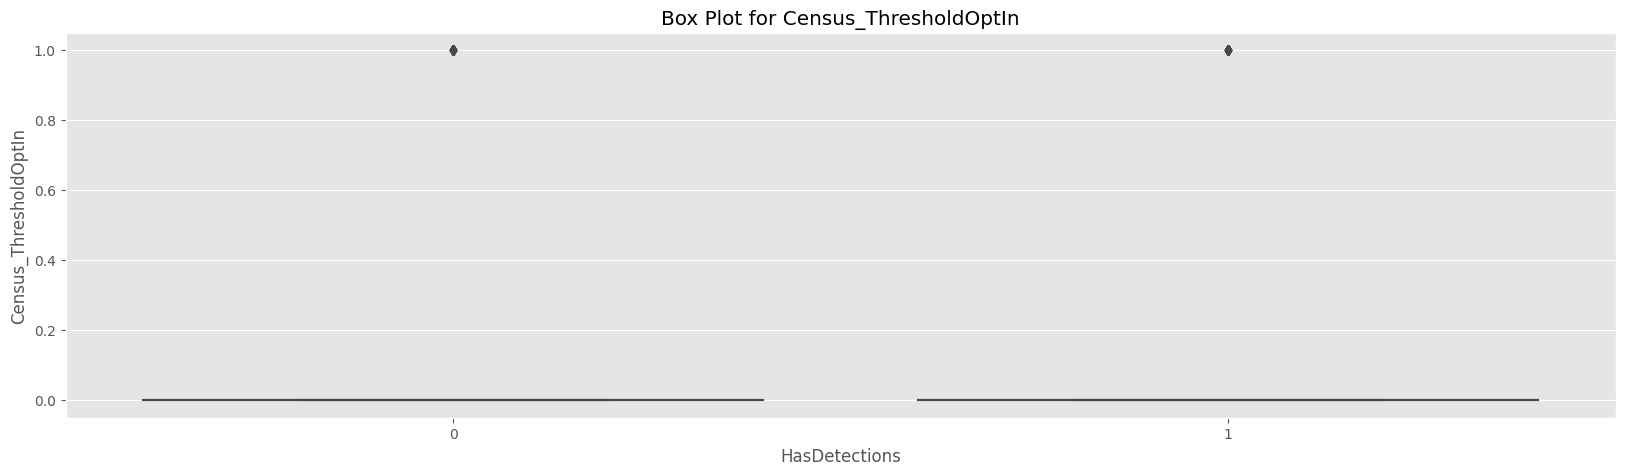



Exploring Column: Census_FirmwareManufacturerIdentifier



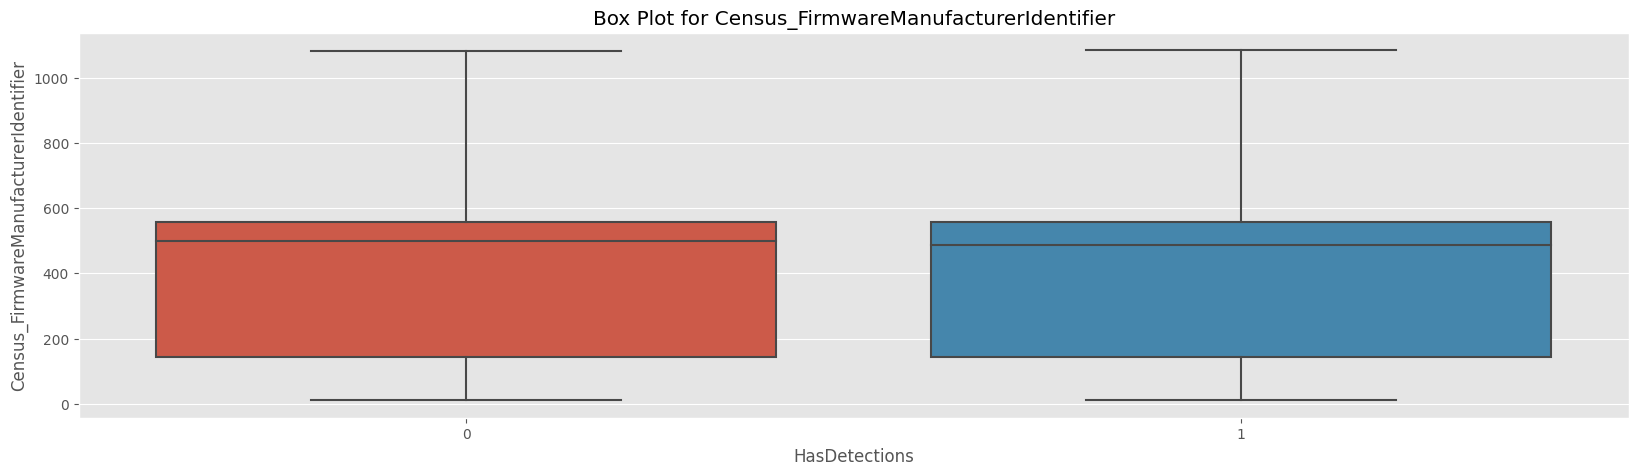



Exploring Column: Census_FirmwareVersionIdentifier



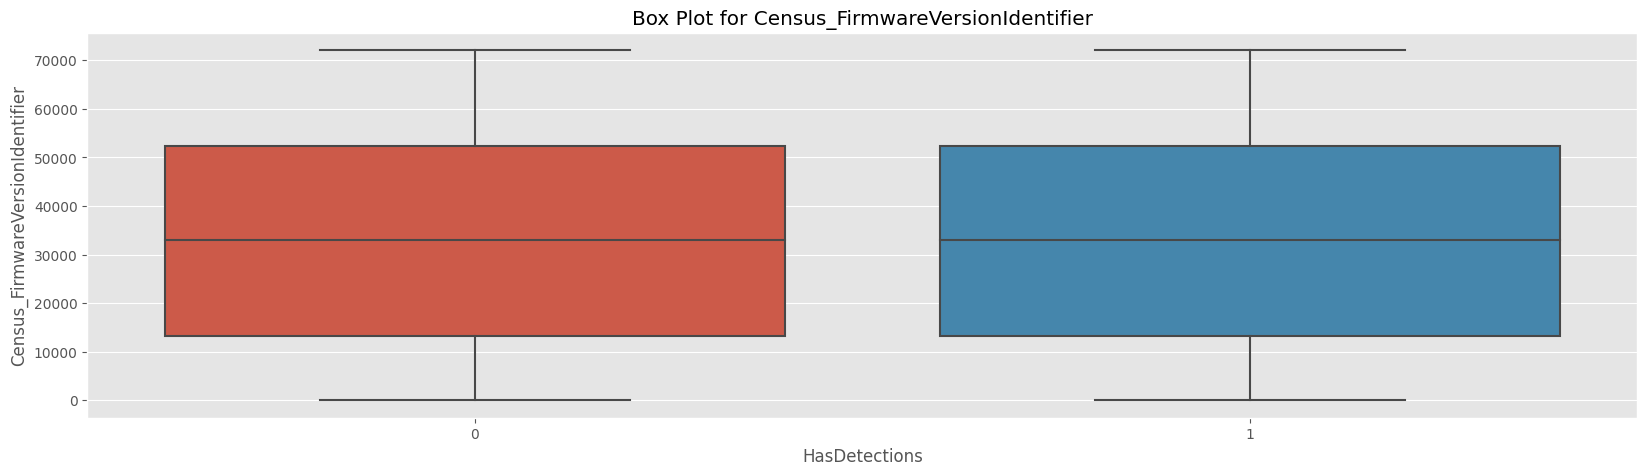



Exploring Column: Census_IsVirtualDevice



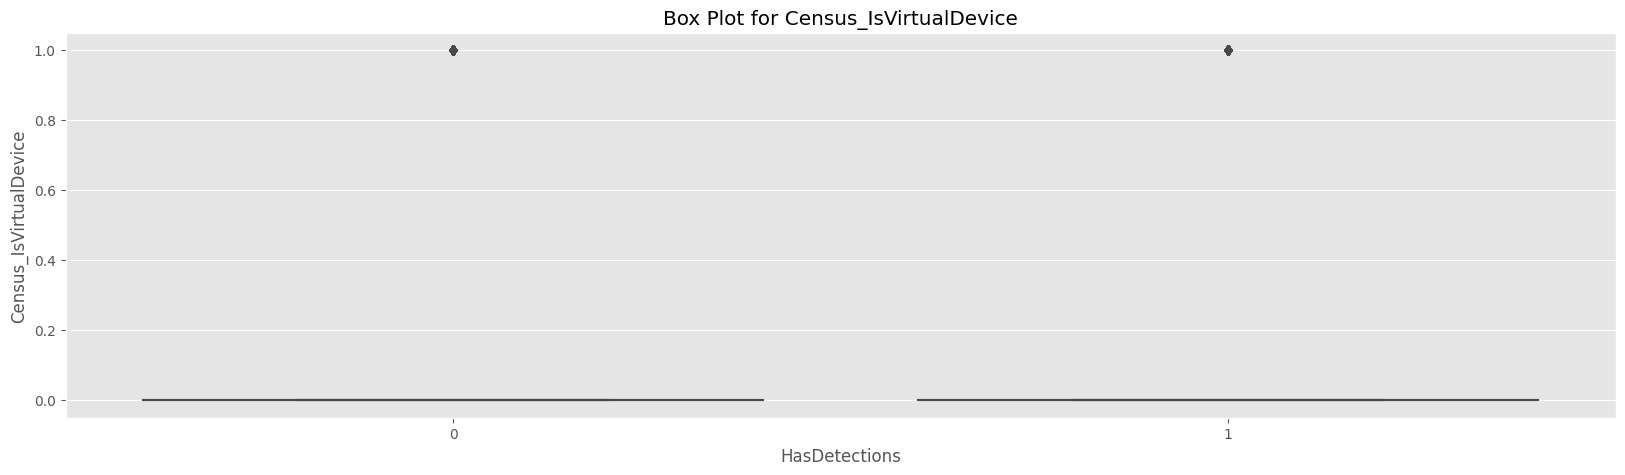



Exploring Column: Census_IsAlwaysOnAlwaysConnectedCapable



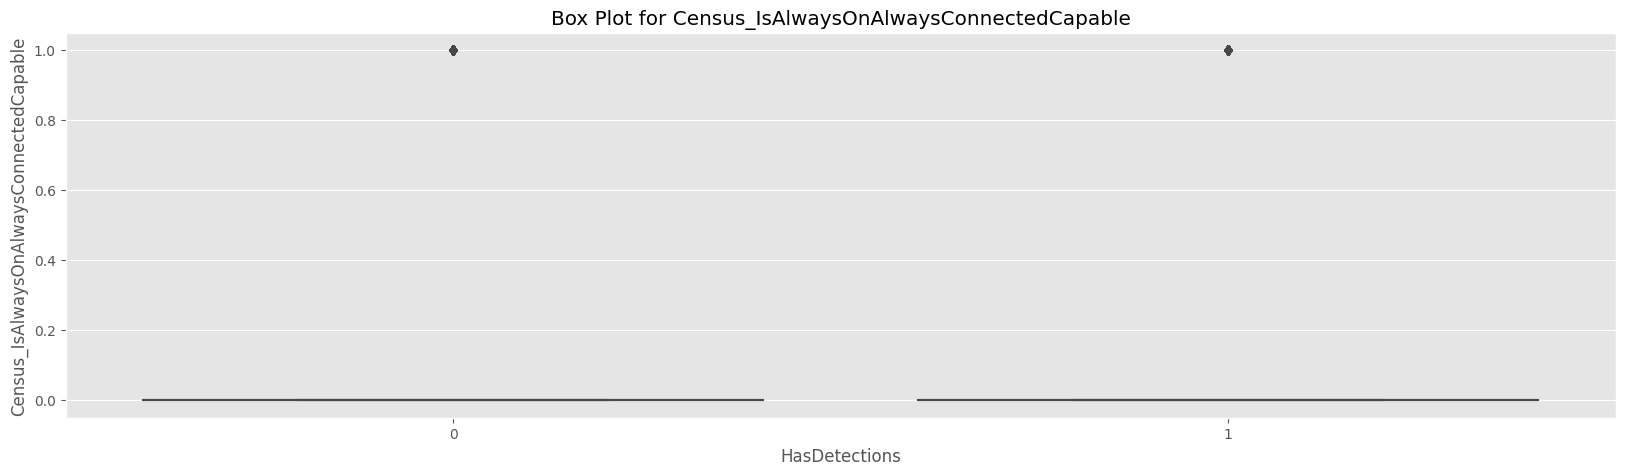



Exploring Column: Wdft_IsGamer



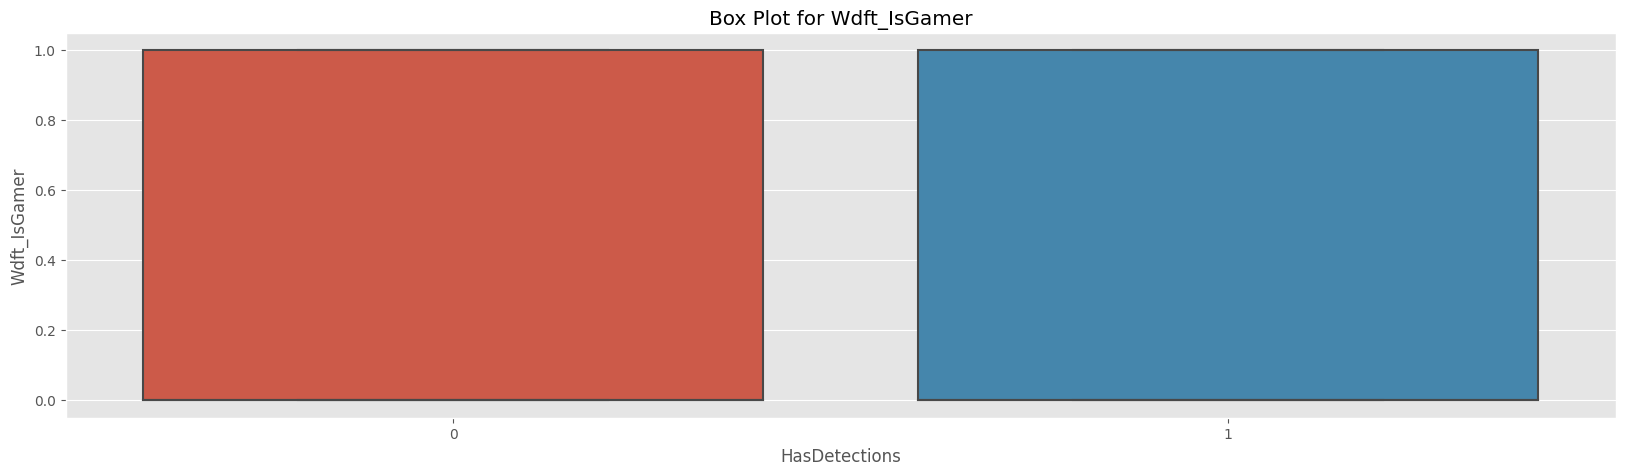



Exploring Column: Wdft_RegionIdentifier



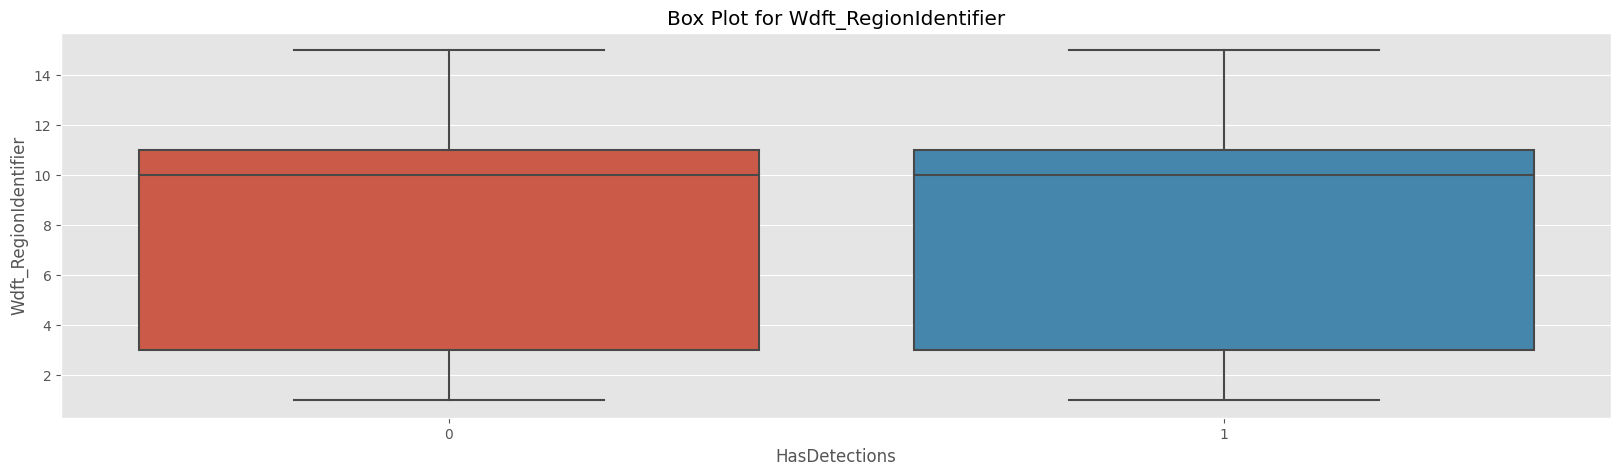

In [34]:
explore_columns_v2(df)

## DATA PREPARATION

#### Conversión de los tipos de las variables

In [35]:
# Cambiamos booleans a enteros
df[lbool] = df[lbool].astype(int)

In [36]:
# Cambiamos numéricas a categóricas

column_name = ['RtpStateBitfield','DefaultBrowsersIdentifier','AVProductStatesIdentifier',
                 'CountryIdentifier','CityIdentifier','OrganizationIdentifier','GeoNameIdentifier',
                 'LocaleEnglishNameIdentifier','OsSuite','IsProtected','SMode','IeVerIdentifier',
                 'Firewall','UacLuaenable','Census_OEMNameIdentifier','Census_OEMModelIdentifier',
                 'Census_ProcessorManufacturerIdentifier','Census_ProcessorModelIdentifier',
                 'Census_OSInstallLanguageIdentifier','Census_OSUILocaleIdentifier',
                 'Census_IsFlightingInternal','Census_IsFlightsDisabled','Census_ThresholdOptIn',
                 'Census_FirmwareManufacturerIdentifier','Census_IsWIMBootEnabled','Census_IsVirtualDevice',
                 'Census_IsAlwaysOnAlwaysConnectedCapable','Wdft_IsGamer','Wdft_RegionIdentifier']

In [37]:
def cambio_cat(column_name):
  df[column_name] = df[column_name].astype(object)

  return df[column_name]

In [38]:
cambio_cat(column_name)

RtpStateBitfield DefaultBrowsersIdentifier  \
MachineIdentifier                                                             
f1cd864e97bae82bdf96523e1a539121              7.0                       NaN   
fd5ba6f5b75325ec0423a6c67cc75942              7.0                       NaN   
4e628391e7cc7c482fb3286f486dbd25              7.0                       NaN   
270a2e9d028144a4df12a9e3da79fba5              7.0                       NaN   
06ca8fa8d32c2abdc5b3577d676b3269              7.0                       NaN   
...                                           ...                       ...   
a739cacc292f3f1e745827c1ca6c6ada              7.0                       NaN   
a4c232d528d98343e8f1b73650da7b82              7.0                       NaN   
fd16cd542d660848d272e4552bcccb1e              7.0                       NaN   
fa0841f8f6147de7c3d287e05270ed42              7.0                       NaN   
7b45dc3537e17f16305c5983ca0a1cb9              7.0                       NaN   

                                 AVProductStatesIdentifier CountryIdentifier  \
MachineIdentifier                                                              
f1cd864e97bae82bdf96523e1a539121                   53447.0                 8   
fd5ba6f5b75325ec0423a6c67cc75942                   53447.0               129   
4e628391e7cc7c482fb3286f486dbd25                   46781.0               149   
270a2e9d028144a4df12a9e3da79fba5                   53447.0               164   
06ca8fa8d32c2abdc5b3577d676b3269                   47238.0               207   
...                                                    ...               ...   
a739cacc292f3f1e745827c1ca6c6ada                   53447.0                85   
a4c232d528d98343e8f1b73650da7b82                   53447.0               149   
fd16cd542d660848d272e4552bcccb1e                   53447.0                93   
fa0841f8f6147de7c3d287e05270ed42                   43856.0               195   
7b45dc3537e17f16305c5983ca0a1cb9                   53447.0                35   

                                 CityIdentifier OrganizationIdentifier  \
MachineIdentifier                                                        
f1cd864e97bae82bdf96523e1a539121        85219.0                    NaN   
fd5ba6f5b75325ec0423a6c67cc75942        54198.0                    NaN   
4e628391e7cc7c482fb3286f486dbd25       122689.0                   27.0   
270a2e9d028144a4df12a9e3da79fba5       114587.0                   27.0   
06ca8fa8d32c2abdc5b3577d676b3269        72421.0                   27.0   
...                                         ...                    ...   
a739cacc292f3f1e745827c1ca6c6ada       129210.0                   27.0   
a4c232d528d98343e8f1b73650da7b82        80920.0                   27.0   
fd16cd542d660848d272e4552bcccb1e         4342.0                    NaN   
fa0841f8f6147de7c3d287e05270ed42        10222.0                   18.0   
7b45dc3537e17f16305c5983ca0a1cb9       101119.0                   27.0   

                                 GeoNameIdentifier  \
MachineIdentifier                                    
f1cd864e97bae82bdf96523e1a539121             205.0   
fd5ba6f5b75325ec0423a6c67cc75942             126.0   
4e628391e7cc7c482fb3286f486dbd25             181.0   
270a2e9d028144a4df12a9e3da79fba5             205.0   
06ca8fa8d32c2abdc5b3577d676b3269             277.0   
...                                            ...   
a739cacc292f3f1e745827c1ca6c6ada              53.0   
a4c232d528d98343e8f1b73650da7b82             181.0   
fd16cd542d660848d272e4552bcccb1e             119.0   
fa0841f8f6147de7c3d287e05270ed42             258.0   
7b45dc3537e17f16305c5983ca0a1cb9             277.0   

                                 LocaleEnglishNameIdentifier OsSuite  \
MachineIdentifier                                                      
f1cd864e97bae82bdf96523e1a539121                         172     256   
fd5ba6f5b75325ec0423a6c67cc75942                         124     256   
4e628391e7

In [39]:
# Comprobamos conversión

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 82 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   ProductName                                        500000 non-null  object 
 1   EngineVersion                                      500000 non-null  object 
 2   AppVersion                                         500000 non-null  object 
 3   AvSigVersion                                       500000 non-null  object 
 4   IsBeta                                             500000 non-null  int64  
 5   RtpStateBitfield                                   498168 non-null  object 
 6   IsSxsPassiveMode                                   500000 non-null  int64  
 7   DefaultBrowsersIdentifier                          24061 non-null   object 
 8   AVProductStatesIdentif

#### Limpieza de atributos: Nulos

##### Booleans

In [40]:
# Revisamos nulos
df[lbool].isnull().sum()

IsBeta                              0
IsSxsPassiveMode                    0
HasTpm                              0
AutoSampleOptIn                     0
Census_HasOpticalDiskDrive          0
Census_IsPortableOperatingSystem    0
Census_IsSecureBootEnabled          0
Census_IsTouchEnabled               0
Census_IsPenCapable                 0
dtype: int64

##### Numericas

In [41]:
df[lnum].isnull().sum()

RtpStateBitfield                                       1832
DefaultBrowsersIdentifier                            475939
AVProductStatesIdentifier                              1938
AVProductsInstalled                                    1938
AVProductsEnabled                                      1938
CountryIdentifier                                         0
CityIdentifier                                        18240
OrganizationIdentifier                               154563
GeoNameIdentifier                                        16
LocaleEnglishNameIdentifier                               0
OsBuild                                                   0
OsSuite                                                   0
IsProtected                                            1926
SMode                                                 29848
IeVerIdentifier                                        3209
Firewall                                               5162
UacLuaenable                            

In [42]:
df1 = df.copy()

In [43]:
# Imputación de nulos: no dato, 0 y -1

# Asignamos No Dato
cols_no_data = [
    'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier', 'CityIdentifier',
    'OrganizationIdentifier', 'GeoNameIdentifier', 'IsProtected', 'SMode', 'IeVerIdentifier', 'Firewall', 'UacLuaenable', 'Census_OEMNameIdentifier','Census_OEMModelIdentifier', 'Census_ProcessorManufacturerIdentifier', 'Census_ProcessorModelIdentifier', 'Census_OSInstallLanguageIdentifier','Census_IsFlightingInternal', 'Census_IsFlightsDisabled','Census_ThresholdOptIn','Census_FirmwareManufacturerIdentifier','Census_FirmwareVersionIdentifier',
    'Census_IsVirtualDevice', 'Census_IsAlwaysOnAlwaysConnectedCapable','Wdft_IsGamer', 'Wdft_RegionIdentifier', 'Census_IsWIMBootEnabled','RtpStateBitfield'
]
for col in cols_no_data:
    # df1[col] = df1[col].astype(str)
    df1[col].fillna('No Dato', inplace=True)

# Asignamos 0
cols_zero = ['AVProductsInstalled', 'AVProductsEnabled']
for col in cols_zero:
    df1[col].fillna(0, inplace=True)

# Asignamos -1
cols_extreme_value = ['Census_ProcessorCoreCount', 'Census_PrimaryDiskTotalCapacity',
    'Census_SystemVolumeTotalCapacity', 'Census_TotalPhysicalRAM',
    'Census_InternalPrimaryDiagonalDisplaySizeInInches',
    'Census_InternalPrimaryDisplayResolutionHorizontal',
    'Census_InternalPrimaryDisplayResolutionVertical',
    'Census_InternalBatteryNumberOfCharges'
]
for col in cols_extreme_value:
    df1[col].fillna(-1, inplace=True)


In [44]:
#Corroboramos inputación de nulos
df1[lnum].isnull().sum()

RtpStateBitfield                                     0
DefaultBrowsersIdentifier                            0
AVProductStatesIdentifier                            0
AVProductsInstalled                                  0
AVProductsEnabled                                    0
CountryIdentifier                                    0
CityIdentifier                                       0
OrganizationIdentifier                               0
GeoNameIdentifier                                    0
LocaleEnglishNameIdentifier                          0
OsBuild                                              0
OsSuite                                              0
IsProtected                                          0
SMode                                                0
IeVerIdentifier                                      0
Firewall                                             0
UacLuaenable                                         0
Census_OEMNameIdentifier                             0
Census_OEM

In [45]:
df1['UacLuaenable'].value_counts()

UacLuaenable
1.0          496276
0.0            3086
No Dato         623
48.0             13
2.0               1
6357062.0         1
Name: count, dtype: int64

In [46]:
# Revisión de la inputación de nulos mediante value_counts()

# Columna a la que se le asignó 'No Dato'
print("DefaultBrowsersIdentifier value counts:")
print(df1['DefaultBrowsersIdentifier'].value_counts())
print("\n")

DefaultBrowsersIdentifier value counts:
DefaultBrowsersIdentifier
No Dato    475939
239.0        2589
3195.0       2423
1632.0       1601
3176.0       1313
            ...  
1692.0          1
2722.0          1
914.0           1
1648.0          1
1427.0          1
Name: count, Length: 555, dtype: int64




In [47]:
# Columna a la que se le asignó 0
print("AVProductsInstalled value counts:")
print(df1['AVProductsInstalled'].value_counts())
print("\n")


AVProductsInstalled value counts:
AVProductsInstalled
1.0    348046
2.0    137856
3.0     11617
0.0      1938
4.0       514
5.0        29
Name: count, dtype: int64




In [48]:
# Columna a la que se le asignó un valor extremo (-1)
print("Census_TotalPhysicalRAM value counts:")
print(df1['Census_TotalPhysicalRAM'].value_counts().sort_index())

Census_TotalPhysicalRAM value counts:
Census_TotalPhysicalRAM
-1.0         4556
 512.0          6
 768.0          3
 829.0          1
 911.0          1
             ... 
 153599.0       1
 196608.0       4
 229376.0       1
 262144.0       6
 393216.0       2
Name: count, Length: 553, dtype: int64


##### Categóricas

In [49]:
lcat

['ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'Platform',
 'Processor',
 'OsVer',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'PuaMode',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing']

In [50]:
# Borramos las filas de las columnas que tienen muy pocos nulos: Census_PowerPlatformRoleName, OsBuildLab

print("Dimensiones antes de borrar filas con nulos:", df1.shape)

Dimensiones antes de borrar filas con nulos: (500000, 82)


In [51]:
df1 = df1.dropna(subset=['OsBuildLab', 'Census_PowerPlatformRoleName'])

In [52]:
print("Dimensiones después de borrar filas con nulos:", df1.shape)

Dimensiones después de borrar filas con nulos: (499997, 82)


In [53]:
# Imputación de nulos por No Dato

cols_to_fill = [
    'PuaMode', 'SmartScreen', 'Census_ProcessorClass',
    'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName',
    'Census_InternalBatteryType'
]

# Rellenamos nulos con "No Dato"
df1[cols_to_fill] = df1[cols_to_fill].fillna("No Dato")

In [54]:
print(df1[cols_to_fill].isnull().sum())

PuaMode                       0
SmartScreen                   0
Census_ProcessorClass         0
Census_PrimaryDiskTypeName    0
Census_ChassisTypeName        0
Census_InternalBatteryType    0
dtype: int64


In [55]:
df1.isnull().sum()

ProductName                                0
EngineVersion                              0
AppVersion                                 0
AvSigVersion                               0
IsBeta                                     0
                                          ..
Census_IsPenCapable                        0
Census_IsAlwaysOnAlwaysConnectedCapable    0
Wdft_IsGamer                               0
Wdft_RegionIdentifier                      0
HasDetections                              0
Length: 82, dtype: int64

#### Limpieza de atributos: Agrupacion de categorías

In [56]:
df2 = df1.copy()

In [57]:
# Categóricas
lcat

['ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'Platform',
 'Processor',
 'OsVer',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'PuaMode',
 'SmartScreen',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSVersion',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing']

ProductName

In [58]:
df2['ProductName'].value_counts()

ProductName
win8defender     494601
mse                5395
mseprerelease         1
Name: count, dtype: int64

In [59]:
# Unimos las categorías mseprerelease y mse
df2['ProductName'] = df2['ProductName'].replace('mseprerelease', 'mse')


In [60]:
# Verificamos el cambio con un value_counts
print(df2['ProductName'].value_counts())

ProductName
win8defender    494601
mse               5396
Name: count, dtype: int64


EngineVersion, AppVersion, Census_OSVersion


In [61]:
# Agrupamos por numero de builder (tercero)

def group_by_builder_digits_v2(df2, column_name):
    # Dividimos la versión en partes
    version_parts = df2[column_name].str.split('.', expand=True)

    # Tomamos solo los dos primeros dígitos del tercer componente
    version_parts[2] = version_parts[2].str[:2]

    # Reconstruimos la versión usando solo los dos primeros dígitos del builder
    df2[column_name] = version_parts[0] + '.' + version_parts[1] + '.' + version_parts[2]

    return df2



In [62]:
columns_to_group = ['EngineVersion', 'AppVersion', 'Census_OSVersion']

for column in columns_to_group:
    df2 = group_by_builder_digits_v2(df2, column)

In [63]:
# Corroboración
df2['EngineVersion'].value_counts()

EngineVersion
1.1.15    447525
1.1.14     44474
1.1.13      7542
1.1.12       452
1.1.11         3
1.1.10         1
Name: count, dtype: int64

In [64]:
df2['AppVersion'].value_counts()

AppVersion
4.18.18    337242
4.13.17     29076
4.9.10      22922
4.12.16     20197
4.10.20     15339
4.8.10      15009
4.14.17     13727
4.16.17     13189
4.11.15     11458
4.12.17     10639
4.10.14     10292
4.9.21        334
4.8.20        300
4.5.21        126
4.7.20         46
4.6.30         44
4.4.30         27
4.17.17        22
4.15.17         8
Name: count, dtype: int64

In [65]:
df2['Census_OSVersion'].value_counts()

Census_OSVersion
10.0.17    227106
10.0.16    136574
10.0.10     48297
10.0.15     44265
10.0.14     43710
10.0.18        43
6.3.96          1
10.0.11         1
Name: count, dtype: int64

AvSigVersion, OsVer


In [66]:
# Agrupamos por numero menor (seguro)

def group_by_minor_version_digits(df2, column_name):
    def custom_grouping(version):
        parts = version.split('.')
        if len(parts) >= 2:
            # Extraemos los dos primeros dígitos del segundo número
            minor_version = parts[1][:2]
            return f"{parts[0]}.{minor_version}"
        else:
            return version

    df2[column_name] = df2[column_name].astype(str).apply(custom_grouping)
    return df2

columns_to_group_by_minor = ['AvSigVersion', 'OsVer']

for column in columns_to_group_by_minor:
    df2 = group_by_minor_version_digits(df2, column)

In [67]:
# Corroboración
df2['AvSigVersion'].value_counts()

AvSigVersion
1.27    447342
1.26     34150
1.25      9678
1.23      5539
1.24      2372
1.22       896
1.20         7
1.21         5
0.0          4
1.19         3
1.16         1
Name: count, dtype: int64

In [68]:
df2['OsVer'].value_counts()

OsVer
10.0    483860
6.3      10823
6.1       5314
Name: count, dtype: int64

OsPlatformSubReleas

In [69]:
# Filtramos y asignamos "windows10" a las filas que no contienen la palabra "windows" en 'OsPlatformSubRelease'. Ya que comprobamos que en estos casos todas las categorías pertenecen a Widnows 10
df2.loc[~df2['OsPlatformSubRelease'].str.contains('windows', case=False, na=False), 'OsPlatformSubRelease'] = 'windows10'

In [70]:
df2['OsPlatformSubRelease'].value_counts()

OsPlatformSubRelease
windows10     483860
windows8.1     10823
windows7        5314
Name: count, dtype: int64

OsBuildLab


In [71]:
# Agrupamos por 'amd64'
df2.loc[df2['OsBuildLab'].str.contains('amd64', case=False, na=False), 'OsBuildLab'] = 'amd64'

# Agrupamos por 'x86'
df2.loc[df2['OsBuildLab'].str.contains('x86', case=False, na=False), 'OsBuildLab'] = 'x86'

# Agrupamos por 'arm64'
df2.loc[df2['OsBuildLab'].str.contains('arm64', case=False, na=False), 'OsBuildLab'] = 'arm64'

SkuEdition

In [72]:
# Agrupamos Enterprise y Enterprise LTSB

df2['SkuEdition'].replace({'Enterprise LTSB': 'Enterprise'}, inplace=True)

PuaMode

In [73]:
# Imputamos No Dato como OFF. Solamente se encuentra la categoría 'On' y es necesaria una categoría Off, por tanto asumimos que en realidad los valores caracterizados como nulos (No Dato), representan la categoría off.

df2['PuaMode'].replace({'No Dato': 'off'}, inplace=True)

SmartScreen

In [74]:
# Unificamos categorias en mayúsculas y minúsculas
df2['SmartScreen'] = df2['SmartScreen'].replace({'off': 'Off', 'on': 'On', 'requireadmin': 'RequireAdmin'})

Census_MDC2FormFactor

In [75]:
# Agrupamos todos los que contienen 'server'
df2.loc[df2['Census_MDC2FormFactor'].str.contains('server', case=False, na=False), 'Census_MDC2FormFactor'] = 'server'

# Agrupamos todos los que contienen 'tablet'
df2.loc[df2['Census_MDC2FormFactor'].str.contains('tablet', case=False, na=False), 'Census_MDC2FormFactor'] = 'tablet'

Census_DeviceFamily

In [76]:

# Borramos categoría windows ya que esta columna indica si estamos usando la versión de windows Desktop o Server, por tanto la única entrada que hay como "Windows", no nos aporta nada.
df2 = df2[df2['Census_DeviceFamily'] != 'Windows']

In [77]:
df2['Census_DeviceFamily'].value_counts()

Census_DeviceFamily
Windows.Desktop    499180
Windows.Server        816
Name: count, dtype: int64

Census_PrimaryDiskTypeName

In [78]:
# Agrupamos UNKNOWN y Unspecified

values_to_group = ["UNKNOWN", "Unspecified"]

df2['Census_PrimaryDiskTypeName'] = df2['Census_PrimaryDiskTypeName'].apply(lambda x: "UNKNOWN" if x in values_to_group else x)

In [79]:
df2['Census_PrimaryDiskTypeName'].value_counts()

Census_PrimaryDiskTypeName
HDD        325428
SSD        138155
UNKNOWN     35706
No Dato       707
Name: count, dtype: int64

Census_ChassisTypeName

In [80]:
# Agrupación de unknown con y sin mayúscula, caracter numérico y nulos (No Dato, ya que hay solamente 37).

def group_chassis(value):
    if re.search(r'\d', value) or value.lower() == "unknown" or value == "No Dato":
        return "No Dato"
    return value

df2['Census_ChassisTypeName'] = df2['Census_ChassisTypeName'].apply(group_chassis)

Census_PowerPlatformRoleName

In [81]:
# Agrupamos todos los que contienen 'server'

df2.loc[df2['Census_PowerPlatformRoleName'].str.contains('server', case=False, na=False), 'Census_PowerPlatformRoleName'] = 'server'

Census_InternalBatteryType

In [245]:
# Agrupamos por tipos de batería: ión litio, litio polímero, niquel metal hidruro y otros

def map_battery_type(value):
    litio_ion = ['lion', 'li-i', 'liio', 'li', '3ion', 'li-l']
    litio_polimero = ['lip', 'li p', 'lipo', 'lhp0', 'lipp']
    niquel_metal_hidruro = ['nimh']
    other = ['real', 'vbox', 'lgi0', 'unkn', 'ram', 'a132', 'virt', 'lgl0', 'icp3', 'bad', 'batt', '4cel','bq20','pbac','ithi']
    no_dato = ['#', 'No Dato']

    value_lower = str(value).lower()  
    if value_lower in litio_ion:
        return 'Litio-ion'
    elif value_lower in litio_polimero:
        return 'Litio-polímero'
    elif value_lower in niquel_metal_hidruro:
        return 'Níquel-metal hidruro'
    elif value_lower in other:
        return 'Other'
    elif value_lower in no_dato:
        return 'No Dato'
    else:
        return value

df2['Census_InternalBatteryType'] = df2['Census_InternalBatteryType'].apply(map_battery_type)

Census_OSBranch

In [246]:
# Unimos todos los que son Windows 10 release, todos los que son Windows 10 Threshold y Windows 8

def map_os_branch(value):
    windows10_redstone = [
        'rs4_release', 'rs3_release', 'rs2_release', 'rs1_release',
        'rs5_release', 'rs3_release_svc_escrow', 'rs3_release_svc_escrow_im',
        'rs_prerelease', 'rs_prerelease_flt', 'rs5_release_sigma'
    ]
    windows10_threshold = ['th2_release', 'th2_release_sec', 'th1_st1', 'th1']
    windows8 = ['winblue_ltsb_escrow']

    value_lower = str(value).lower()
    if value_lower in windows10_redstone:
        return 'windows10_Redstone'
    elif value_lower in windows10_threshold:
        return 'windows10_Threshold'
    elif value_lower in windows8:
        return 'windows8'
    else:
        return value

df2['Census_OSBranch'] = df2['Census_OSBranch'].apply(map_os_branch)


print(df2['Census_OSBranch'].value_counts())

Census_OSBranch
windows10_Redstone     451699
windows10_Threshold     48297
Name: count, dtype: int64


Census_OSEdition

In [247]:
# Agrupamos todas las categorías en: CORE, PROFESSIONAL, EDUCATION, SERVER, CLOUD, WORKSTATION

def map_os_edition(edition):
    edition = str(edition).lower()

    core = ['core', 'coresinglelanguage', 'corecountryspecific', 'coren']
    professional = ['professional', 'professionaln', 'professionaleducation',
                    'professionaleducationn', 'enterprise', 'enterprises',
                    'enterprisen', 'enterprisesn']
    education = ['education', 'educationn']
    server = ['serverstandard', 'serverstandardeval', 'serverdatacentereval', 'serversolution']
    cloud = ['cloud', 'cloudn']
    workstation = ['professionalworkstation', 'professionalworkstationn']

    if edition in core:
        return 'CORE'
    elif edition in professional:
        return 'PROFESSIONAL'
    elif edition in education:
        return 'EDUCATION'
    elif edition in server:
        return 'SERVER'
    elif edition in cloud:
        return 'CLOUD'
    elif edition in workstation:
        return 'WORKSTATION'
    else:
        return edition

df2['Census_OSEdition'] = df2['Census_OSEdition'].apply(map_os_edition)

# Verificamos las agrupaciones
print(df2['Census_OSEdition'].value_counts())

Census_OSEdition
CORE            312690
PROFESSIONAL    183779
EDUCATION         2371
server             816
CLOUD              337
workstation          3
Name: count, dtype: int64


Census_OSSkuName

In [248]:
# Agrupamos todas las categorías en: CORE, PROFESSIONAL, EDUCATION, SERVER, CLOUD, WORKSTATION y UNLICENSED

def categorize_os_sku_name(sku_name):
    # Consumidores Generales
    core_group = ['CORE', 'CORE_SINGLELANGUAGE', 'CORE_COUNTRYSPECIFIC', 'CORE_N']

    # Profesionales y Empresariales
    professional_group = ['PROFESSIONAL', 'PROFESSIONAL_N', 'ENTERPRISE', 'ENTERPRISE_S', 'ENTERPRISE_S_N', 'ENTERPRISE_N']

    # Educación
    education_group = ['EDUCATION', 'EDUCATION_N']

    # Servidor
    server_group = ['STANDARD_SERVER', 'STANDARD_EVALUATION_SERVER', 'DATACENTER_EVALUATION_SERVER', 'SB_SOLUTION_SERVER']

    # Cloud
    cloud_group = ['CLOUD', 'CLOUDN']

    # Workstation
    workstation_group = ['PRO_WORKSTATION', 'PRO_WORKSTATION_N']

    # Unlicensed
    unlicensed_group = ['UNLICENSED']

    # Clasificación
    if sku_name in core_group:
        return 'CORE'
    elif sku_name in professional_group:
        return 'PROFESSIONAL'
    elif sku_name in education_group:
        return 'EDUCATION'
    elif sku_name in server_group:
        return 'SERVER'
    elif sku_name in cloud_group:
        return 'CLOUD'
    elif sku_name in workstation_group:
        return 'WORKSTATION'
    elif sku_name in unlicensed_group:
        return 'UNLICENSED'
    else:
        return sku_name  

df2['Census_OSSkuName'] = df2['Census_OSSkuName'].apply(categorize_os_sku_name)

# Verificación
print(df2['Census_OSSkuName'].value_counts())

Census_OSSkuName
CORE            312645
PROFESSIONAL    183824
EDUCATION         2374
SERVER             816
CLOUD              333
WORKSTATION          3
UNLICENSED           1
Name: count, dtype: int64


UacLuaenable

In [249]:
# Inputamos los valores distintos de 0 y 1 a no dato, ya que es boolean, y por tanto los valores únicos 48.0, 2.0, 6357062.0 no aportan información y los consideramos nulos
values_to_replace = [48.0, 2.0, 6357062.0]
df2.loc[df2['UacLuaenable'].isin(values_to_replace), 'UacLuaenable'] = 'No Dato'

In [250]:
df2.value_counts('UacLuaenable')

UacLuaenable
1.0        496272
0.0          3086
No Dato       638
Name: count, dtype: int64

#### Limpieza de atributos: Agrupación de categorías minoritarias

In [251]:
df3 = df2.copy()

In [252]:
# Definimos función para quedarnos con los valores Top

def setOthers(dataframe, column, num_values):
  top_categories = dataframe[column].value_counts().head(num_values)
  top_categories_list = top_categories.index.to_list()
  top_categories_list.append('Others')
  df3[column] = pd.Categorical(dataframe[column], categories = top_categories_list)
  return df3[column].fillna('Others') 

In [253]:
# Top3

df3['EngineVersion'] = setOthers(df3, 'EngineVersion', 3)
df3['EngineVersion'].value_counts()

EngineVersion
1.1.15    447525
1.1.14     44473
1.1.13      7542
Others       456
Name: count, dtype: int64

In [254]:
# Top5

df3['AvSigVersion'] = setOthers(df3, 'AvSigVersion', 5)
print(df3['AvSigVersion'].value_counts())

df3['Census_OSVersion'] = setOthers(df3, 'Census_OSVersion', 5)
print(df3['Census_OSVersion'].value_counts())

AvSigVersion
1.27      447342
1.26       34149
1.25        9678
1.23        5539
1.24        2372
Others       916
Name: count, dtype: int64
Census_OSVersion
10.0.17    227106
10.0.16    136574
10.0.10     48297
10.0.15     44265
10.0.14     43710
Others         44
Name: count, dtype: int64


In [255]:
# Top7

df3['SmartScreen'] = setOthers(df3, 'SmartScreen', 7)
df3['SmartScreen'].value_counts()

SmartScreen
RequireAdmin    241592
No Dato         178596
ExistsNotSet     58496
Off              10463
Warn              7530
Prompt            1950
Block             1274
Others              95
Name: count, dtype: int64

In [256]:
# Top11

df3['AppVersion'] = setOthers(df3, 'AppVersion', 11)
df3['AppVersion'].value_counts()

AppVersion
4.18.18    337242
4.13.17     29076
4.9.10      22922
4.12.16     20197
4.10.20     15339
4.8.10      15009
4.14.17     13727
4.16.17     13189
4.11.15     11458
4.12.17     10638
4.10.14     10292
Others        907
Name: count, dtype: int64

In [257]:
# Frecuencia igual o menor a 100
def group_by_threshold(df, columns, threshold=100):
    for col in columns:
        col_freq = df[col].value_counts()
        less_freq_values = col_freq[col_freq <= threshold]
        df.loc[df[col].isin(less_freq_values.index.tolist()), col] = "Other"
    return df

# Seleccionamos las columnas que queremos agrupar
columns_to_group = [
    'OsSuite', 'Census_ProcessorManufacturerIdentifier'
]

# Aplicamos la función
df3 = group_by_threshold(df3, columns_to_group)




In [258]:
# Frecuencia igual o menor a 1000
columns_to_group2 = [
    'DefaultBrowsersIdentifier',
    'OrganizationIdentifier',
    'Census_ProcessorCoreCount', 'Census_TotalPhysicalRAM',
    'Census_ChassisTypeName'
]

df3 = group_by_threshold(df3, columns_to_group2, 1000)

In [259]:
# Frecuencia igual o menor a 2000
columns_to_group3 = [
    'AVProductStatesIdentifier', 'CountryIdentifier', 'CityIdentifier',
    'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'OsBuild',
    'IeVerIdentifier', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
    'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
    'Census_SystemVolumeTotalCapacity', 'Census_OSInstallLanguageIdentifier', 
    'Census_InternalPrimaryDiagonalDisplaySizeInInches',
    'Census_InternalPrimaryDisplayResolutionHorizontal',
    'Census_InternalPrimaryDisplayResolutionVertical', 'Census_InternalBatteryNumberOfCharges',
    'Census_OSBuildNumber', 'Census_OSBuildRevision', 'Census_OSUILocaleIdentifier',
    'Census_FirmwareManufacturerIdentifier', 'Census_FirmwareVersionIdentifier'
]

df3 = group_by_threshold(df3, columns_to_group3, 2000)

In [260]:
# Verificamos que la agrupación de categorías minoritarias con frecuencia igual o menor a 100, 1000 y 2000 se ha ejecutado correctamente
all_columns_grouped = columns_to_group + columns_to_group2 + columns_to_group3

for col in all_columns_grouped:
    print("\n\nColumn:", col.upper())
    print("="*60)
    print(df3[col].value_counts())

# Hay varias columnas que aparecen con "Others" en las primeras posiciones, hemos buscado el mejor balance entre número de filas según la frecuencia que presenta cada valor y la posición en la que queda la categoría "Others"



Column: OSSUITE
OsSuite
768      311225
256      187948
272         677
Other       146
Name: count, dtype: int64


Column: CENSUS_PROCESSORMANUFACTURERIDENTIFIER
Census_ProcessorManufacturerIdentifier
5.0        439025
1.0         58603
No Dato      2347
Other          21
Name: count, dtype: int64


Column: DEFAULTBROWSERSIDENTIFIER
DefaultBrowsersIdentifier
No Dato    475935
Other       13837
239.0        2589
3195.0       2423
1632.0       1601
3176.0       1313
146.0        1231
1910.0       1067
Name: count, dtype: int64


Column: ORGANIZATIONIDENTIFIER
OrganizationIdentifier
27.0       234882
No Dato    154562
18.0        98842
48.0         3658
Other        3429
50.0         2538
37.0         1048
11.0         1037
Name: count, dtype: int64


Column: CENSUS_PROCESSORCORECOUNT
Census_ProcessorCoreCount
4.0      304099
2.0      129177
8.0       48995
12.0       5184
6.0        4023
1.0        3980
-1.0       2347
Other      1185
16.0       1006
Name: count, dtype: int64


Column

Census_InternalPrimaryDisplayResolutionHorizontal
1366.0    251999
1920.0    125094
1280.0     29690
1600.0     28230
1024.0     19325
Other      10644
1440.0      9441
1360.0      7058
1680.0      6234
2560.0      3989
2736.0      3159
-1.0        2654
3840.0      2479
Name: count, dtype: int64


Column: CENSUS_INTERNALPRIMARYDISPLAYRESOLUTIONVERTICAL
Census_InternalPrimaryDisplayResolutionVertical
768.0     277760
1080.0    121144
900.0      36911
800.0      14687
1024.0     10603
Other       8894
1050.0      6397
1440.0      4523
1200.0      4392
600.0       3492
1824.0      3157
720.0       2763
-1.0        2654
2160.0      2619
Name: count, dtype: int64


Column: CENSUS_INTERNALBATTERYNUMBEROFCHARGES
Census_InternalBatteryNumberOfCharges
0.0             283188
4294967295.0    126435
Other            72382
-1.0             15036
1.0               2955
Name: count, dtype: int64


Column: CENSUS_OSBUILDNUMBER
Census_OSBuildNumber
17134    225978
16299    136572
15063     44262
14393 

In [261]:
# Census_InternalBatteryNumberOfCharges: 
# Valor 0: Interpretamos que son dispositivos sin batería (Ej: sobremesa)
# Valor 1: Dispositivos que se han cargado uan vez
# Valor Others: Dispositivos que se han cargado más de una vez
# Valor 4294967295.0: Interpretamos que es un error de los datos ya que es el máximo valor que puede ser almacenado en un entero sin signo de 32 bits, que probablemente haya sido generado por el sistema al no poder obteenr la información real. Además no es posible que una bateria haya sido cargada tantas veces. 
# Valor -1: Valores nulos

## EDA DESPUES DE LIMPIEZA
#### Distribucion de variables con respecto al target

In [262]:
df.describe()['HasDetections']

count    500000.000000
mean          0.499906
std           0.500000
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: HasDetections, dtype: float64

In [263]:
lnum2, lbool2, lcat2= obtener_lista_variables(df3)

##### Numericas

In [264]:
lnum2

['AVProductsInstalled', 'AVProductsEnabled']

In [265]:
len(lcat2)

70

In [266]:
lbool2

['IsBeta',
 'IsSxsPassiveMode',
 'HasTpm',
 'AutoSampleOptIn',
 'Census_HasOpticalDiskDrive',
 'Census_IsPortableOperatingSystem',
 'Census_IsSecureBootEnabled',
 'Census_IsTouchEnabled',
 'Census_IsPenCapable']

In [267]:
# Generamos BoxPlots para las variables numéricas

def explore_columns_v2(df3):
  for column in lnum2:
 # Imprimir nombre de la columna
        print(f"\n\nExploring Column: {column}\n")

        # Boxplot
        plt.figure(figsize=[20, 5])
        sns.boxplot(data=df3, x='HasDetections', y=column)
        plt.title(f'Box Plot for {column}')
        plt.show()



Exploring Column: AVProductsInstalled



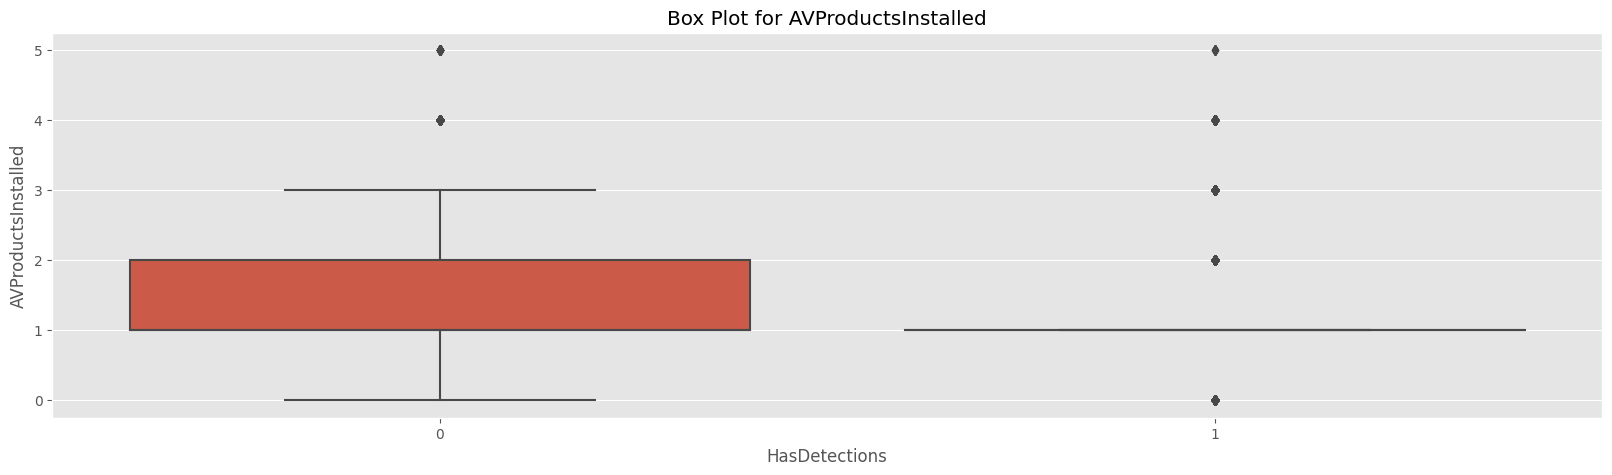



Exploring Column: AVProductsEnabled



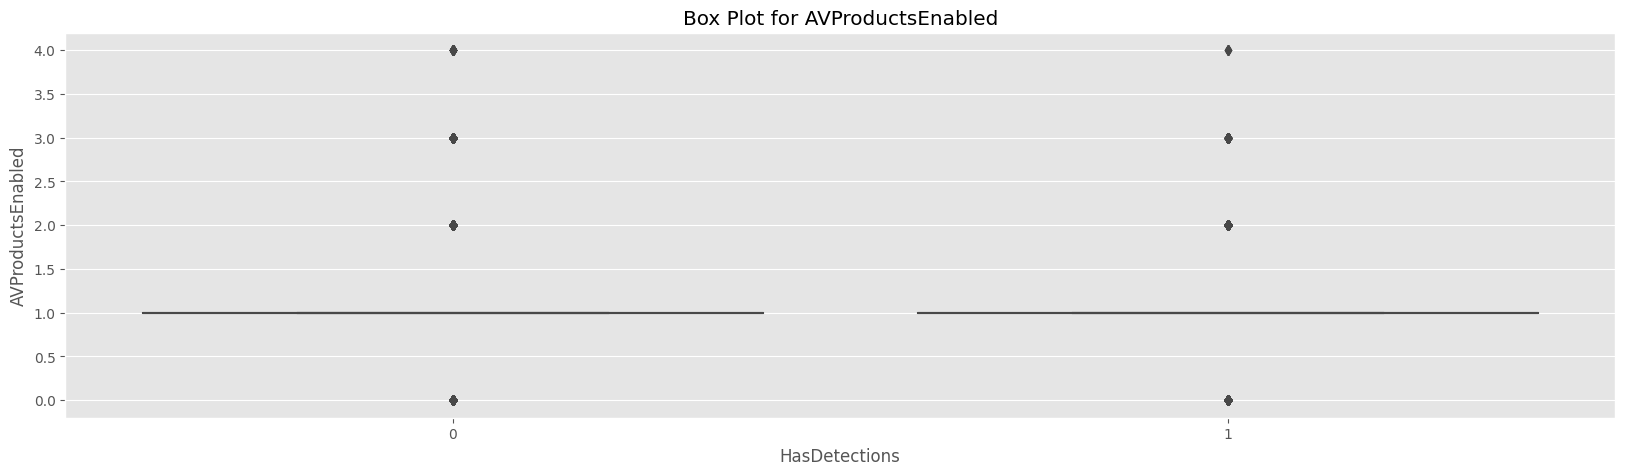

In [268]:
# Aplicamso la función

explore_columns_v2(df3)

# Destacamos las diferencias encontradas en las columnas:
# AVProductsInstalled: En los dispositivos infectados la distribución está más concentrada.

##### Categóricas

In [269]:
# Generamos CountPlots para las variables categóricas
def explore_categorical_columns(df, lcat2):
    for column in lcat2:
        # Imprimir nombre de la columna
        print(f"\n\nExploring Column: {column}\n")

        # Countplot
        plt.figure(figsize=[20, 5])
        sns.countplot(data=df3, x=column, hue='HasDetections')
        plt.title(f'Count Plot for {column}')
        plt.xticks(rotation=90) 
        plt.show()




Exploring Column: ProductName



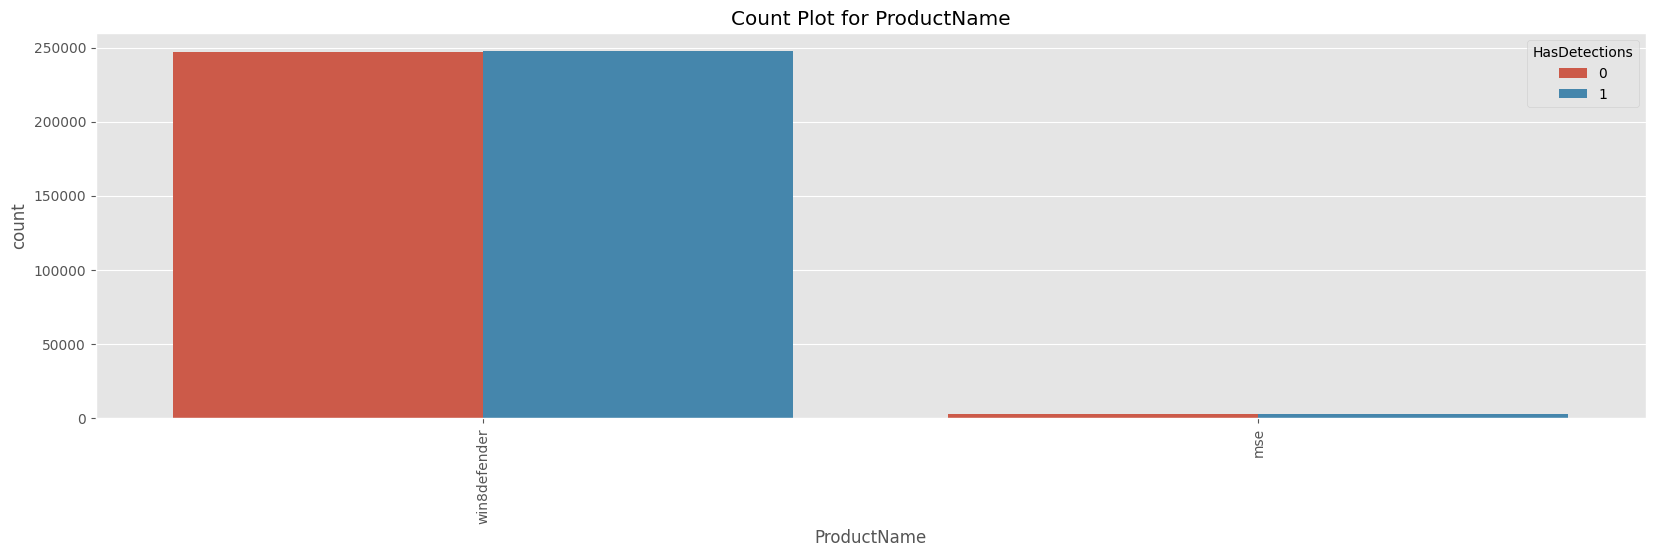



Exploring Column: EngineVersion



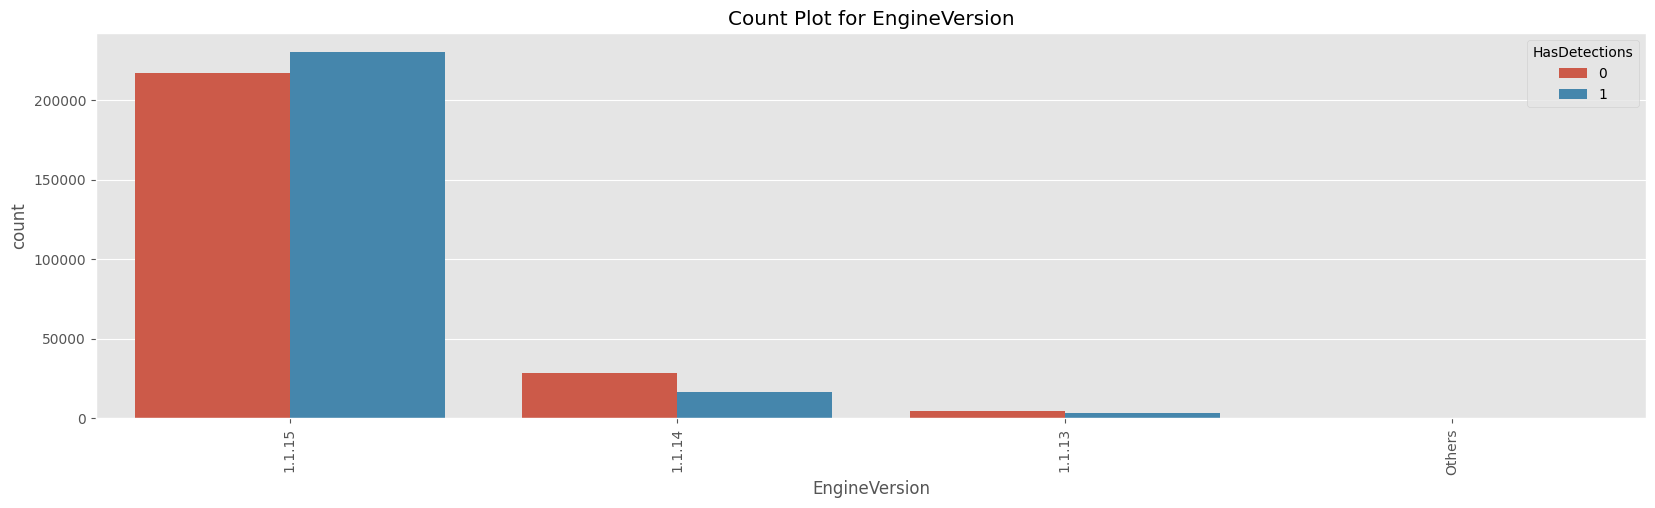



Exploring Column: AppVersion



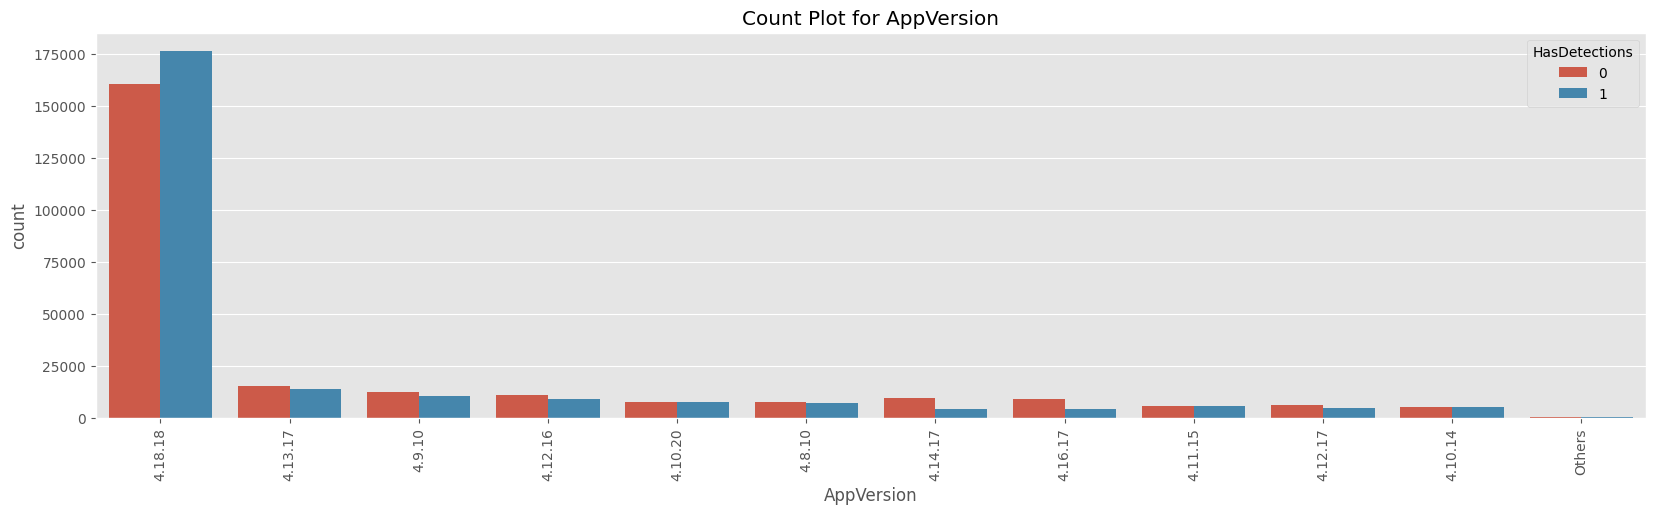



Exploring Column: AvSigVersion



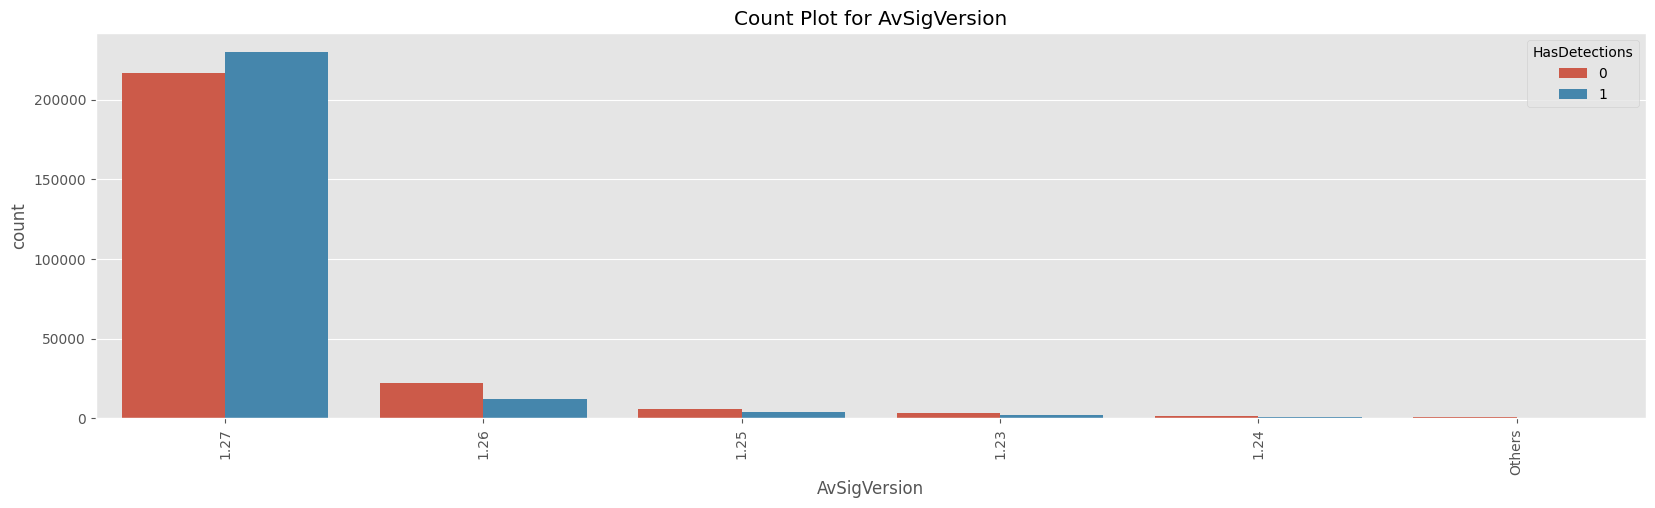



Exploring Column: RtpStateBitfield



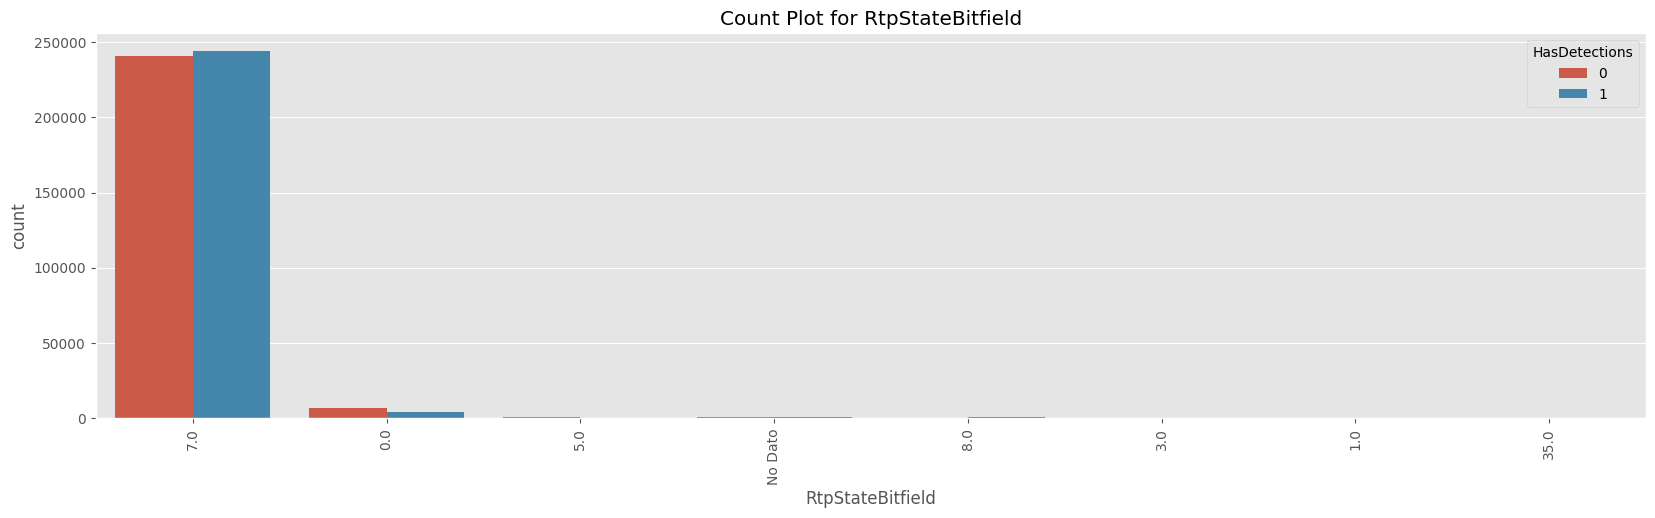



Exploring Column: DefaultBrowsersIdentifier



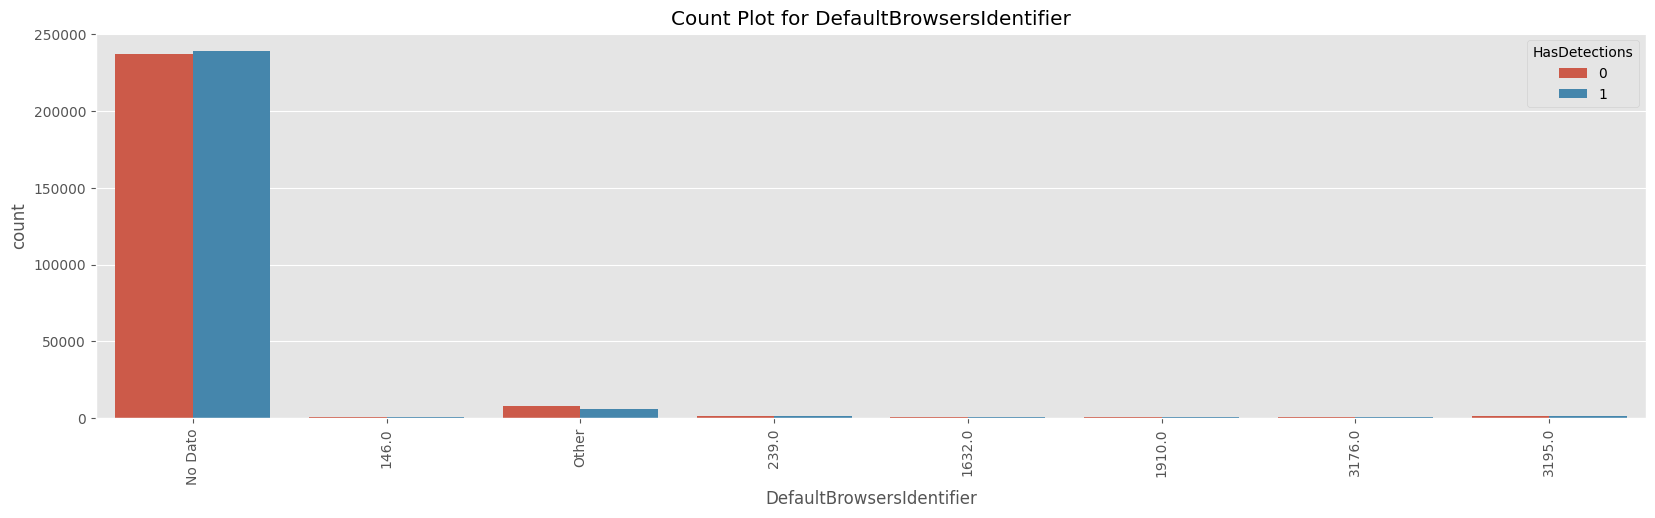



Exploring Column: AVProductStatesIdentifier



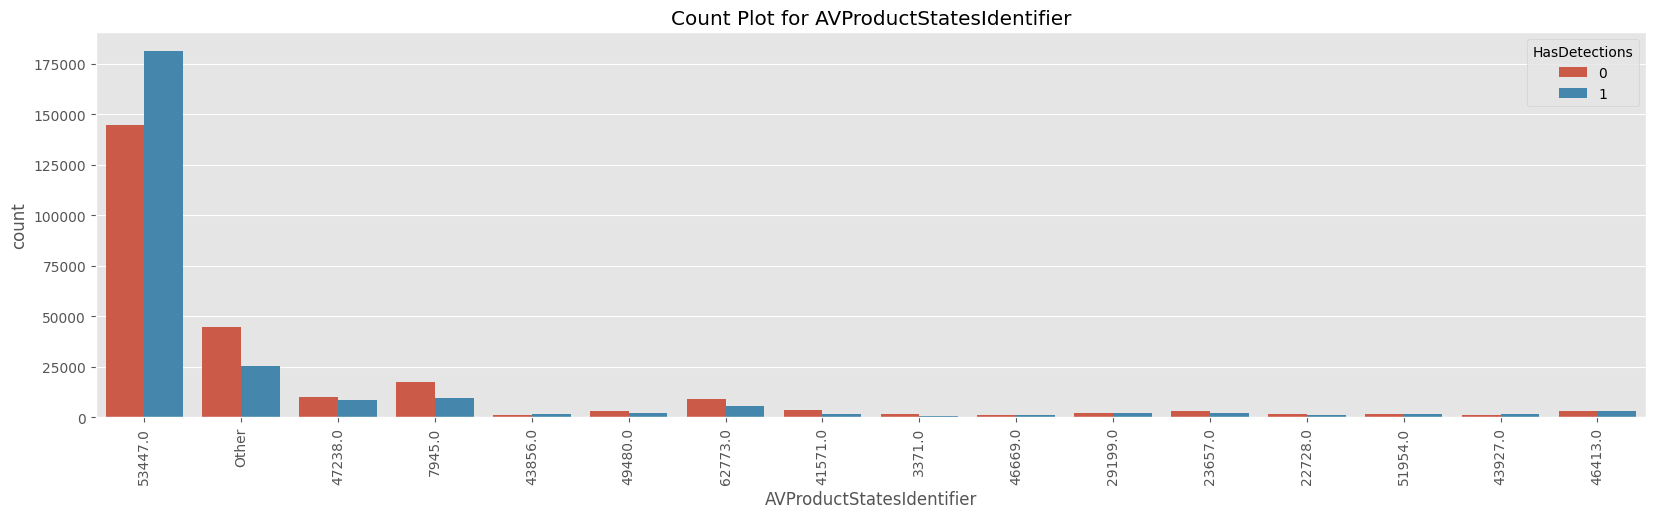



Exploring Column: CountryIdentifier



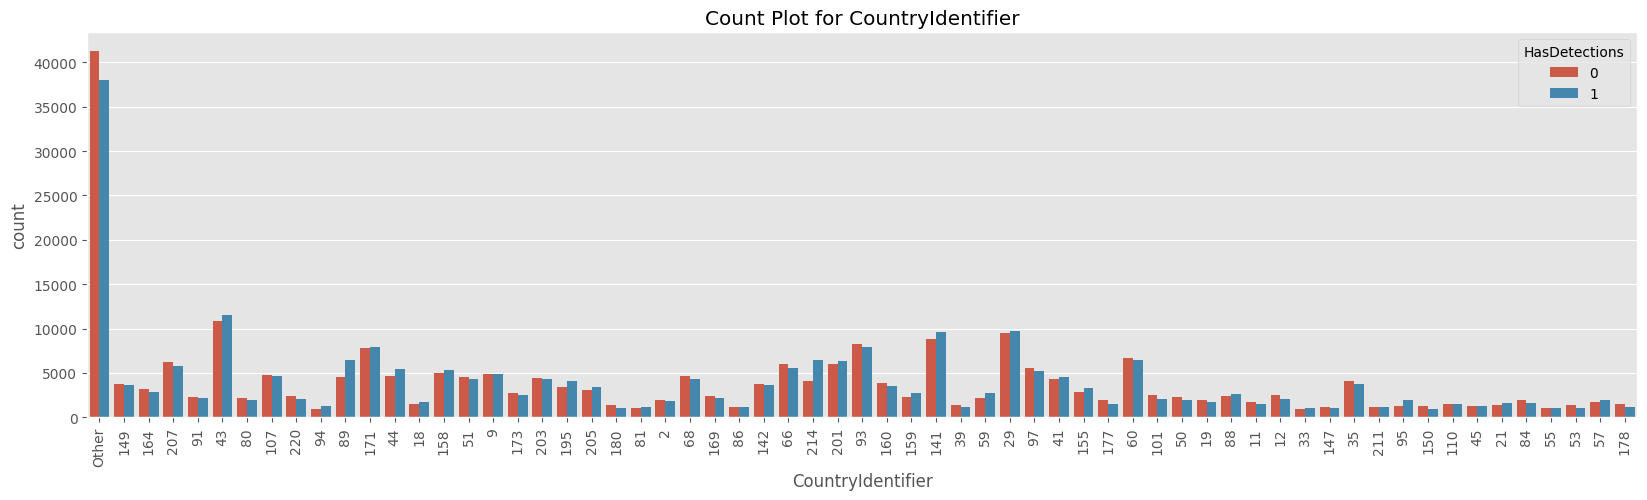



Exploring Column: CityIdentifier



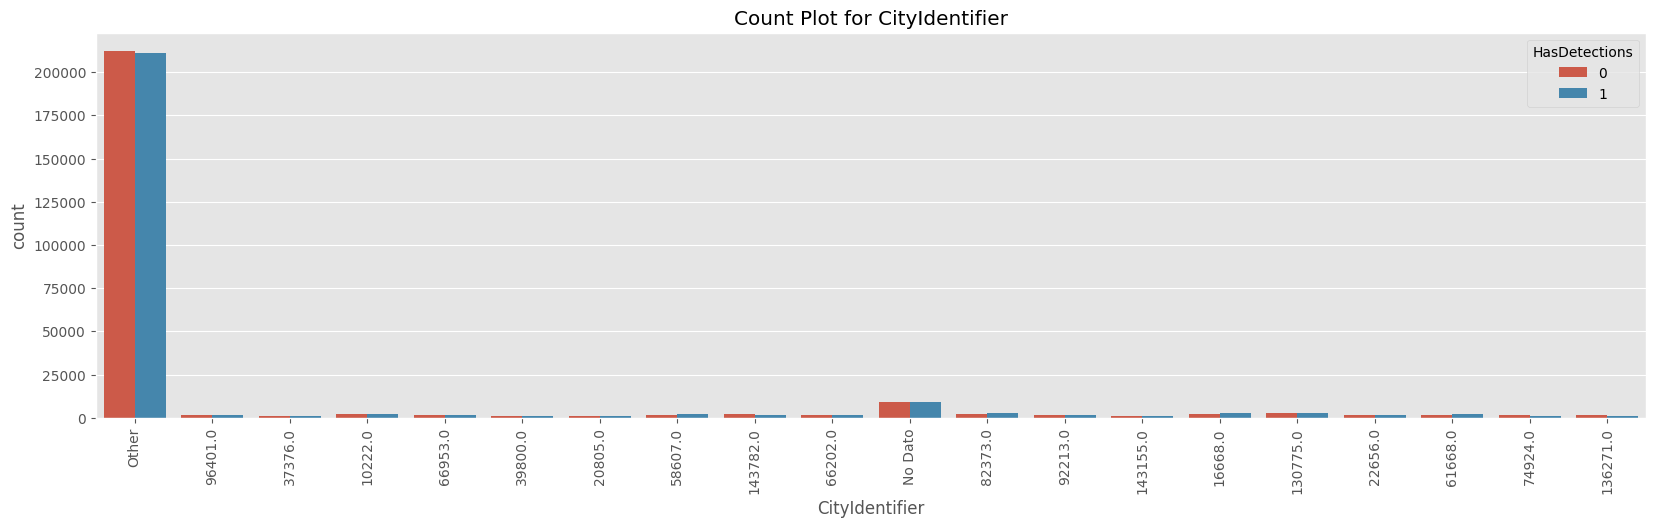



Exploring Column: OrganizationIdentifier



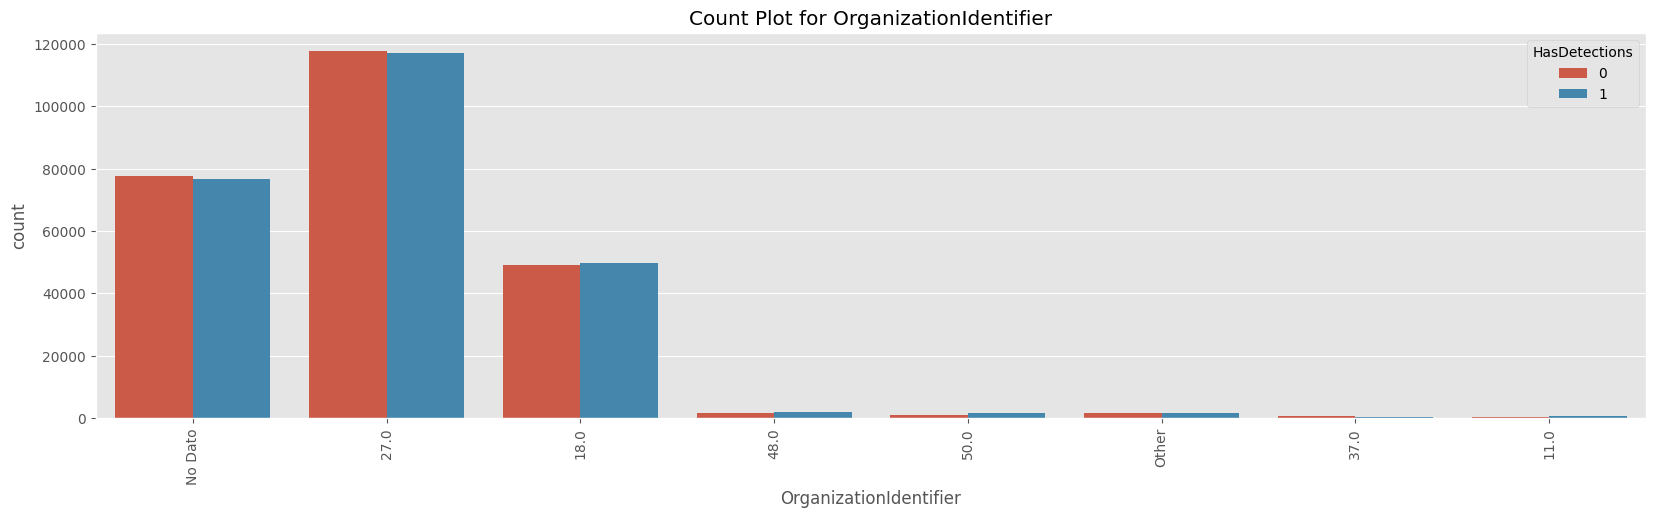



Exploring Column: GeoNameIdentifier



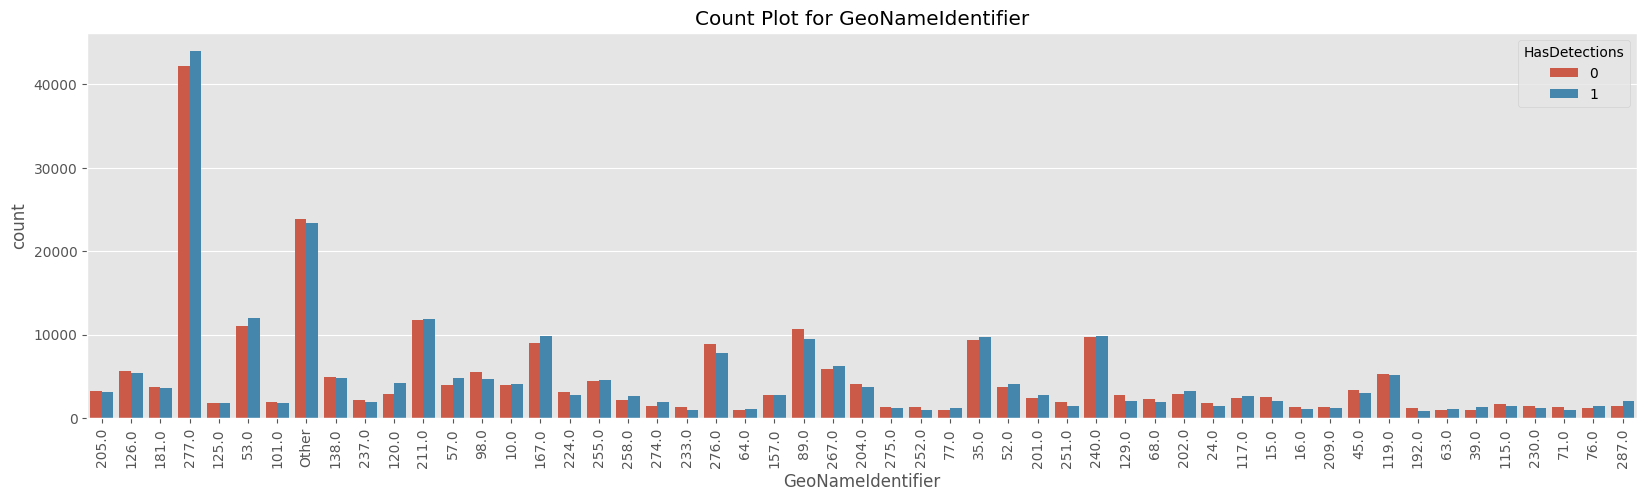



Exploring Column: LocaleEnglishNameIdentifier



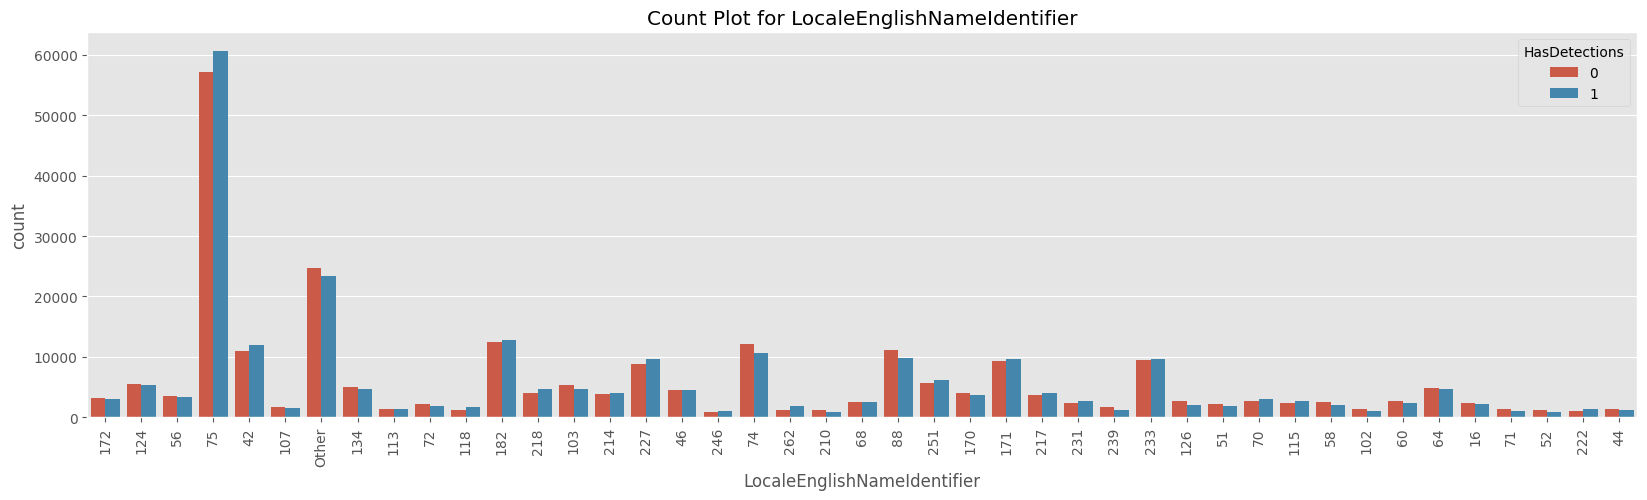



Exploring Column: Platform



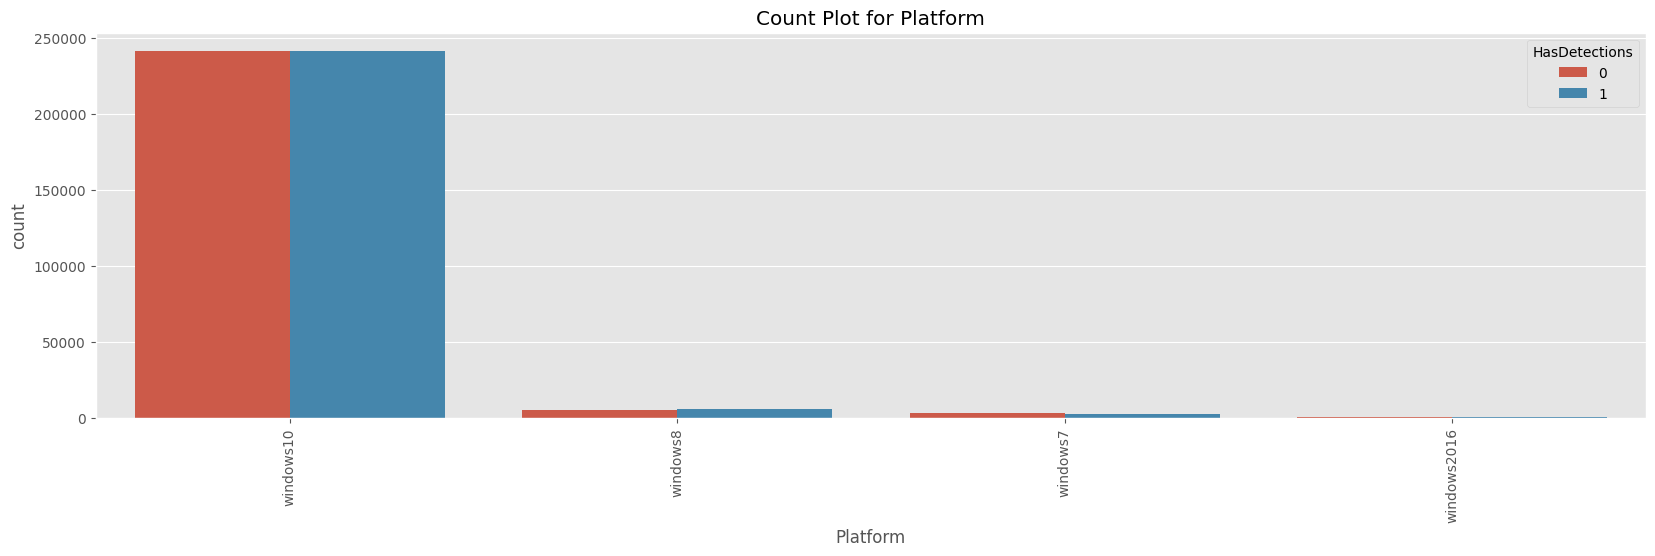



Exploring Column: Processor



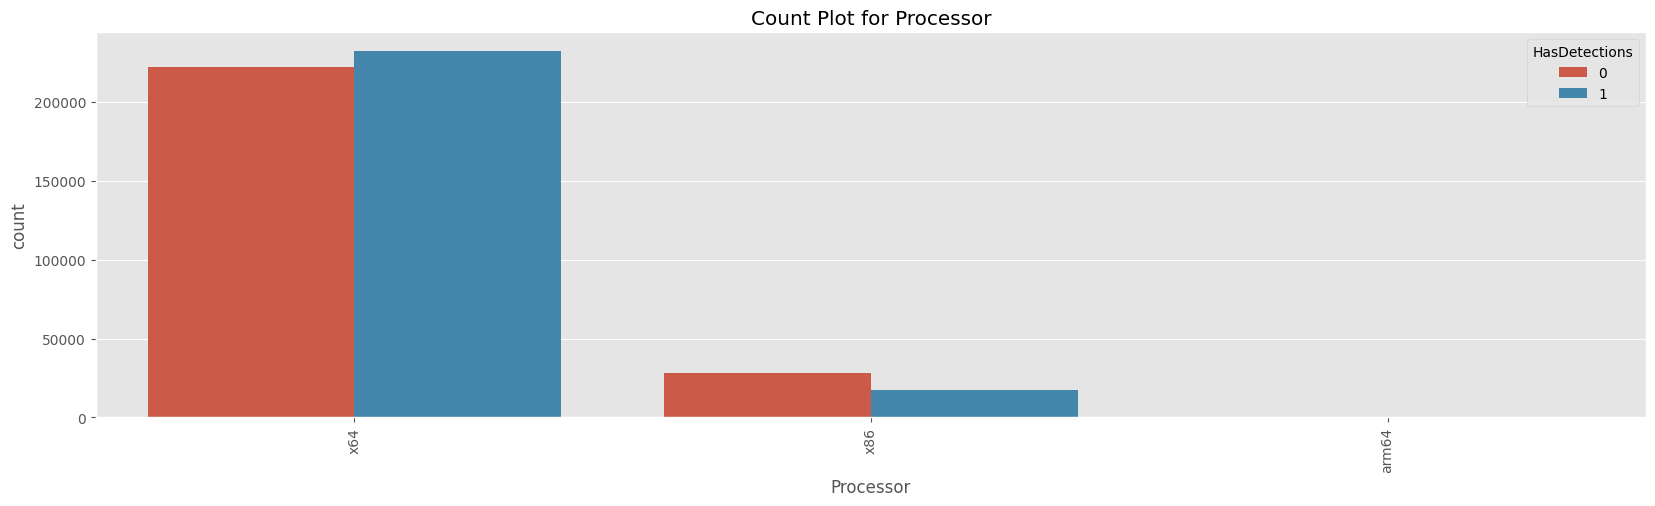



Exploring Column: OsVer



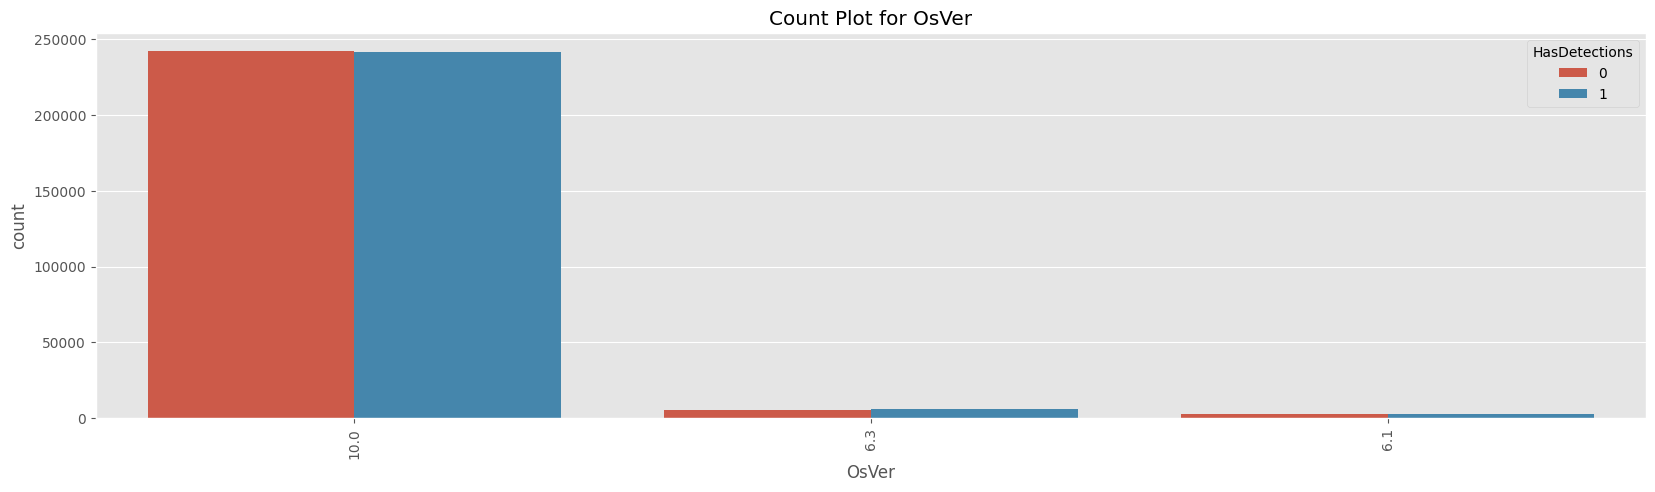



Exploring Column: OsBuild



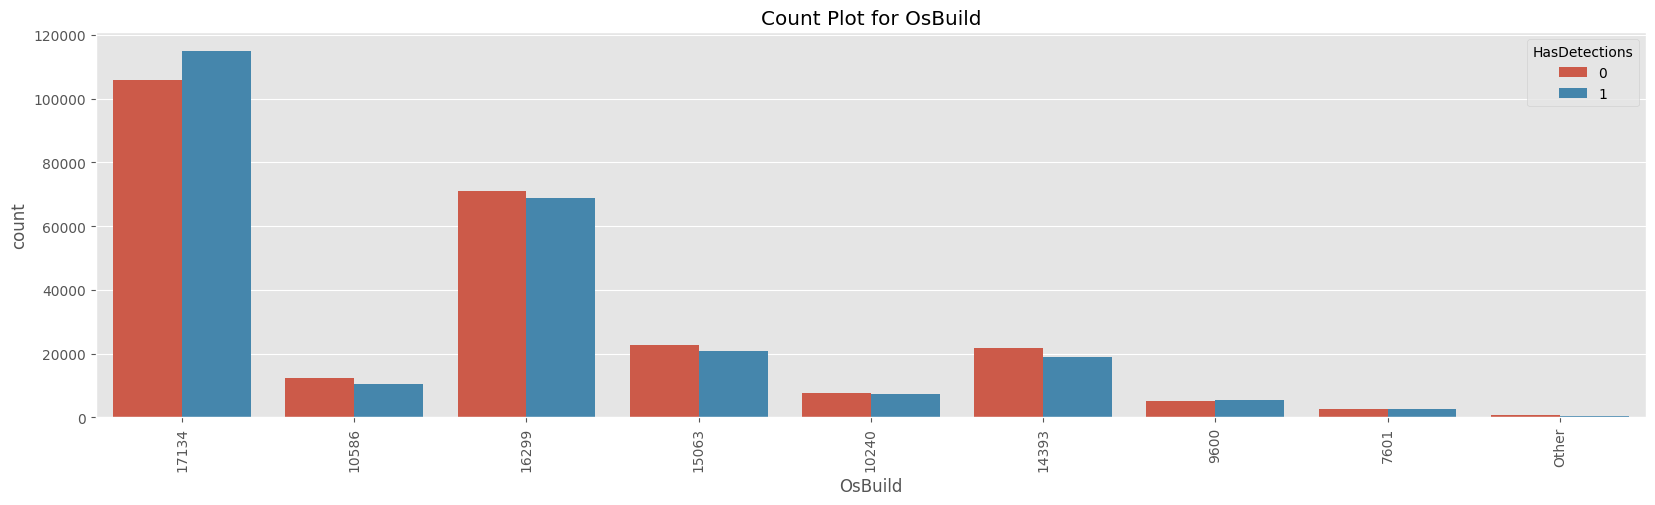



Exploring Column: OsSuite



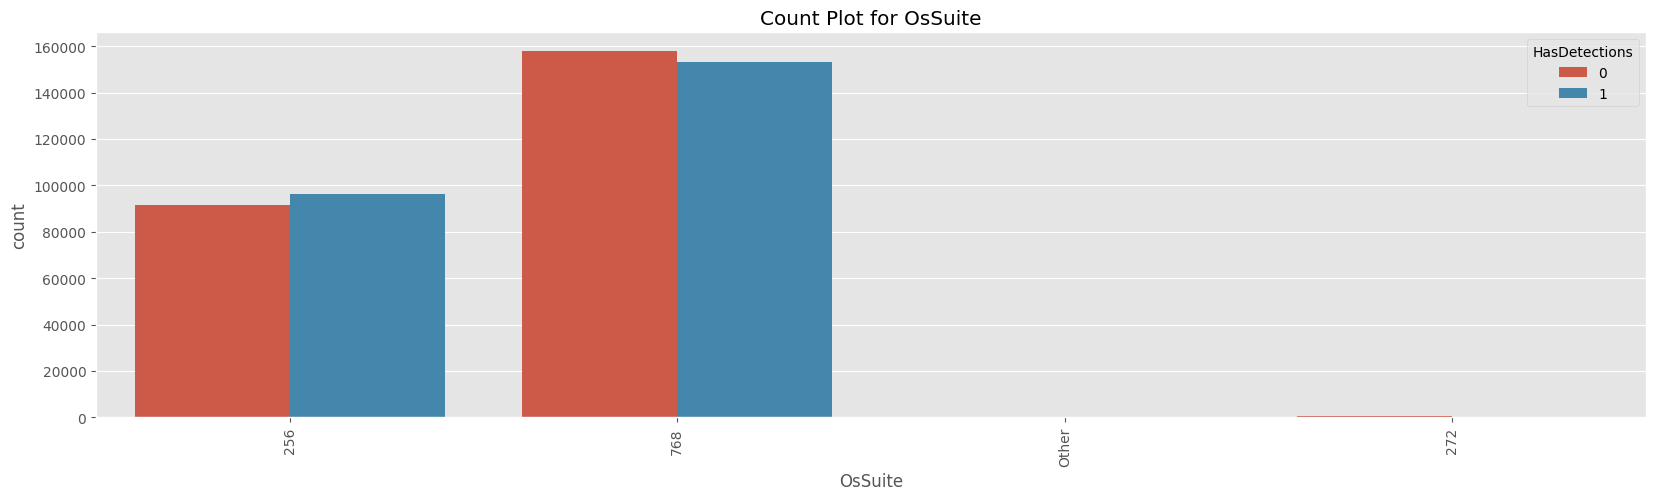



Exploring Column: OsPlatformSubRelease



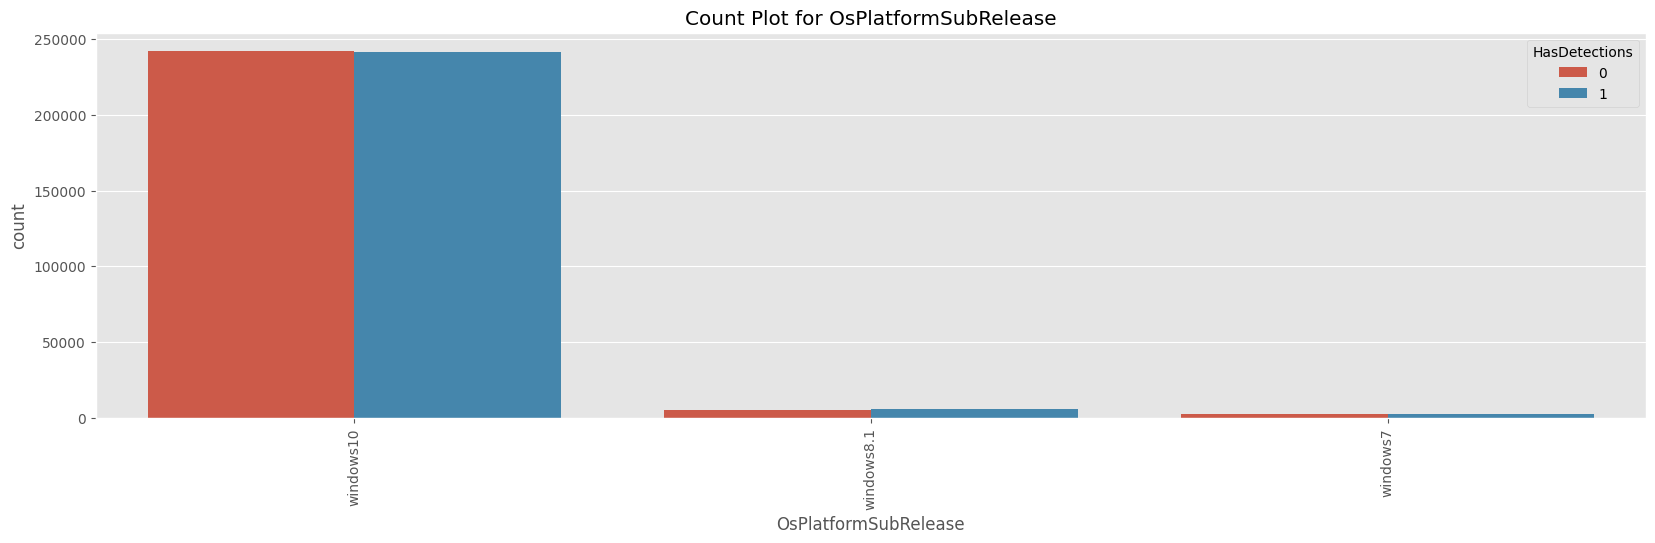



Exploring Column: OsBuildLab



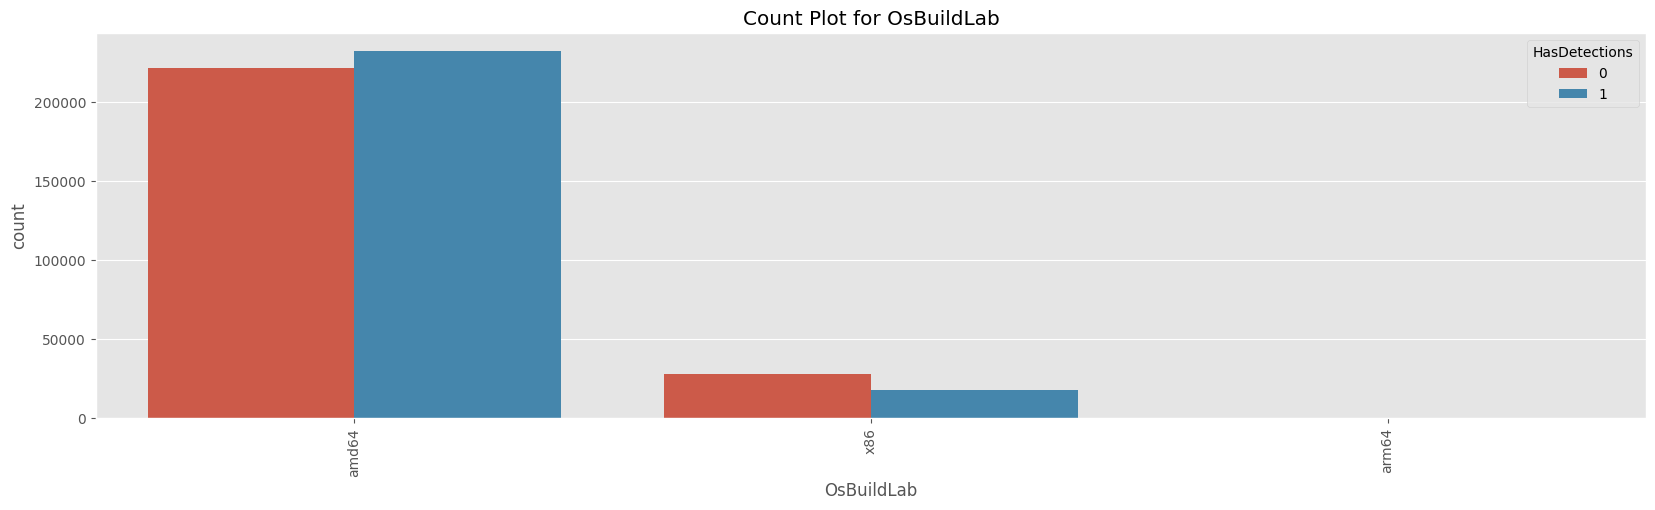



Exploring Column: SkuEdition



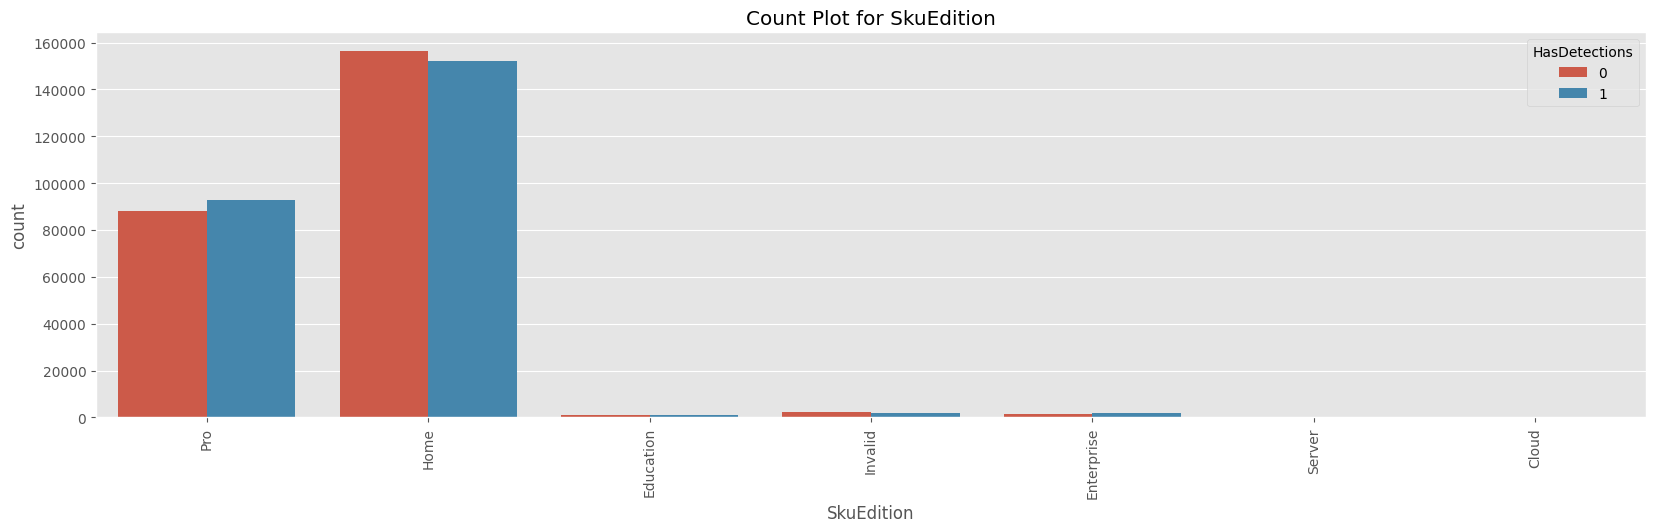



Exploring Column: IsProtected



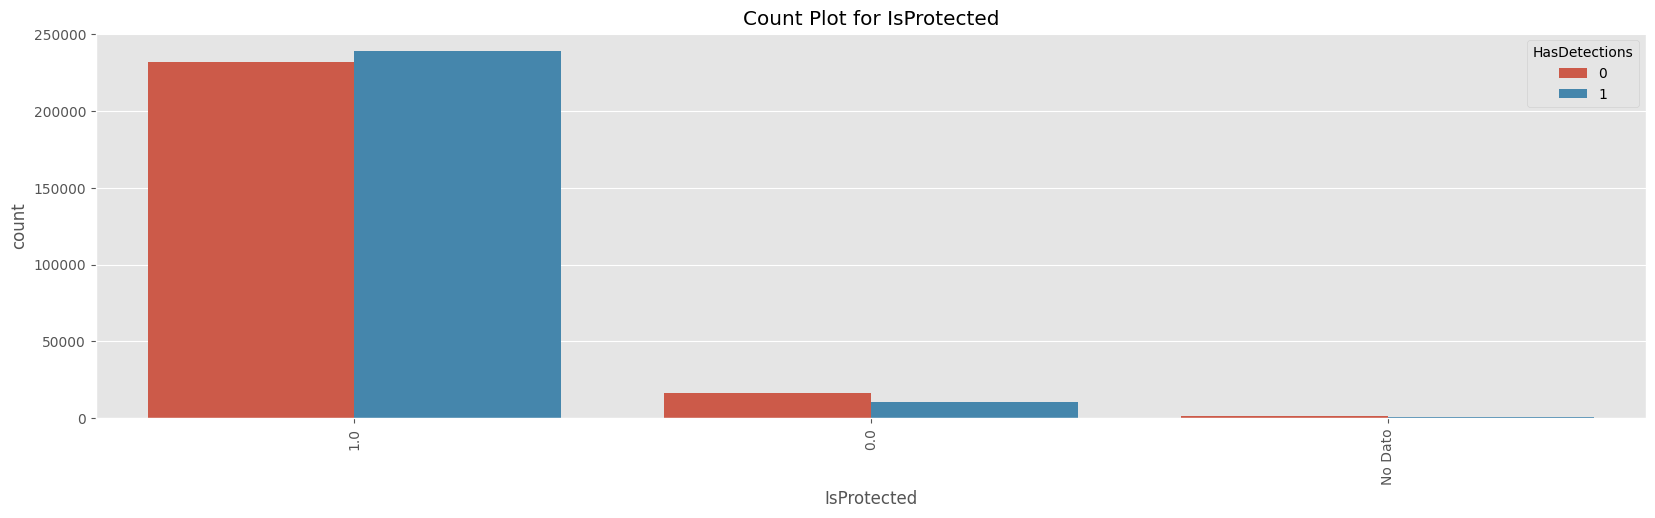



Exploring Column: PuaMode



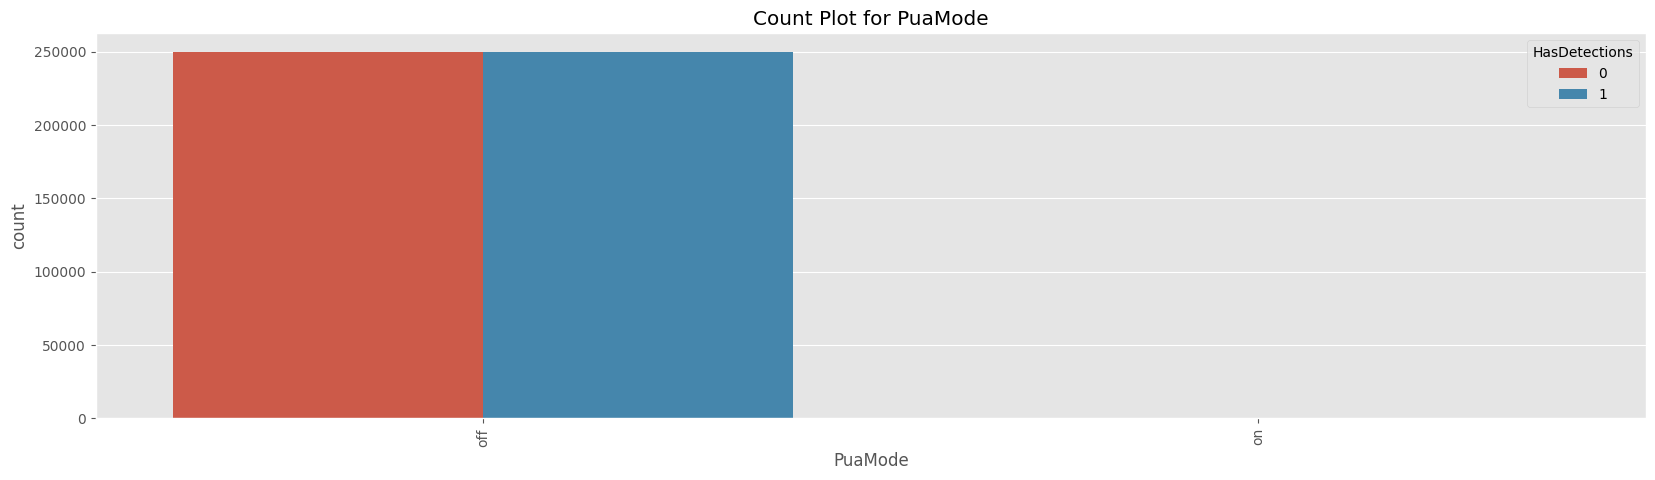



Exploring Column: SMode



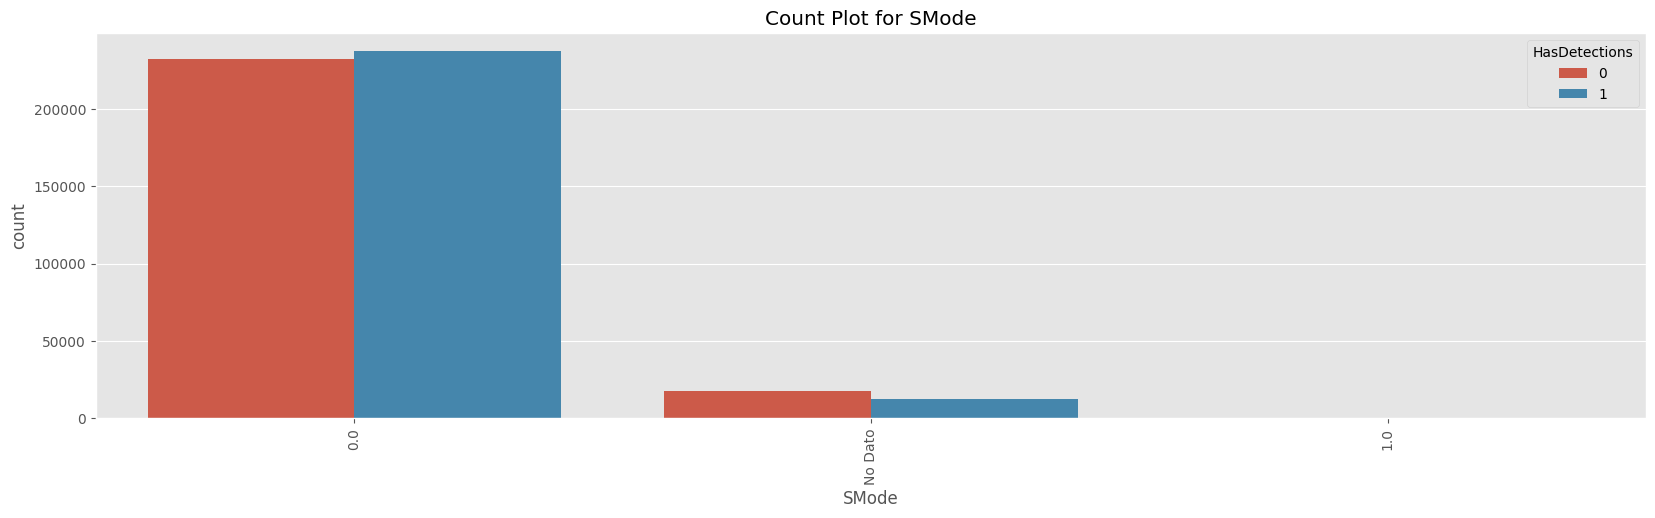



Exploring Column: IeVerIdentifier



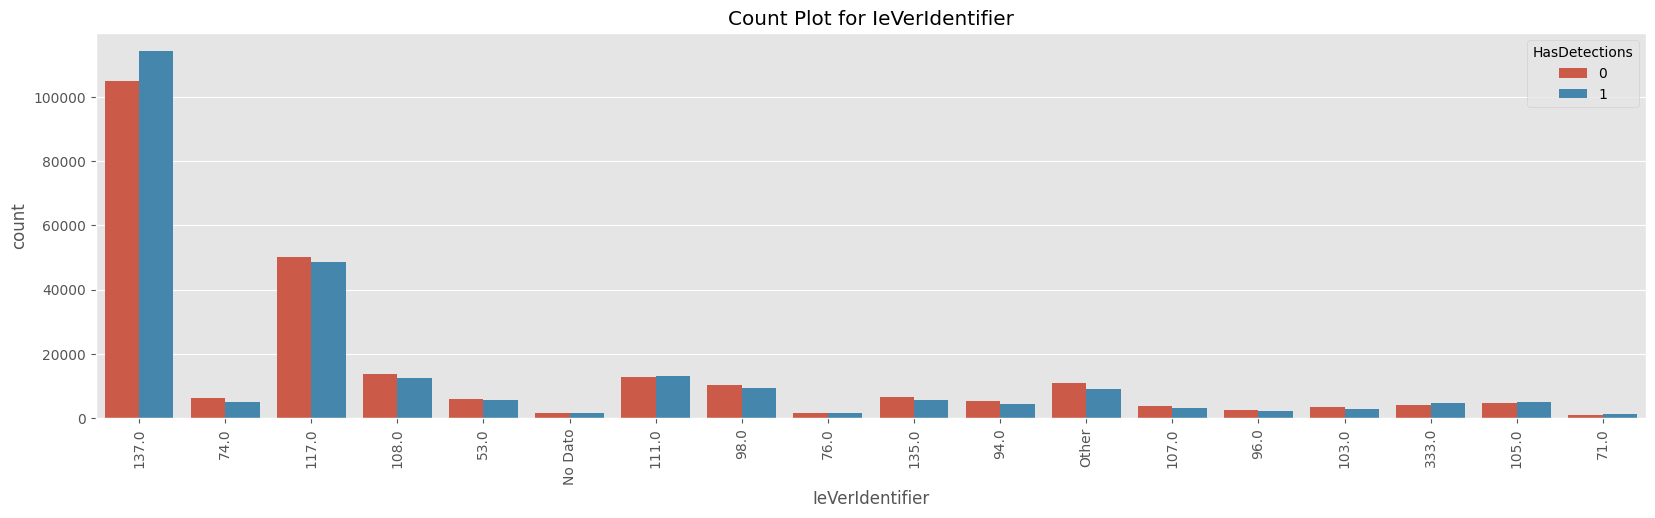



Exploring Column: SmartScreen



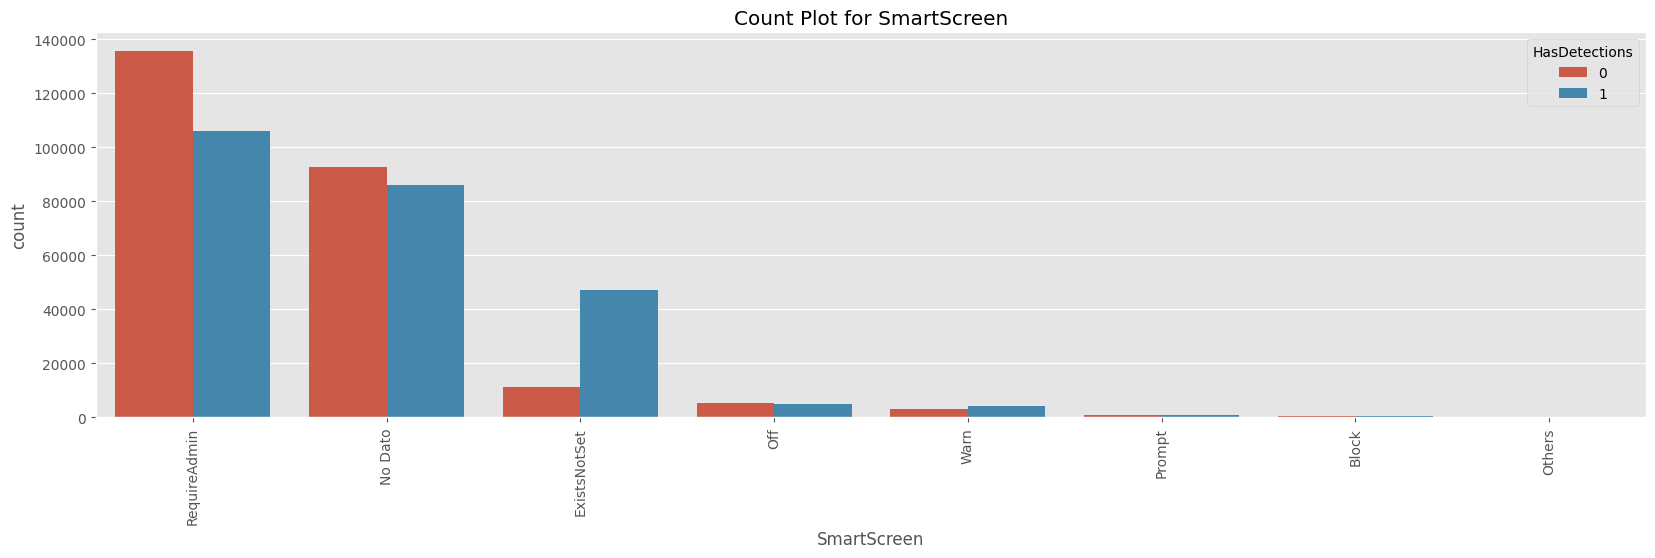



Exploring Column: Firewall



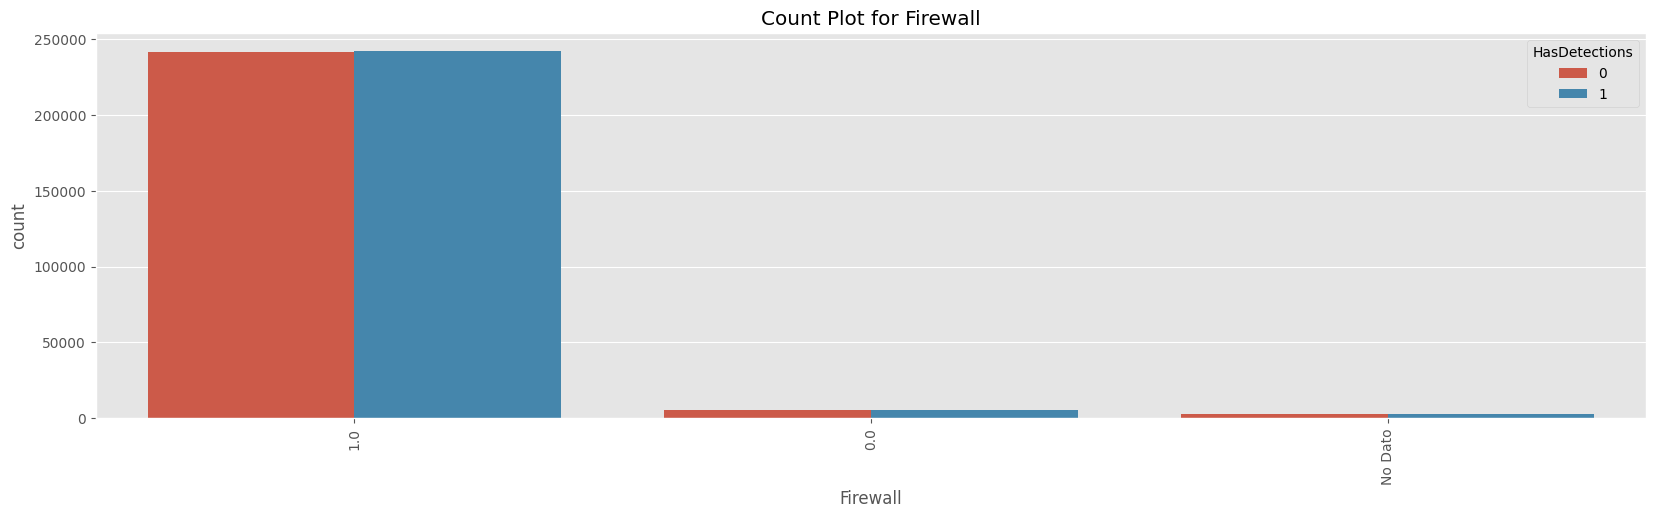



Exploring Column: UacLuaenable



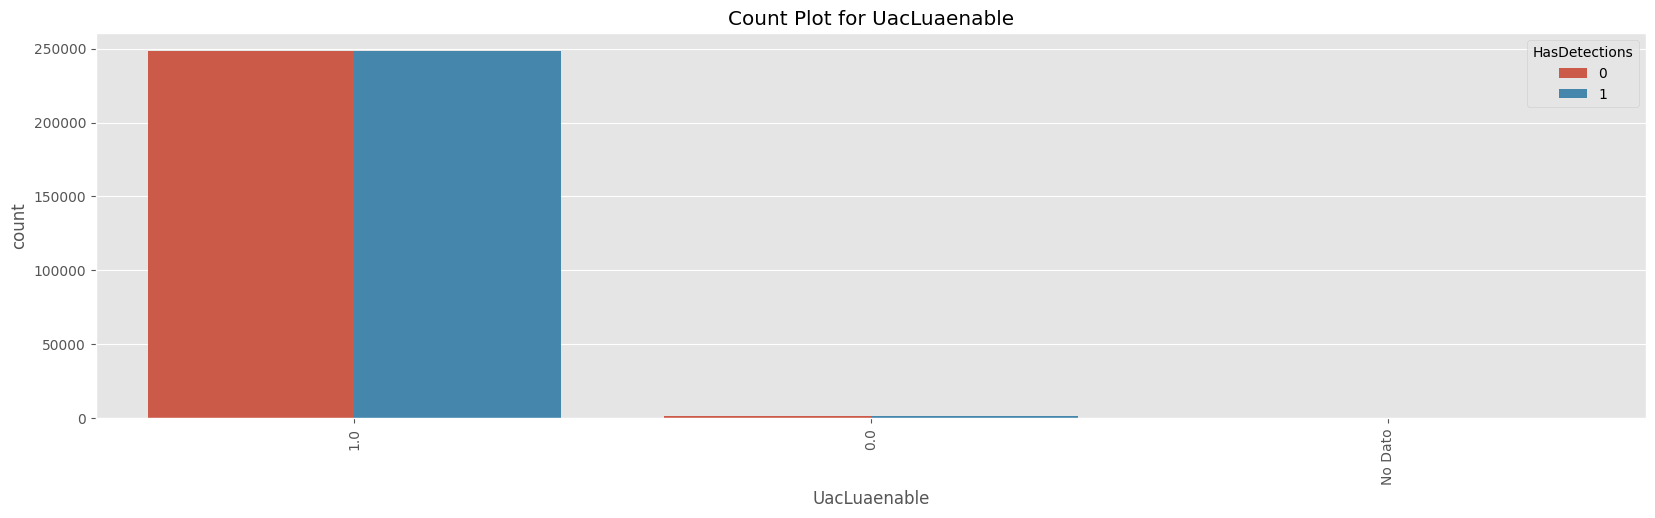



Exploring Column: Census_MDC2FormFactor



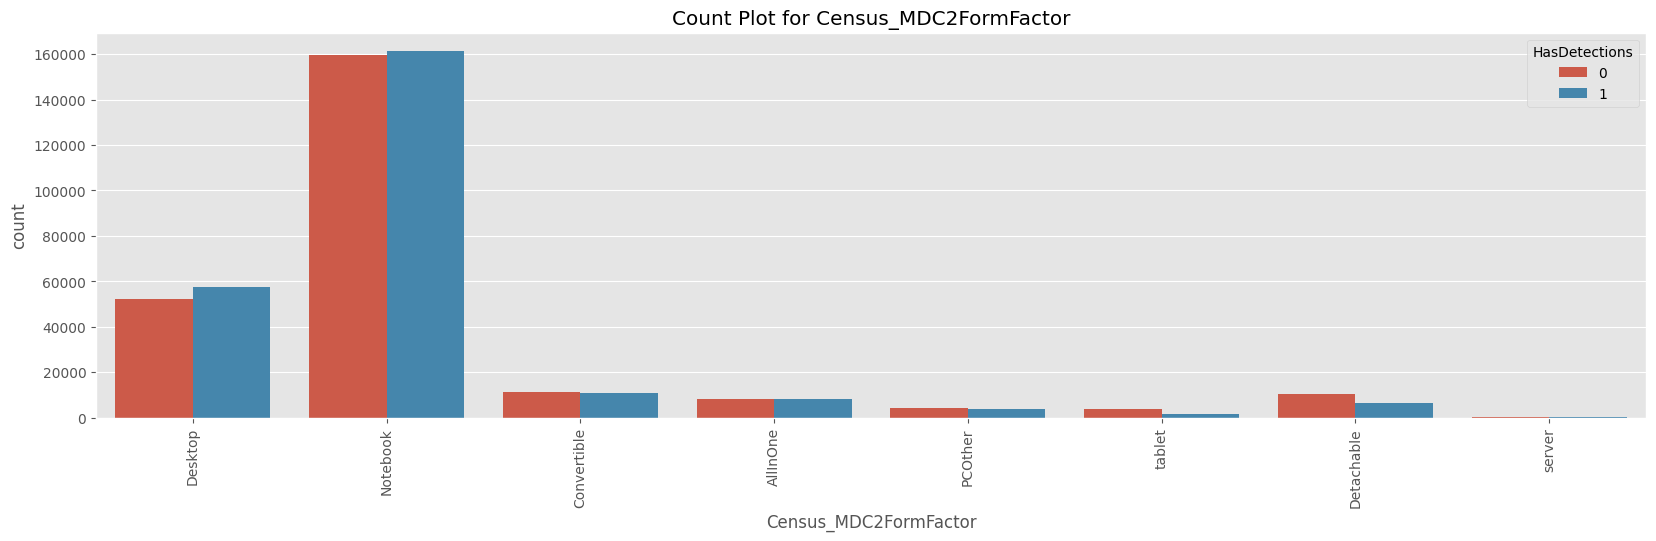



Exploring Column: Census_DeviceFamily



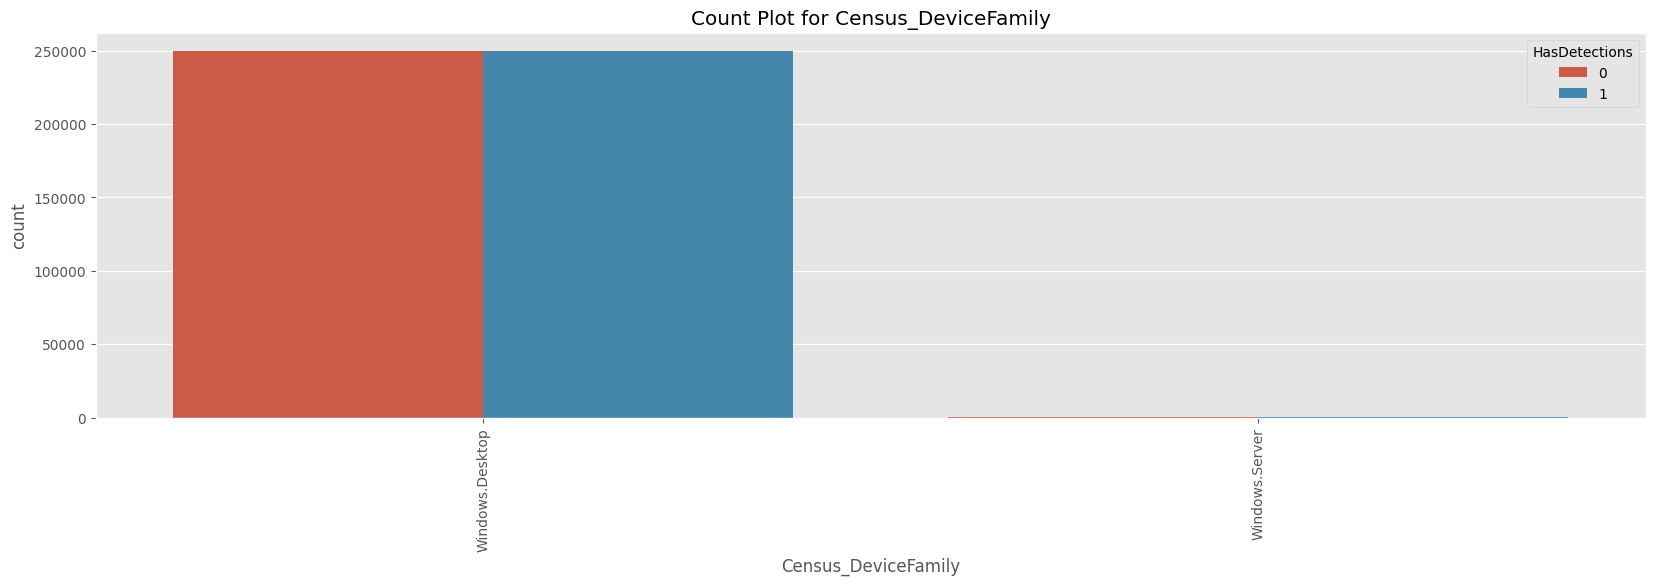



Exploring Column: Census_OEMNameIdentifier



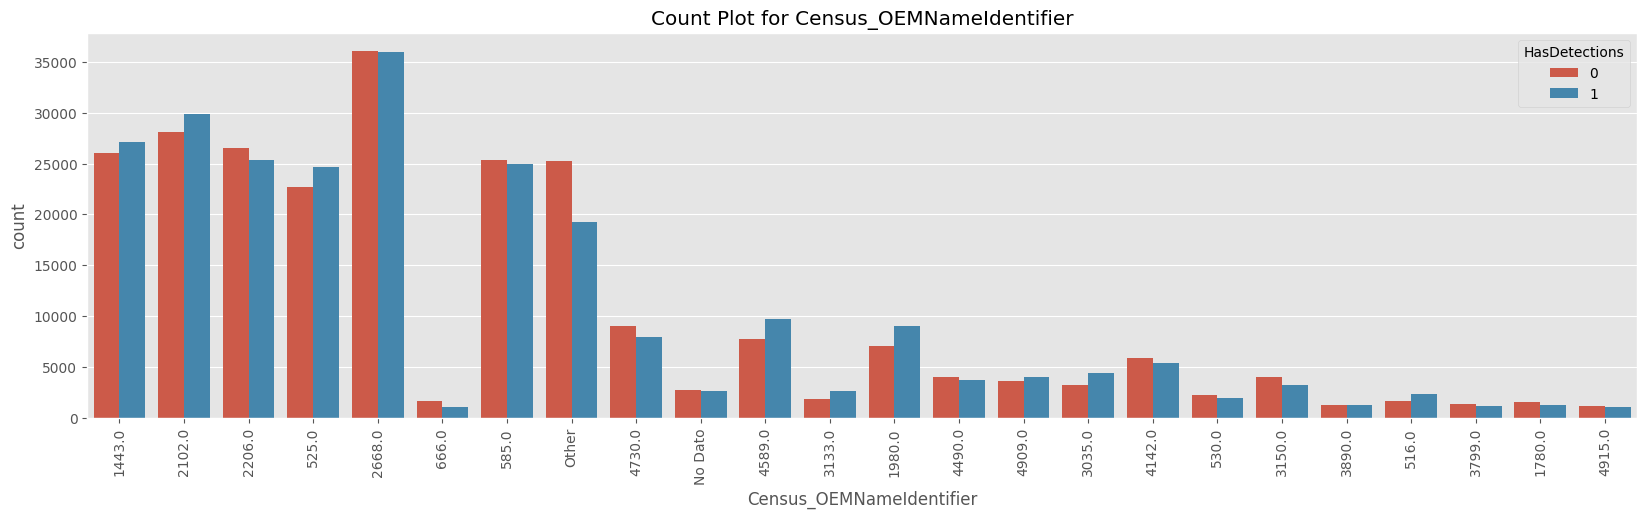



Exploring Column: Census_OEMModelIdentifier



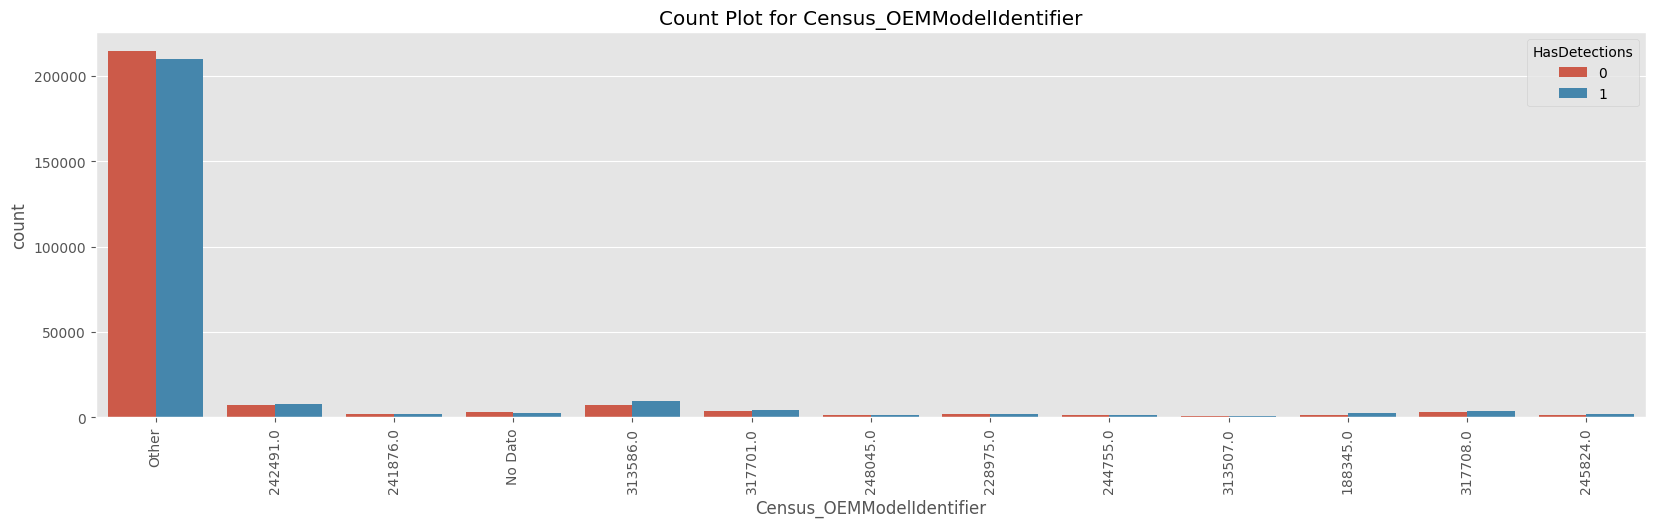



Exploring Column: Census_ProcessorCoreCount



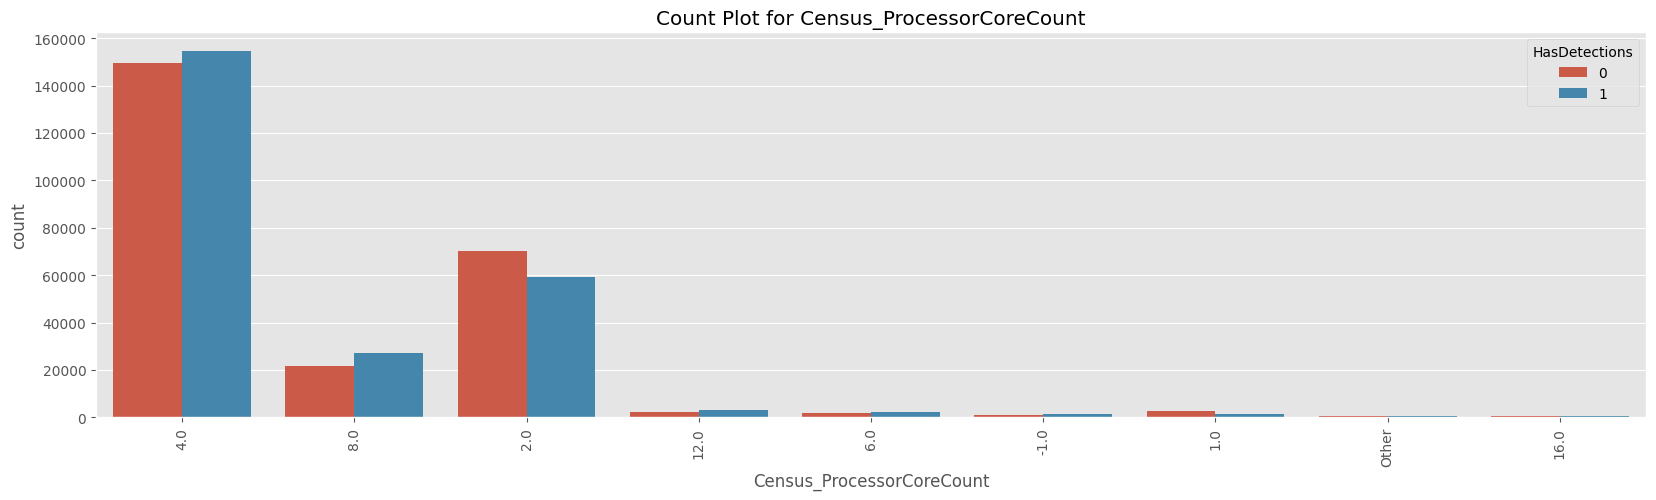



Exploring Column: Census_ProcessorManufacturerIdentifier



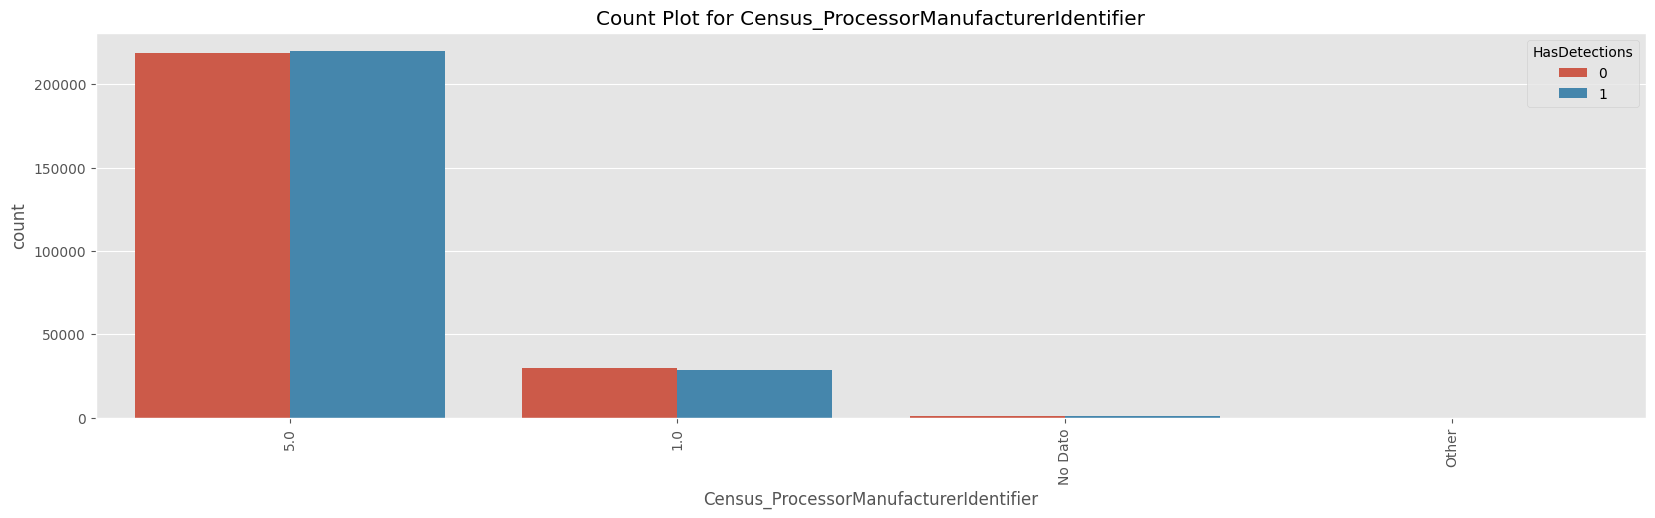



Exploring Column: Census_ProcessorModelIdentifier



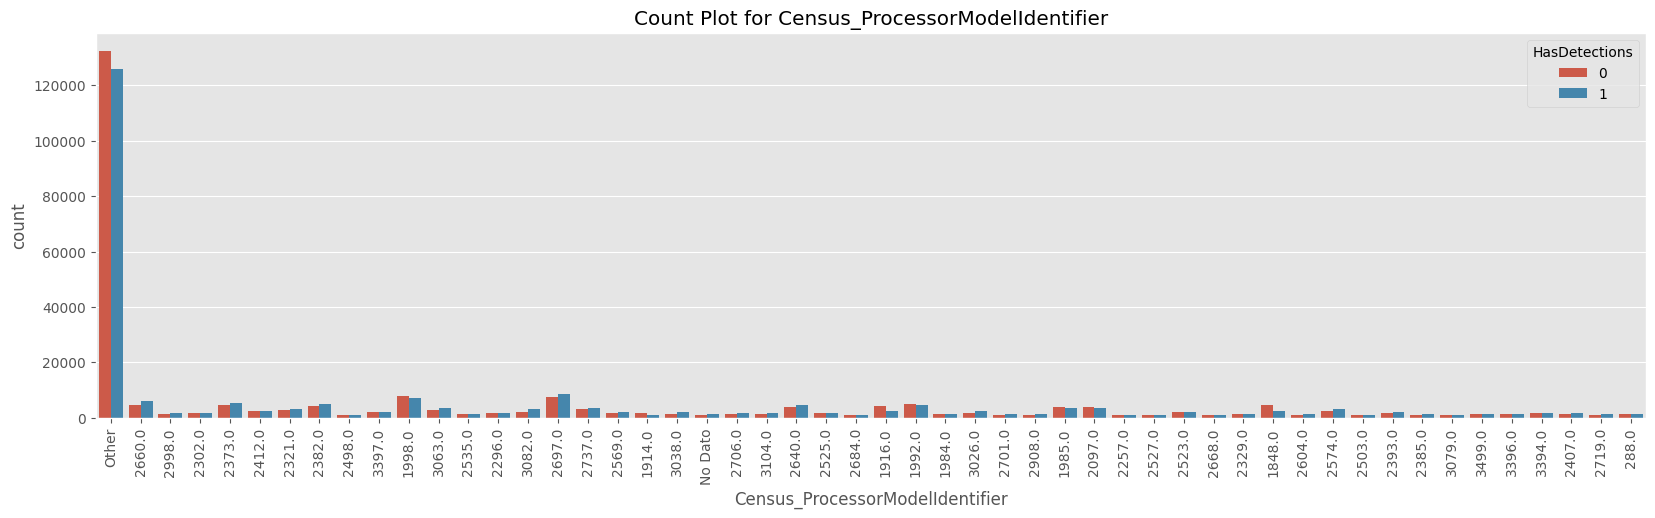



Exploring Column: Census_ProcessorClass



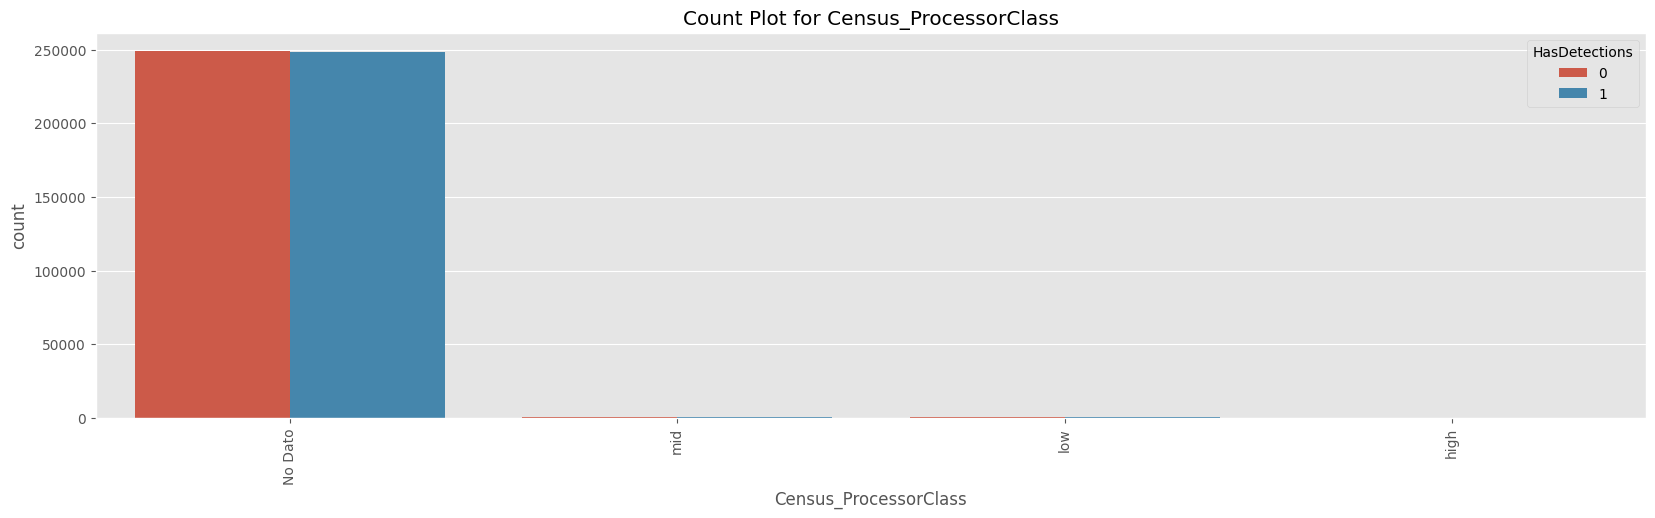



Exploring Column: Census_PrimaryDiskTotalCapacity



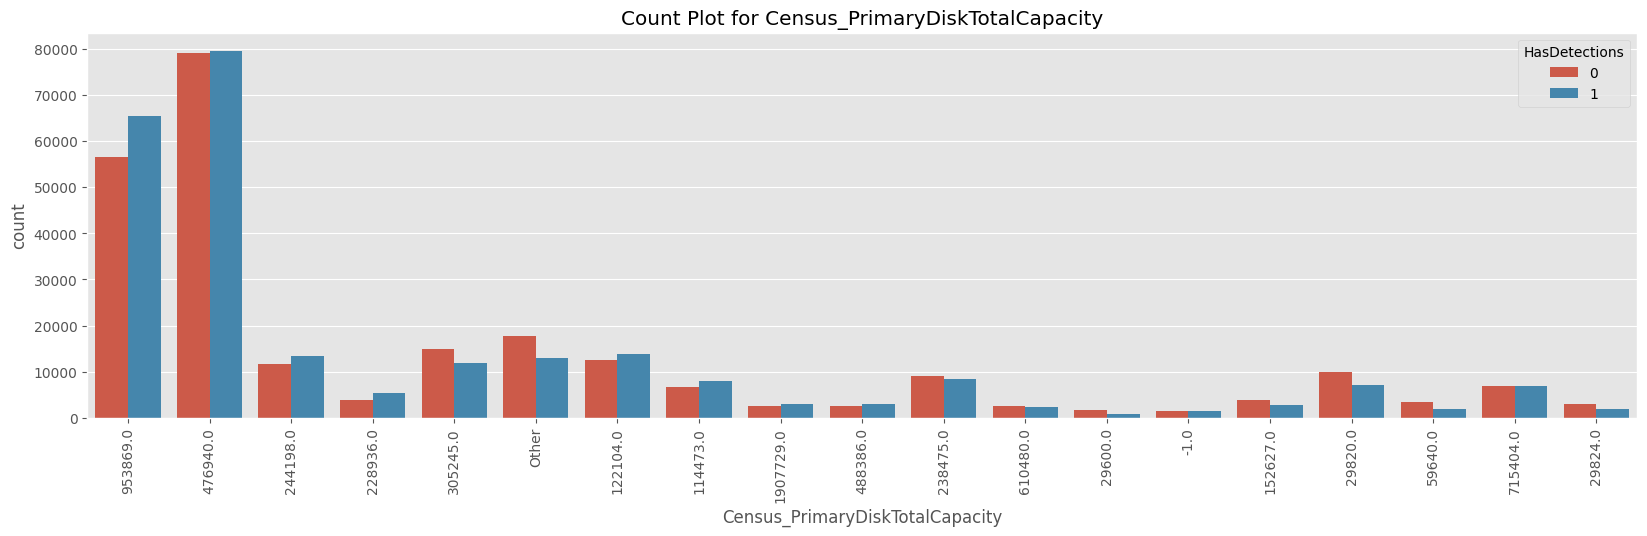



Exploring Column: Census_PrimaryDiskTypeName



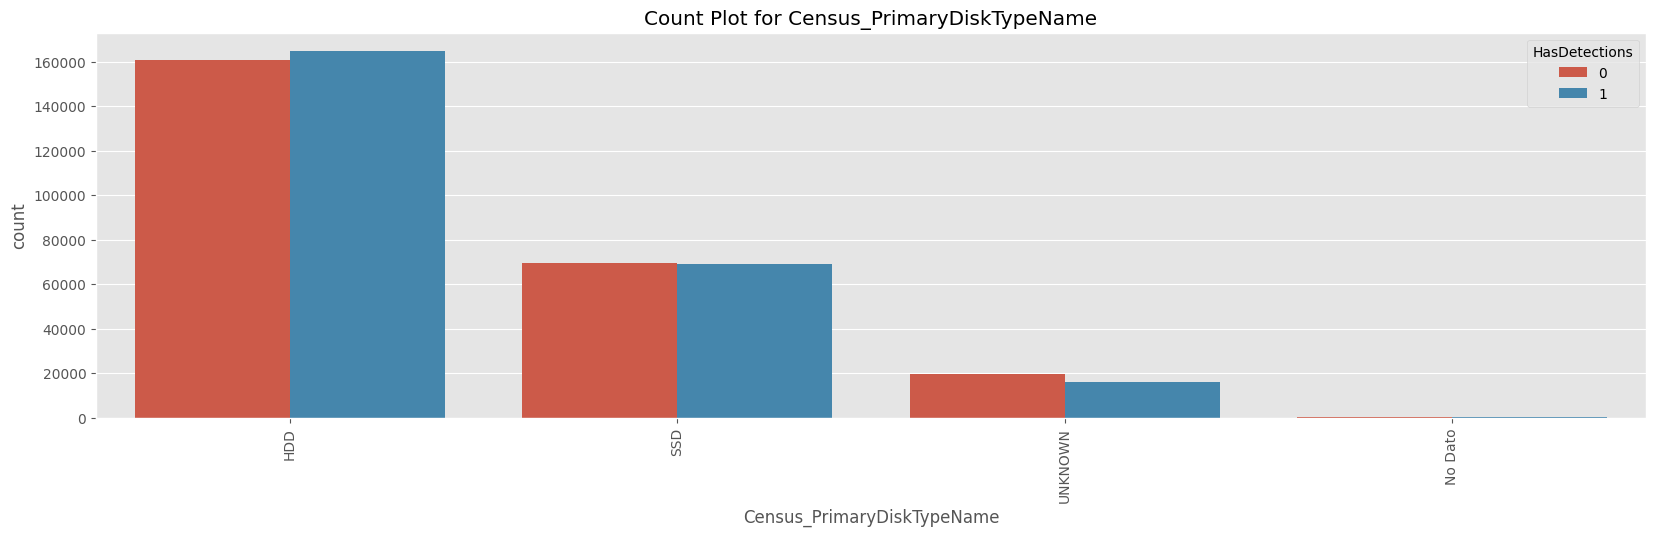



Exploring Column: Census_SystemVolumeTotalCapacity



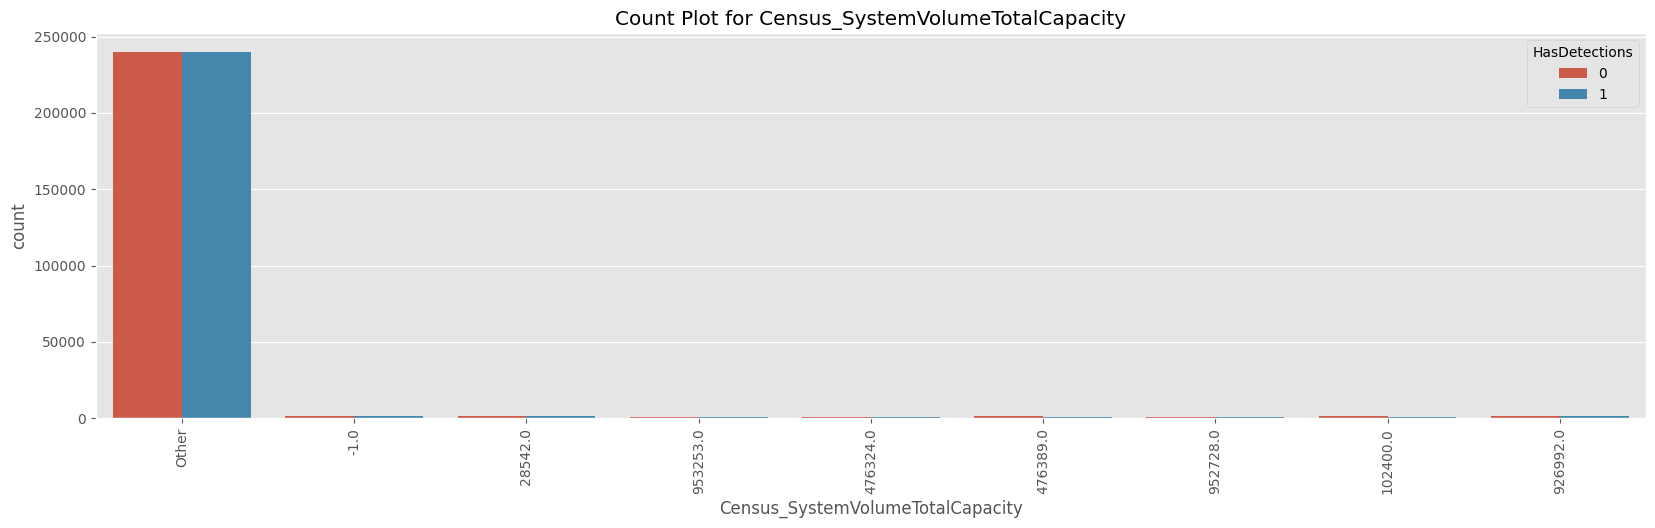



Exploring Column: Census_TotalPhysicalRAM



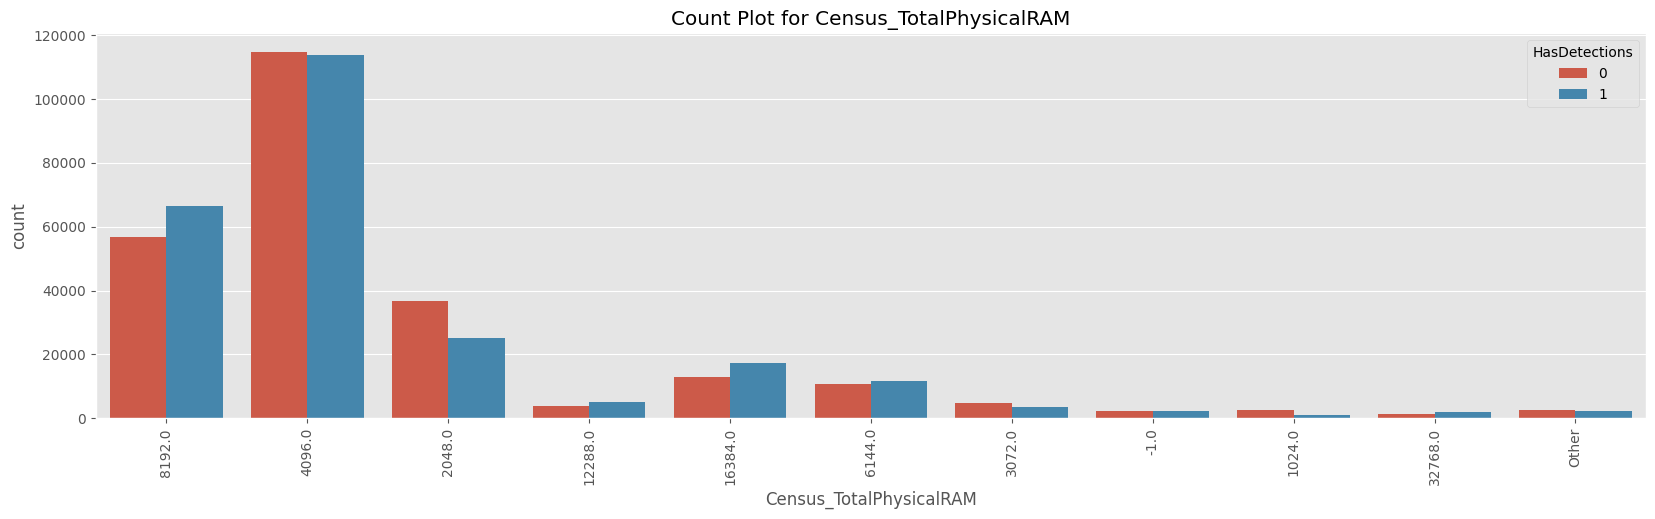



Exploring Column: Census_ChassisTypeName



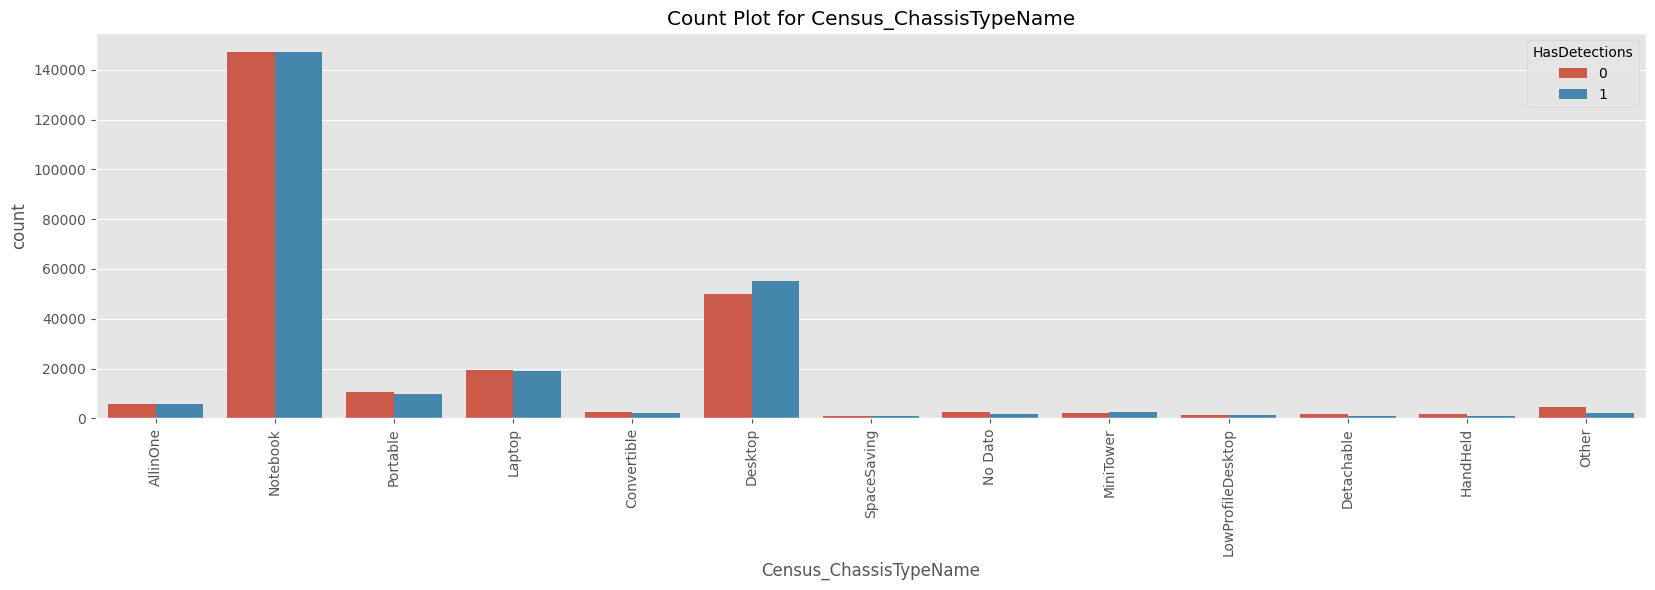



Exploring Column: Census_InternalPrimaryDiagonalDisplaySizeInInches



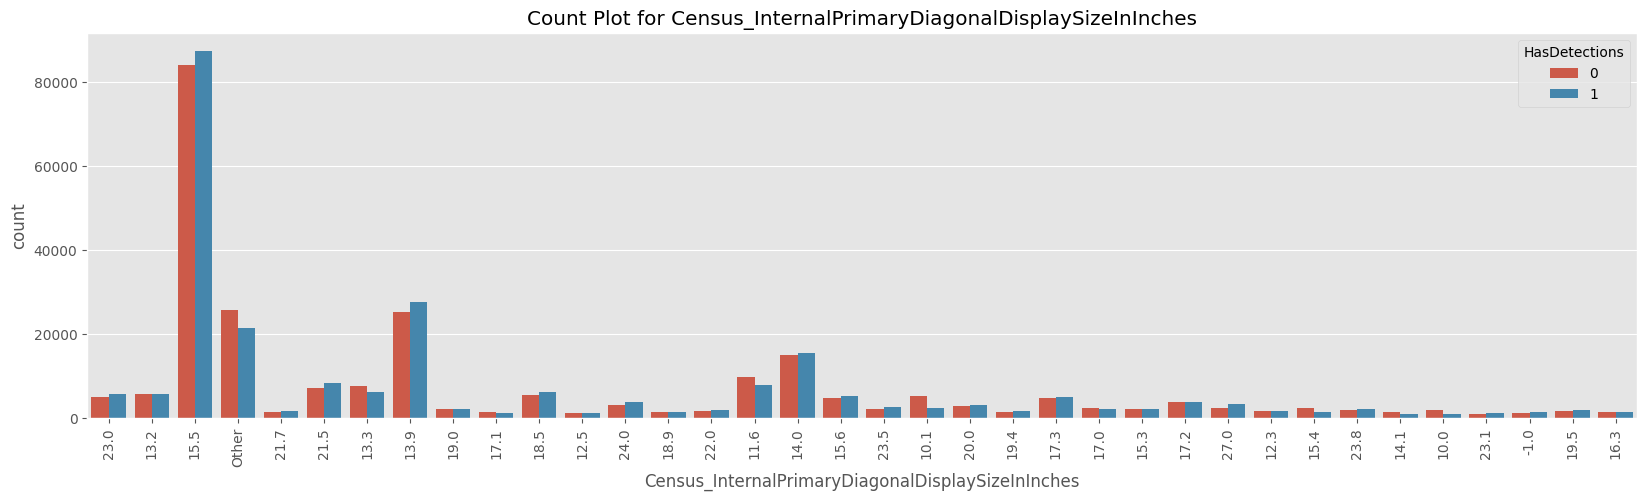



Exploring Column: Census_InternalPrimaryDisplayResolutionHorizontal



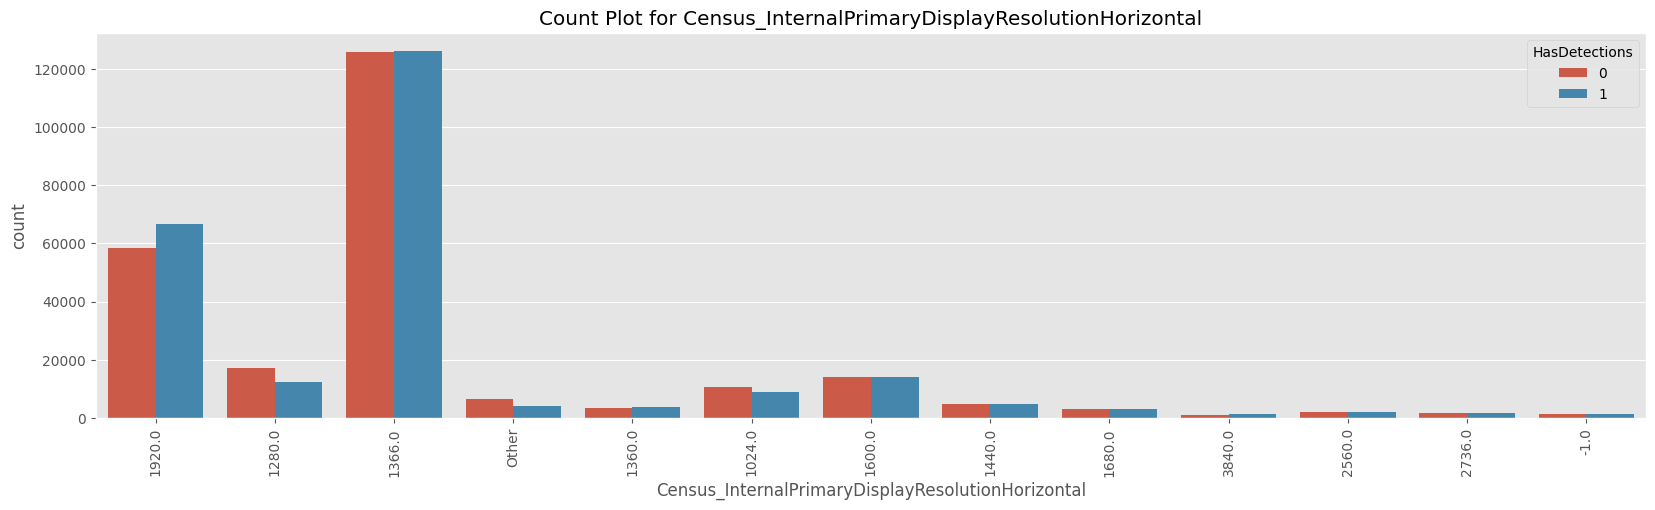



Exploring Column: Census_InternalPrimaryDisplayResolutionVertical



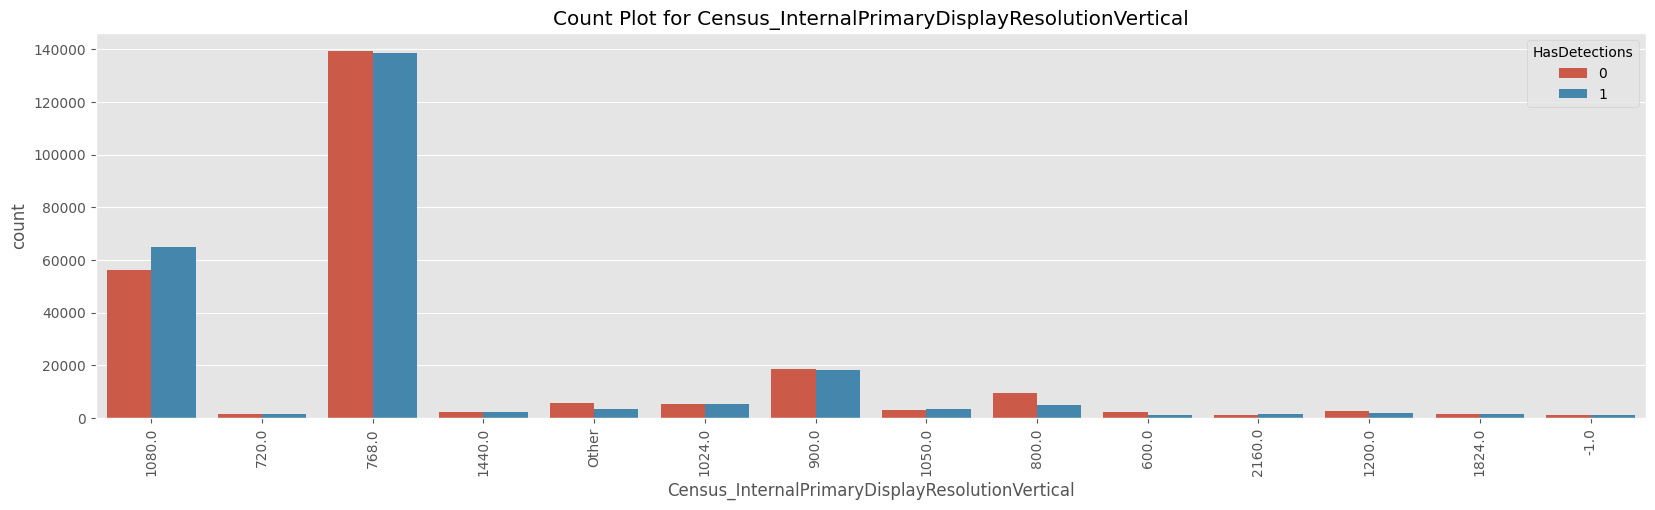



Exploring Column: Census_PowerPlatformRoleName



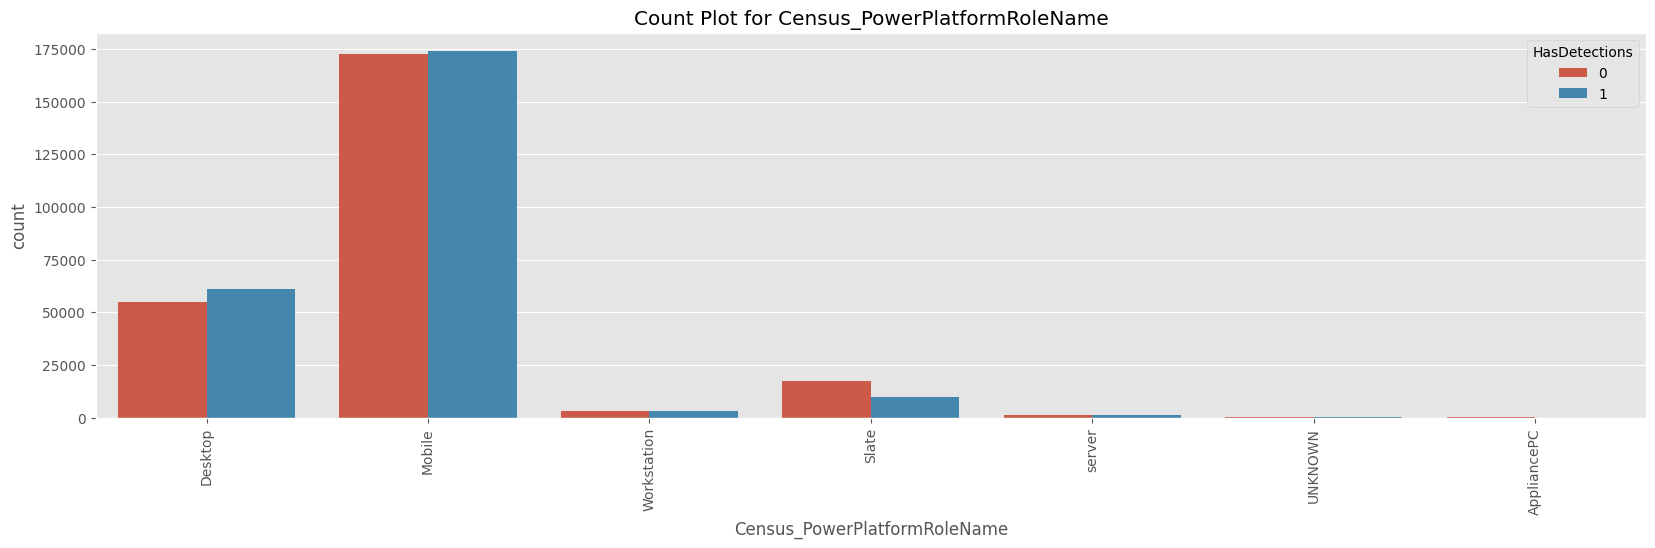



Exploring Column: Census_InternalBatteryType



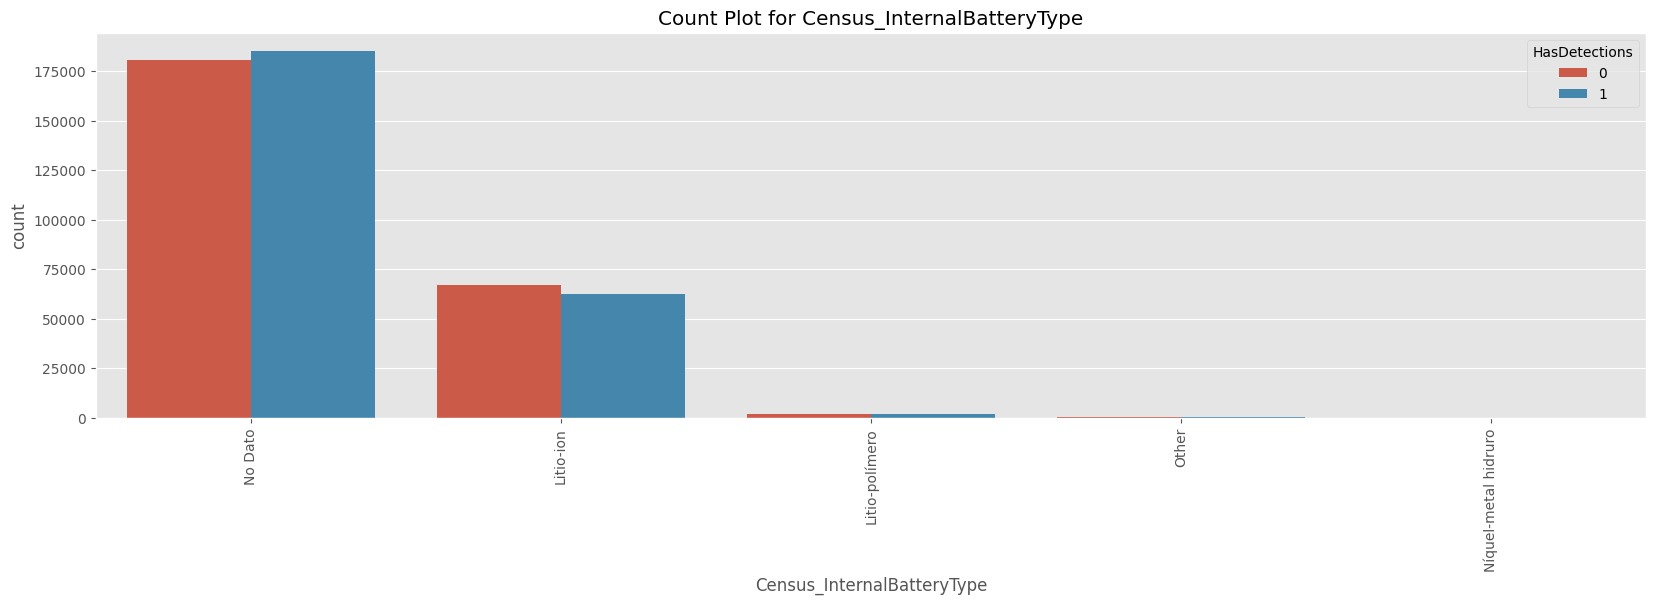



Exploring Column: Census_InternalBatteryNumberOfCharges



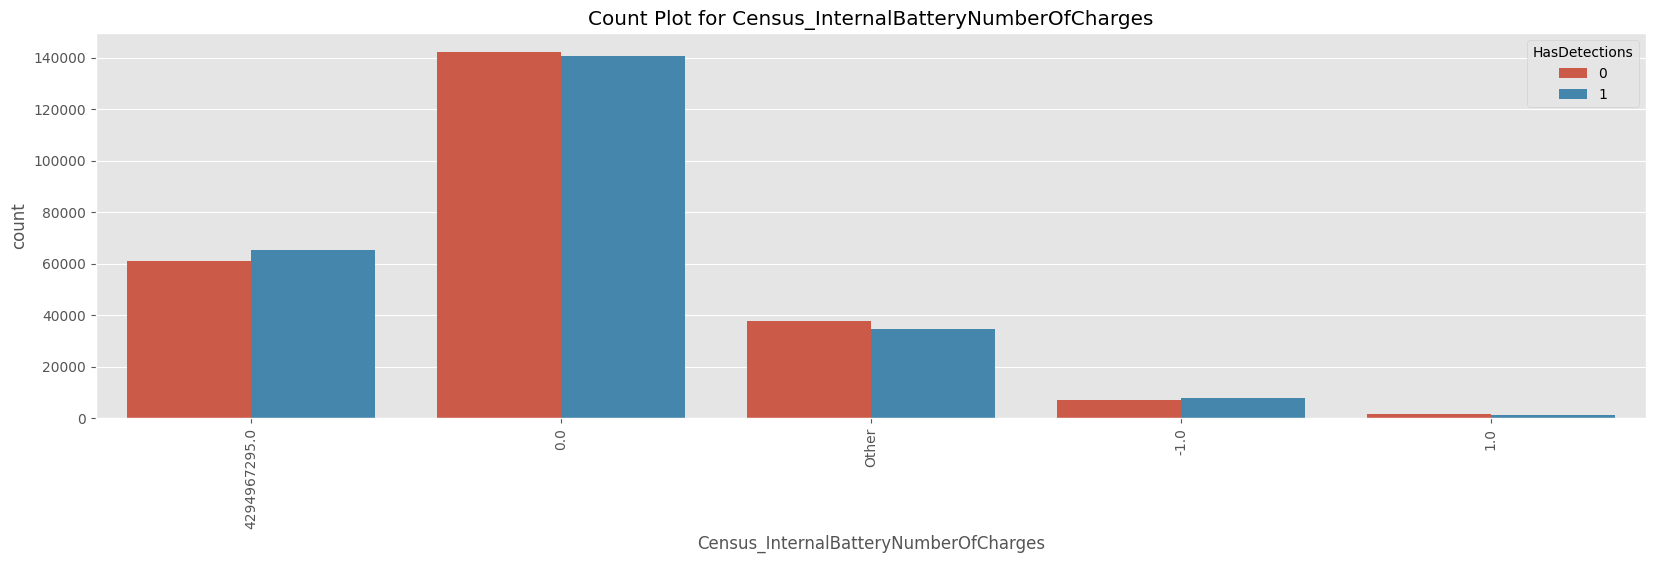



Exploring Column: Census_OSVersion



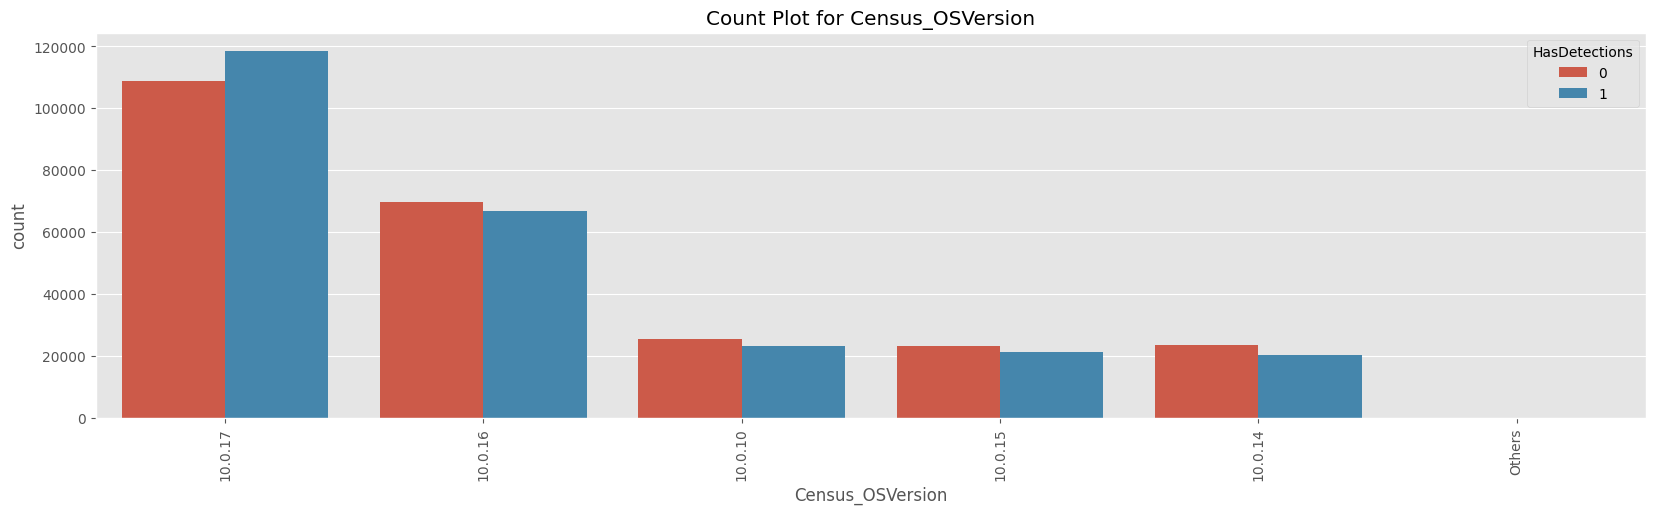



Exploring Column: Census_OSArchitecture



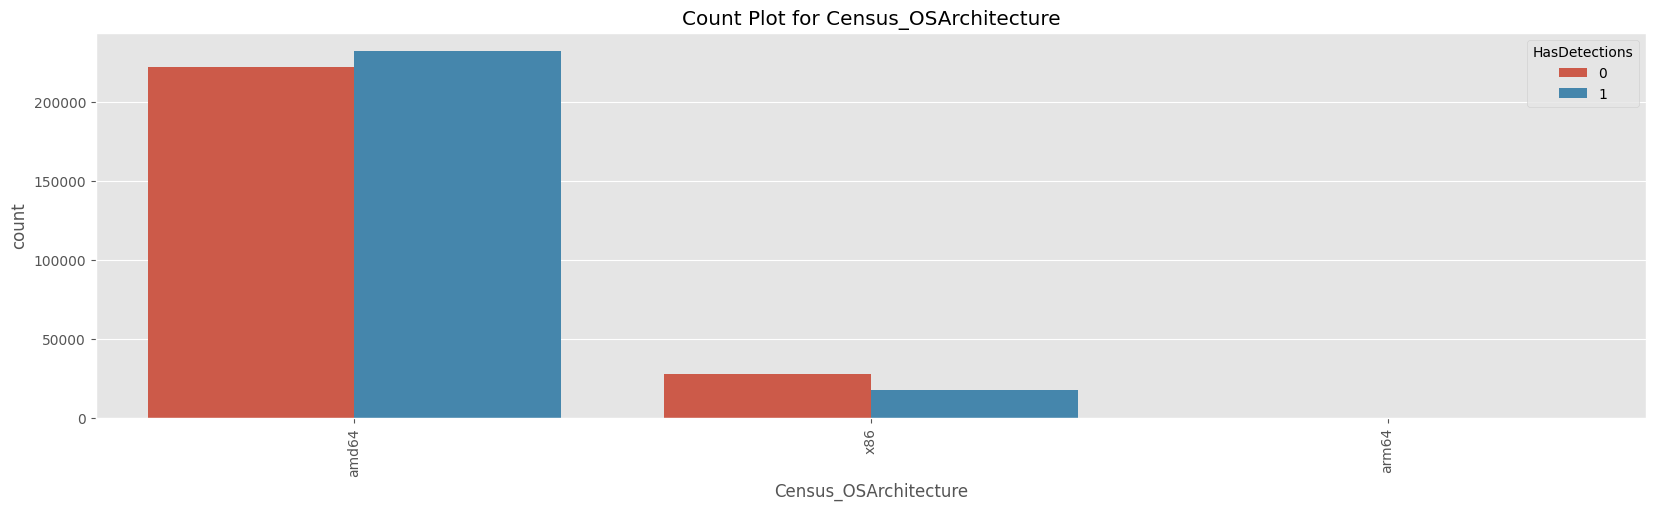



Exploring Column: Census_OSBranch



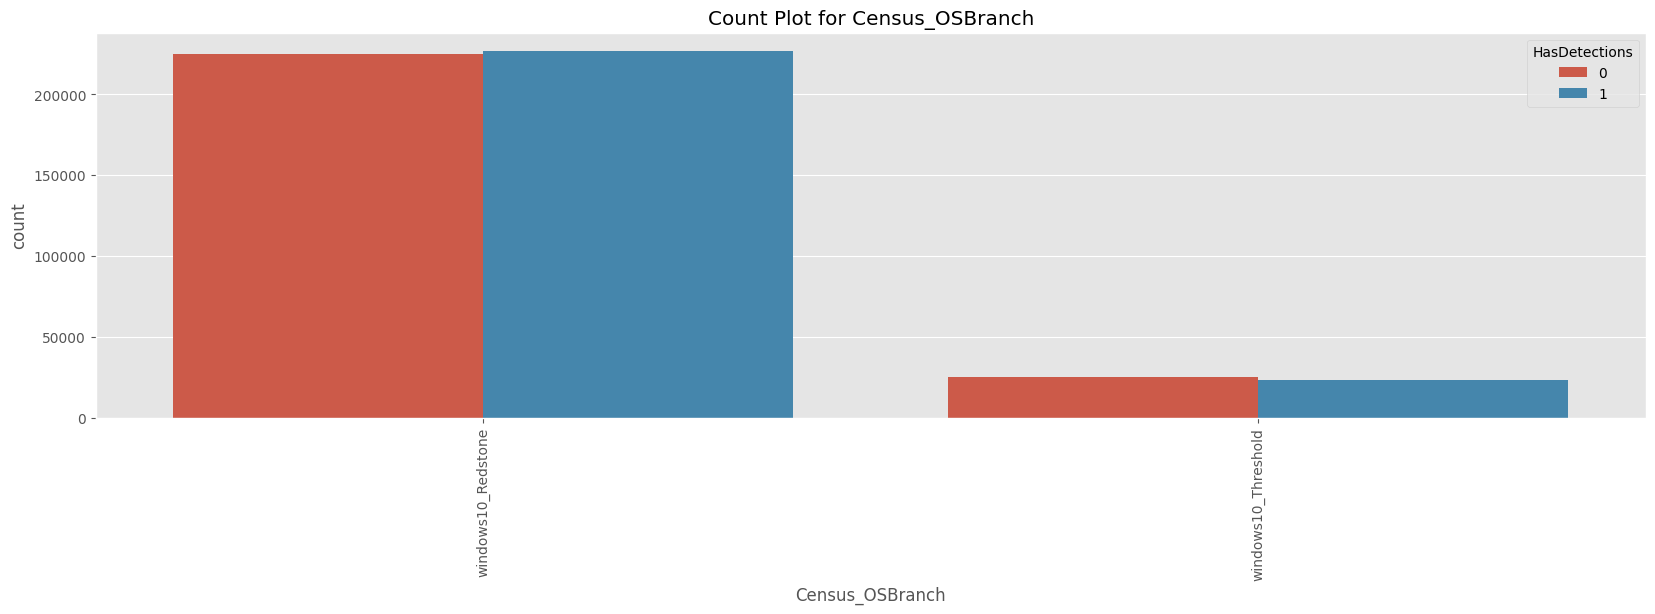



Exploring Column: Census_OSBuildNumber



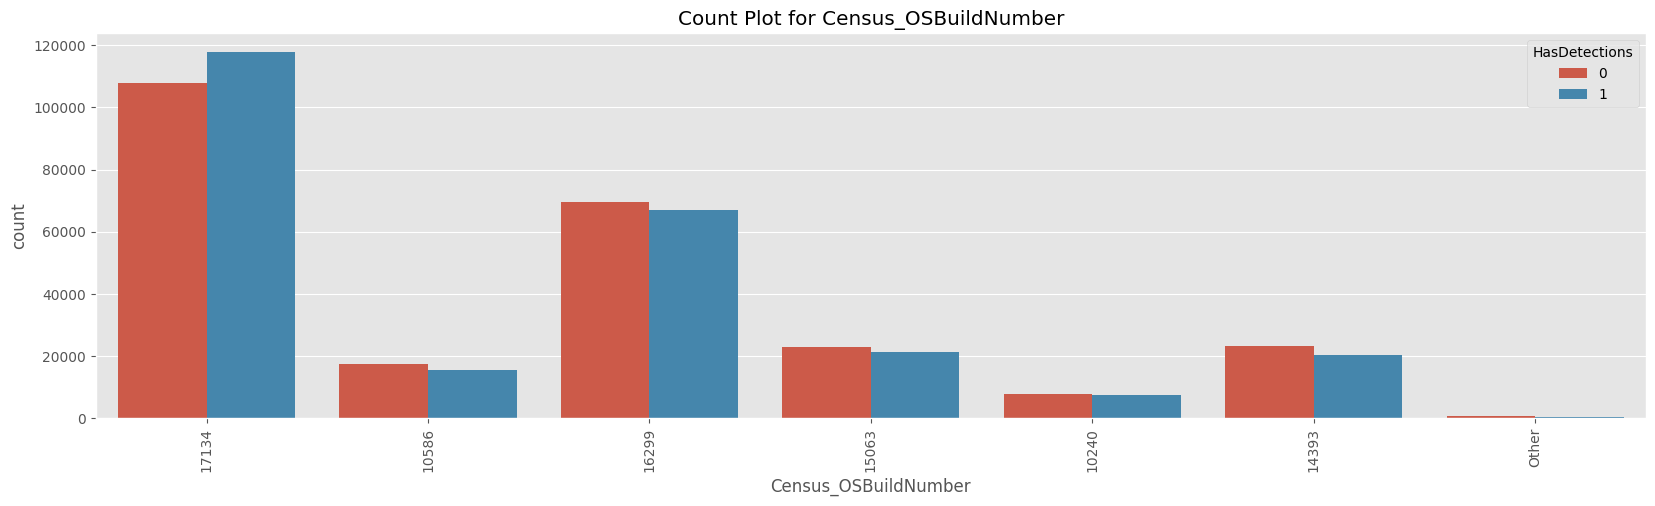



Exploring Column: Census_OSBuildRevision



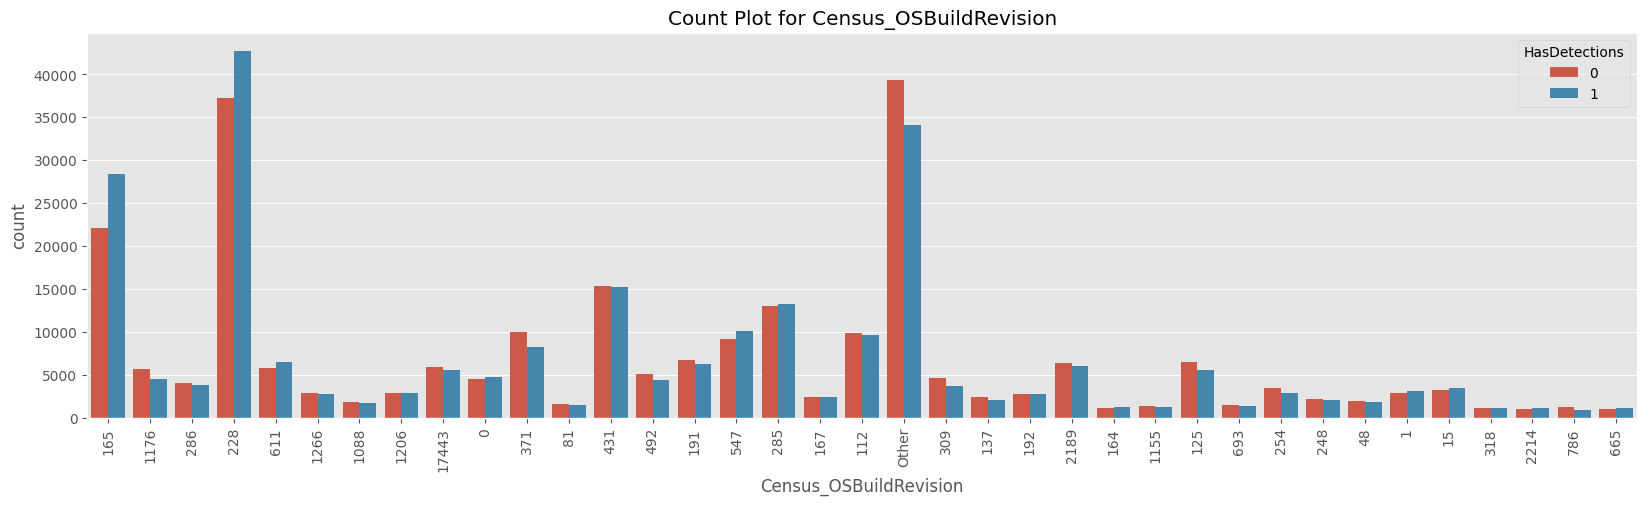



Exploring Column: Census_OSEdition



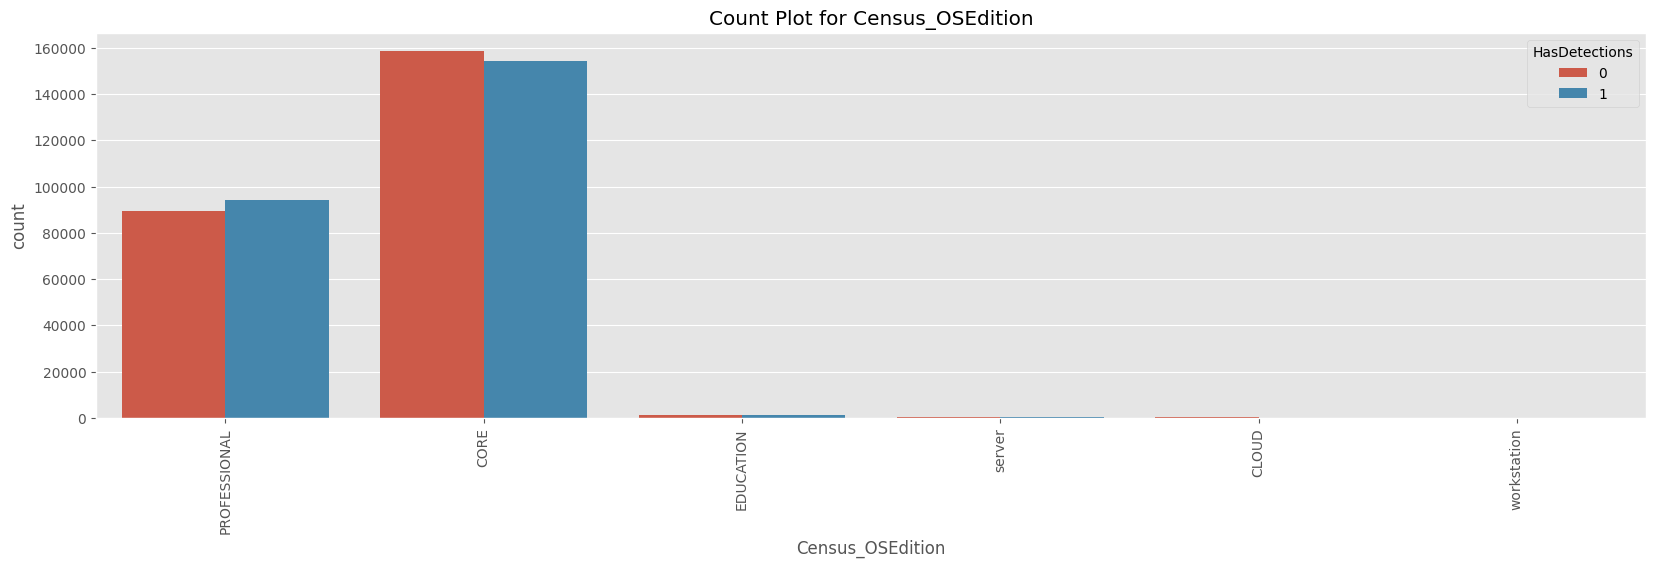



Exploring Column: Census_OSSkuName



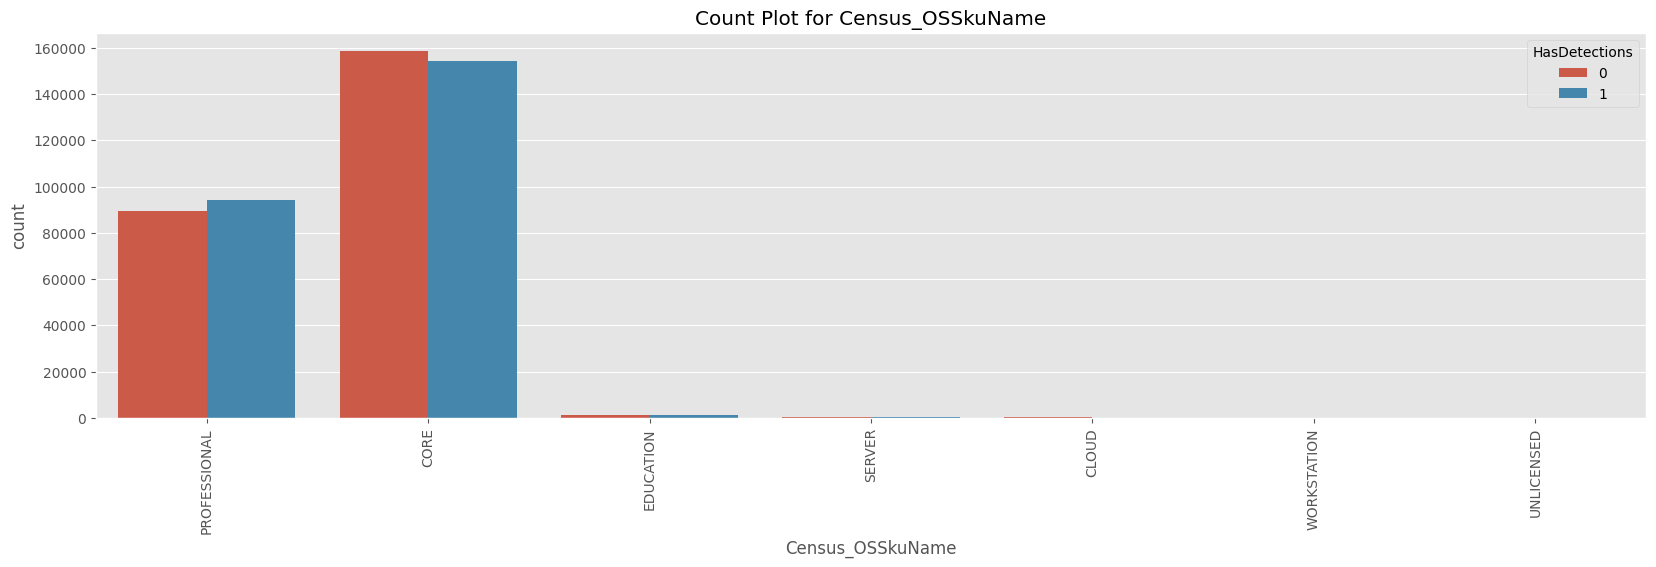



Exploring Column: Census_OSInstallTypeName



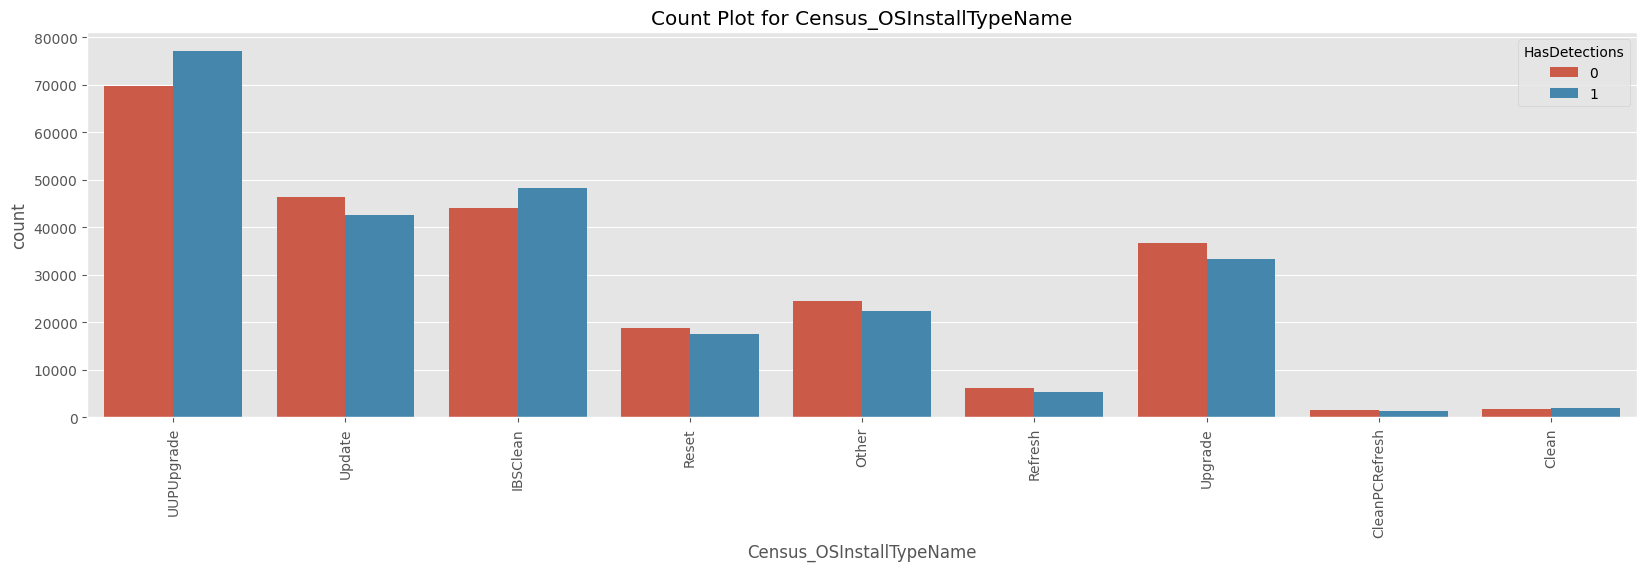



Exploring Column: Census_OSInstallLanguageIdentifier



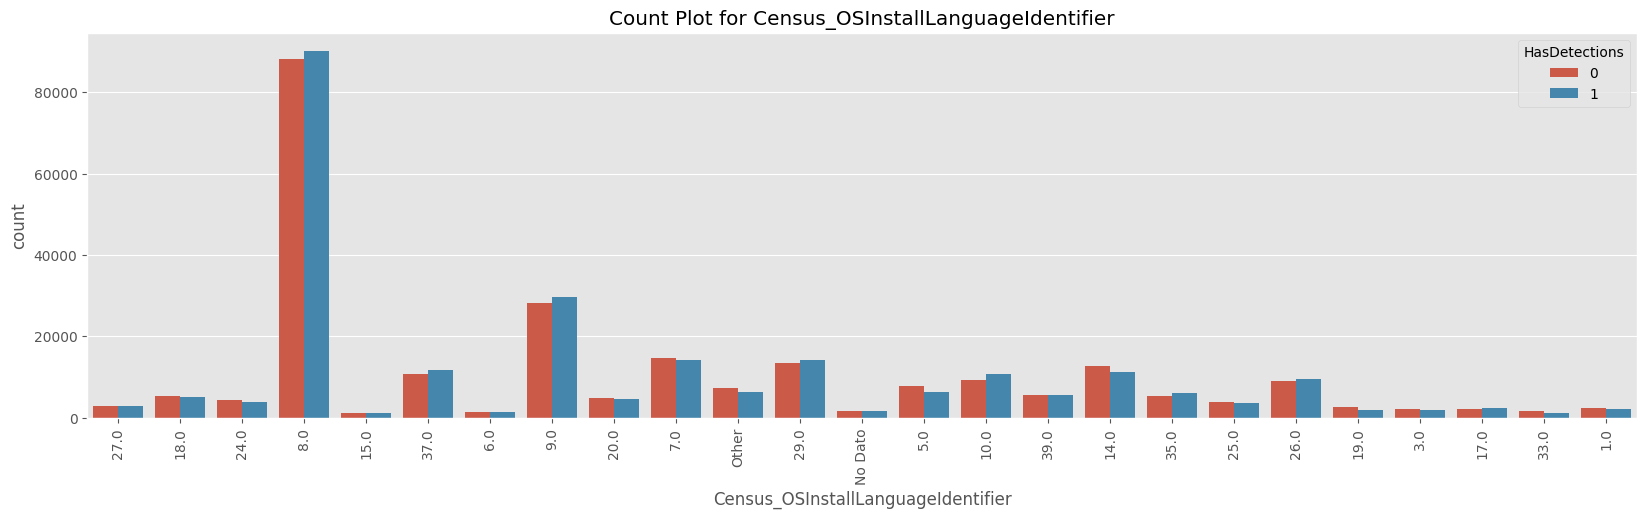



Exploring Column: Census_OSUILocaleIdentifier



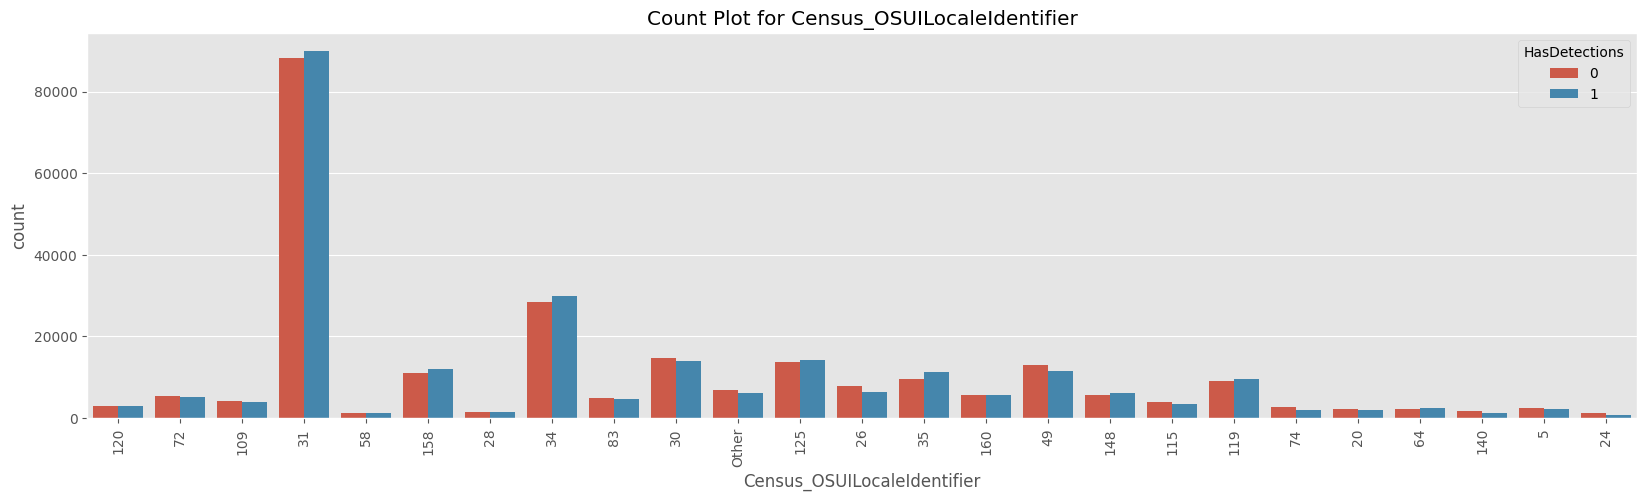



Exploring Column: Census_OSWUAutoUpdateOptionsName



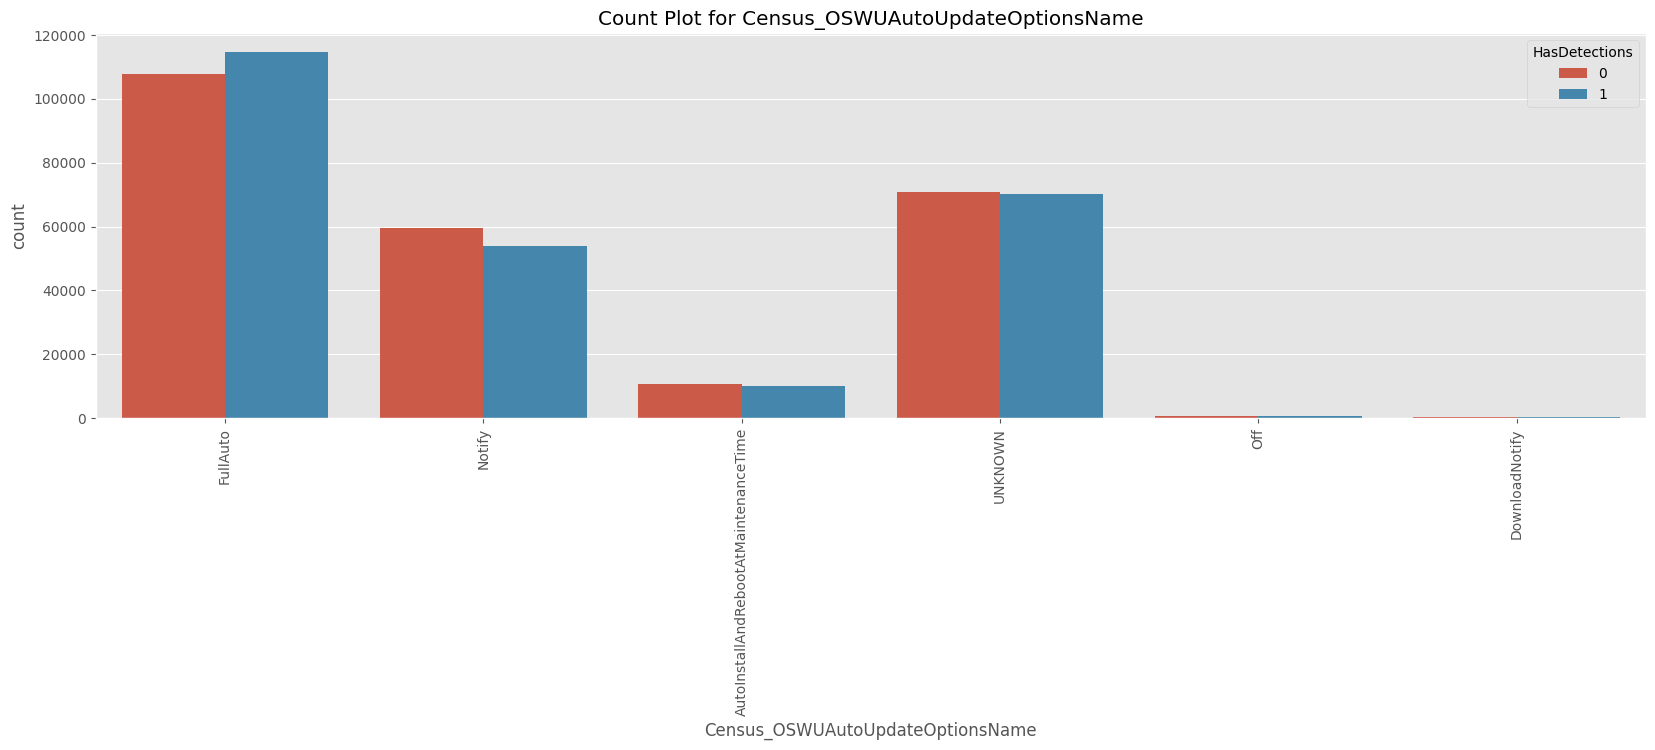



Exploring Column: Census_GenuineStateName



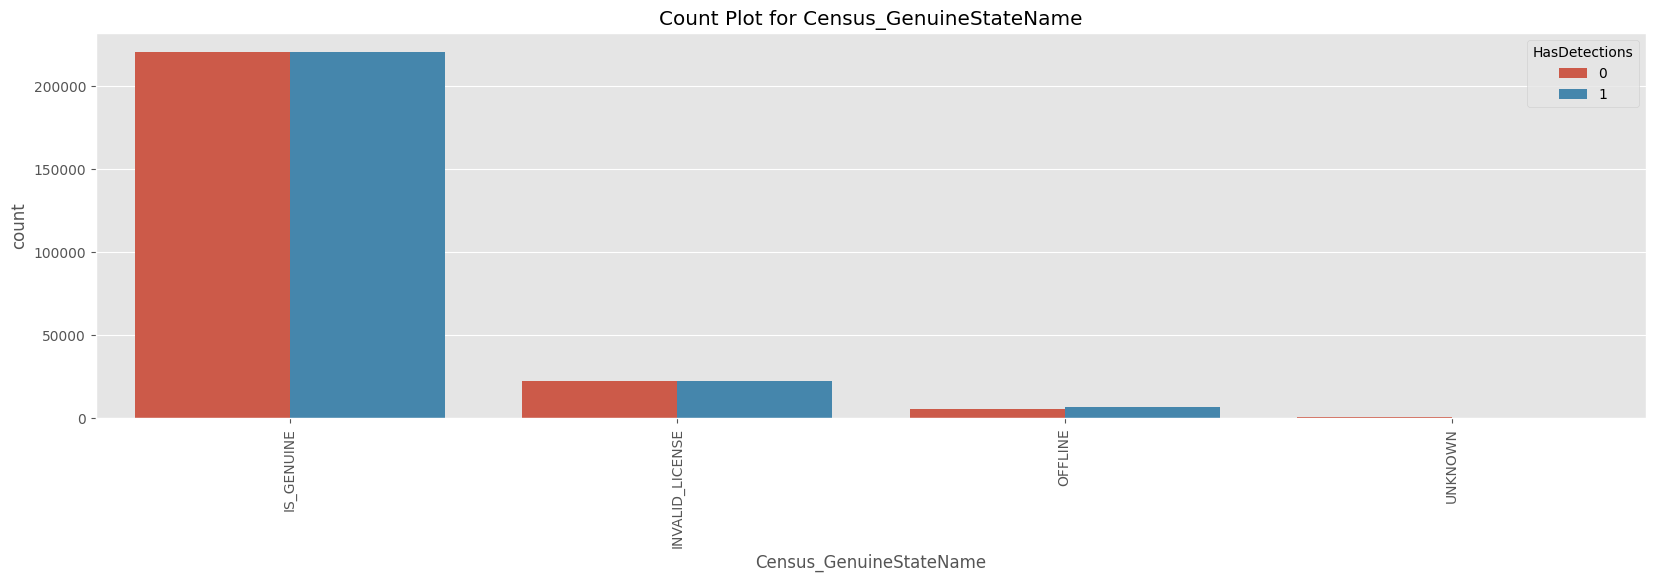



Exploring Column: Census_ActivationChannel



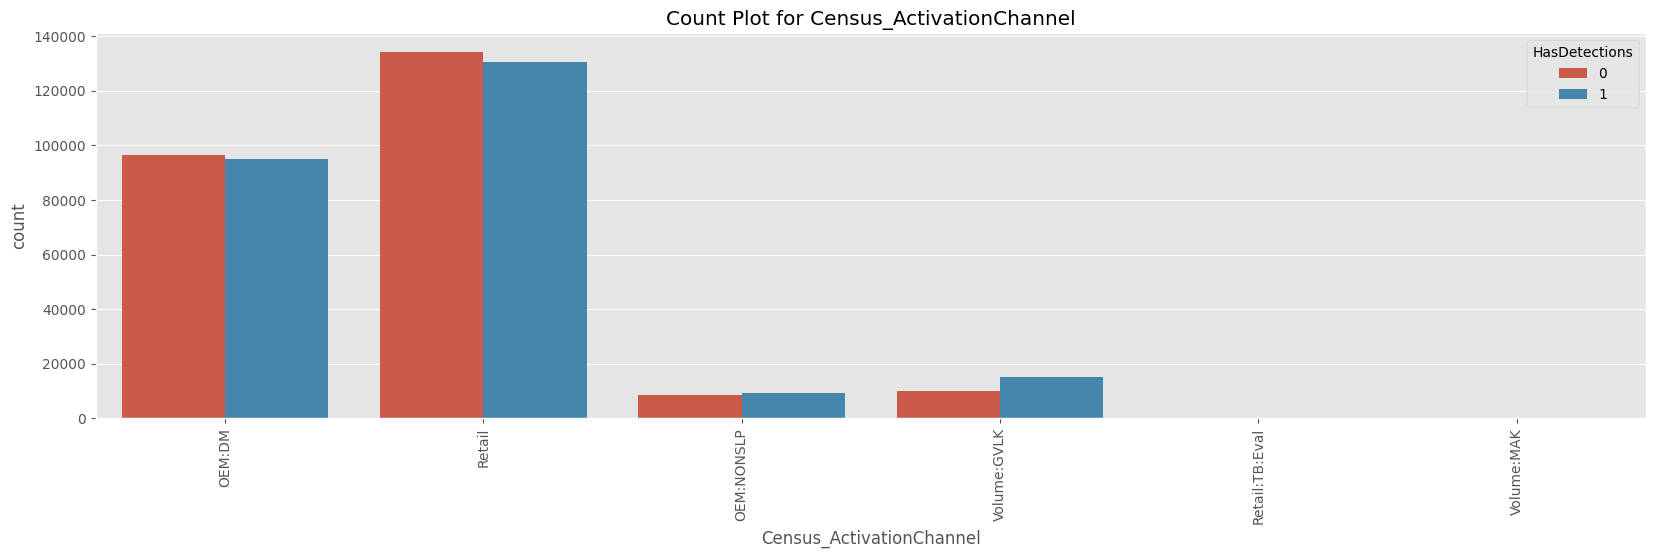



Exploring Column: Census_IsFlightingInternal



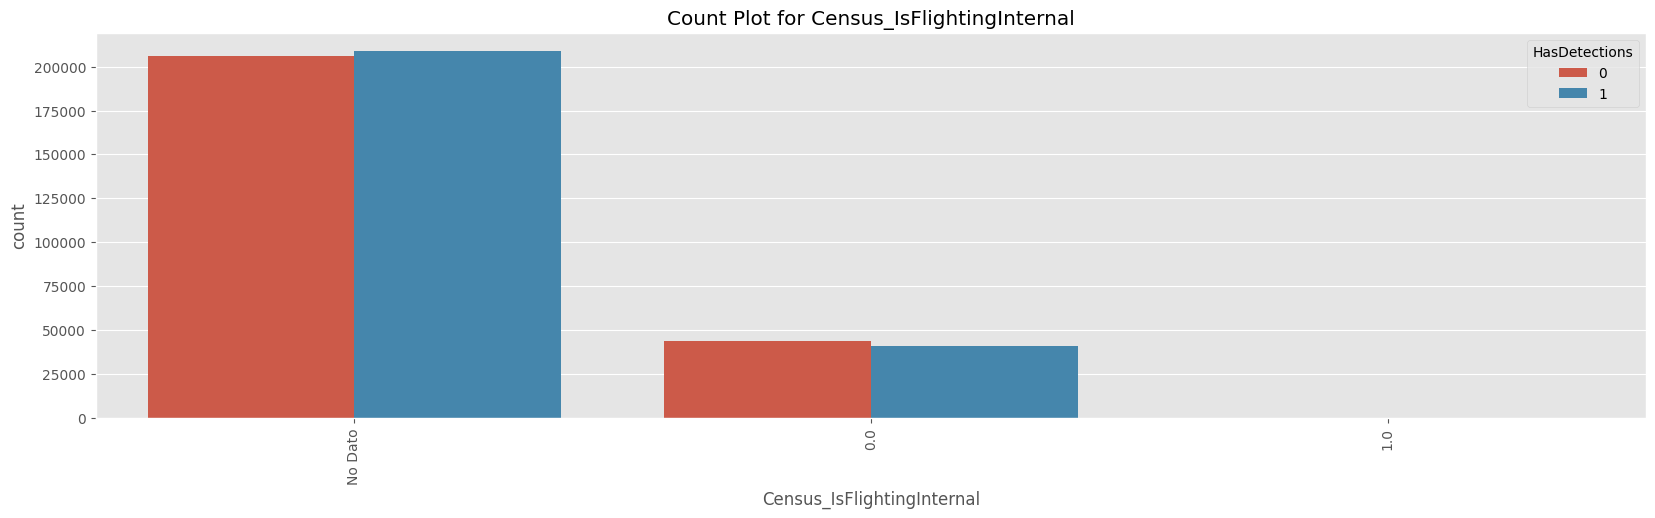



Exploring Column: Census_IsFlightsDisabled



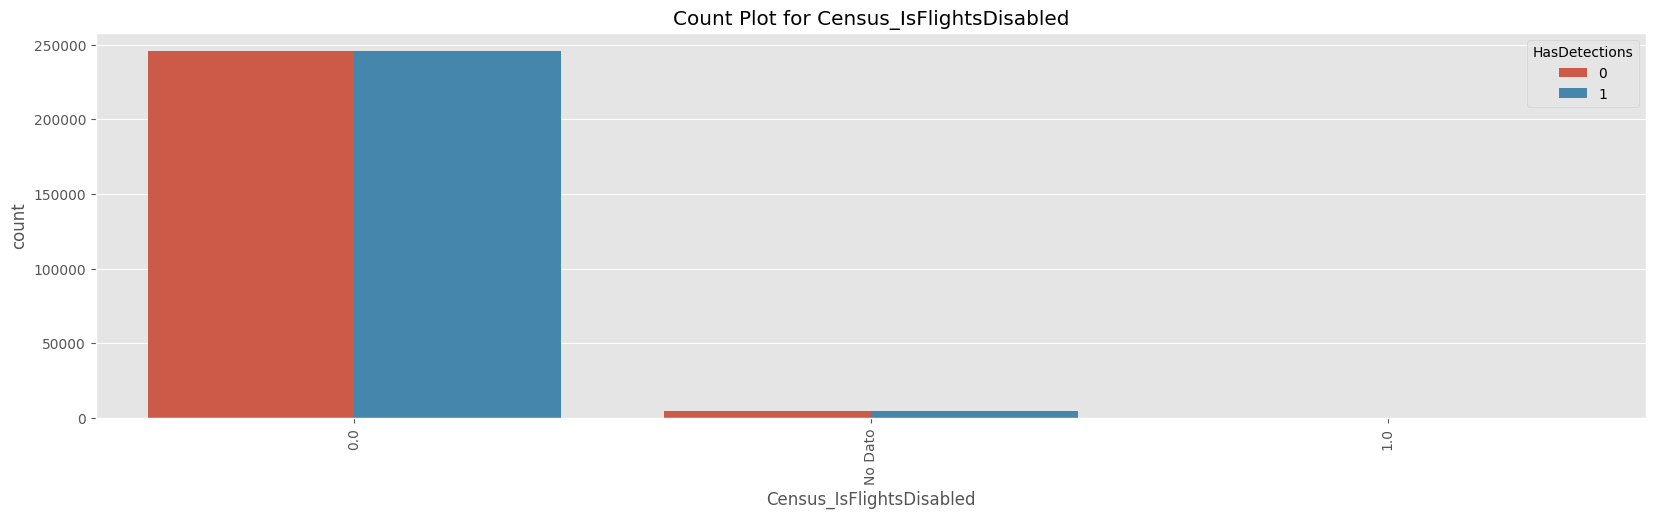



Exploring Column: Census_FlightRing



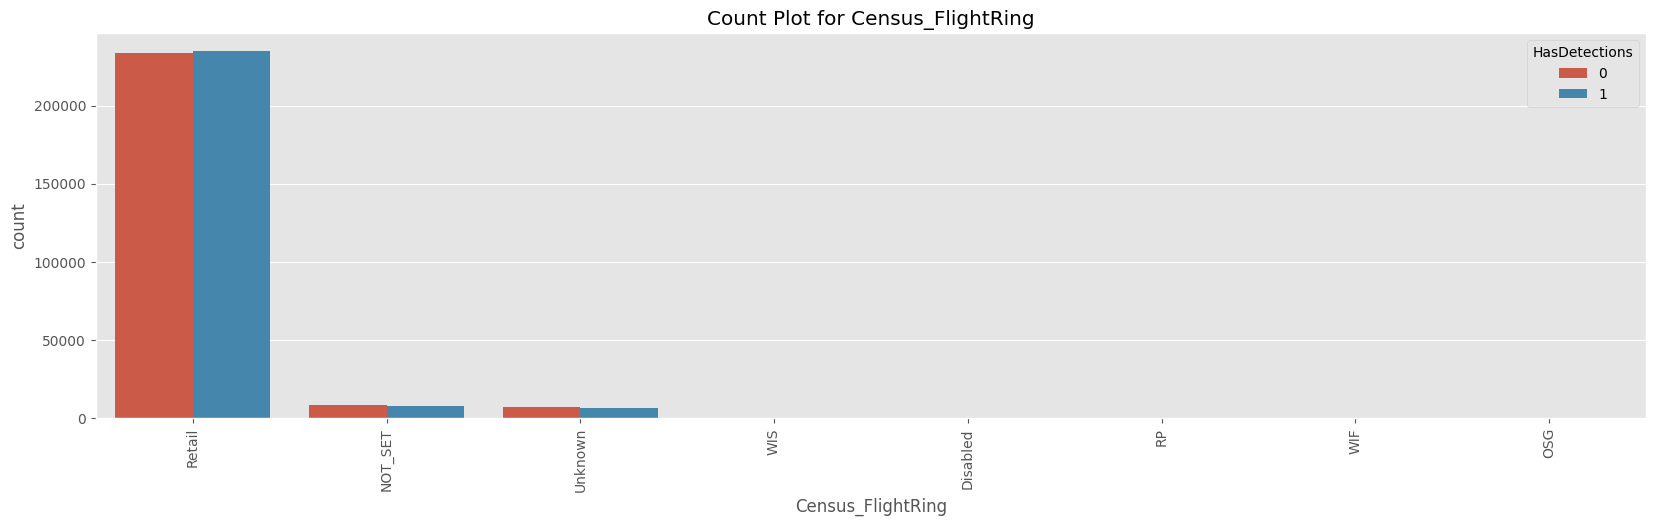



Exploring Column: Census_ThresholdOptIn



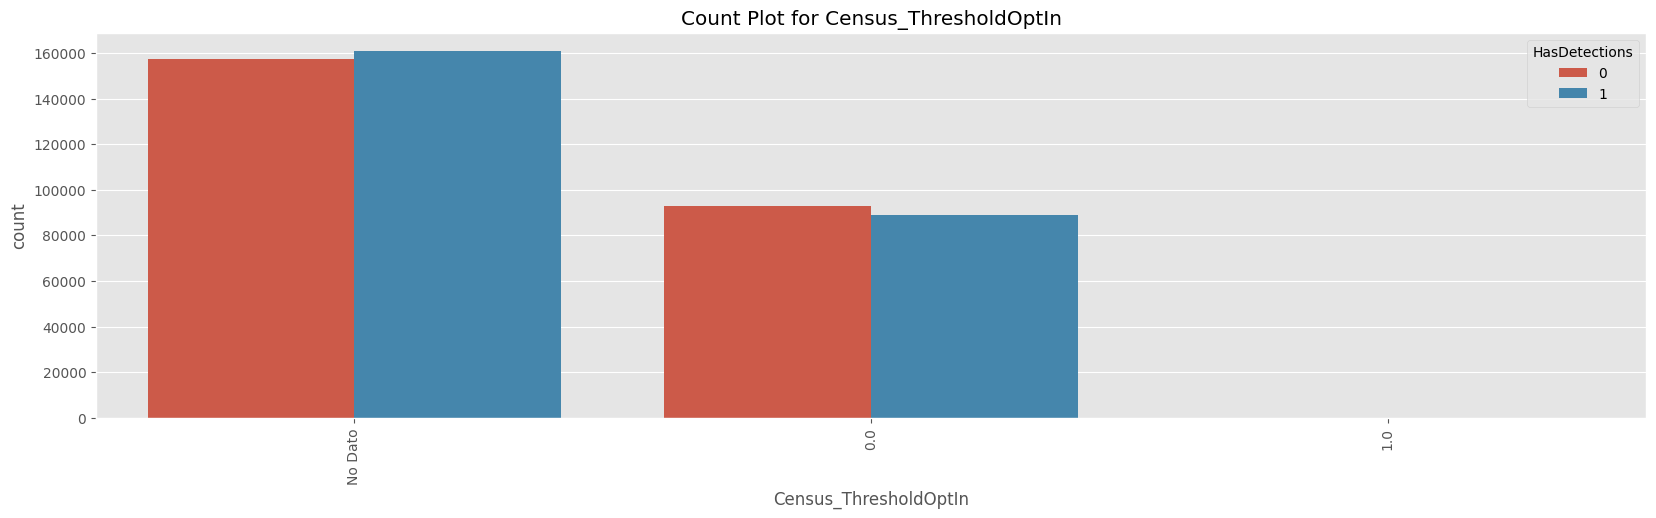



Exploring Column: Census_FirmwareManufacturerIdentifier



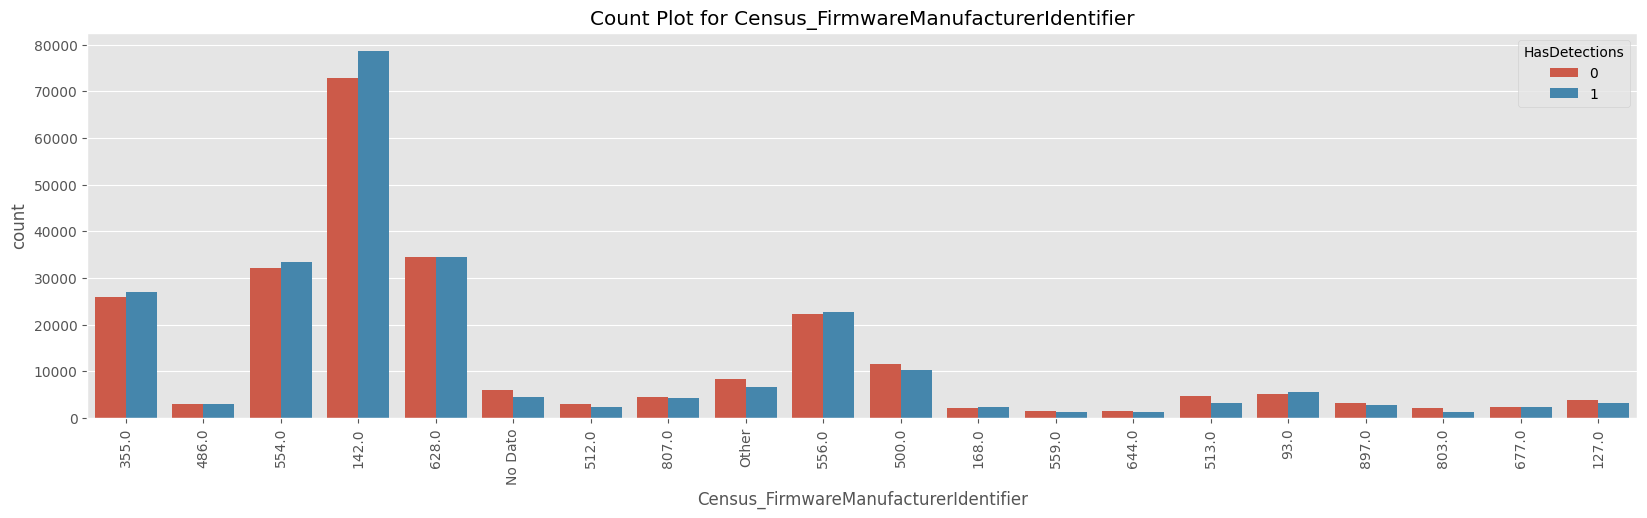



Exploring Column: Census_FirmwareVersionIdentifier



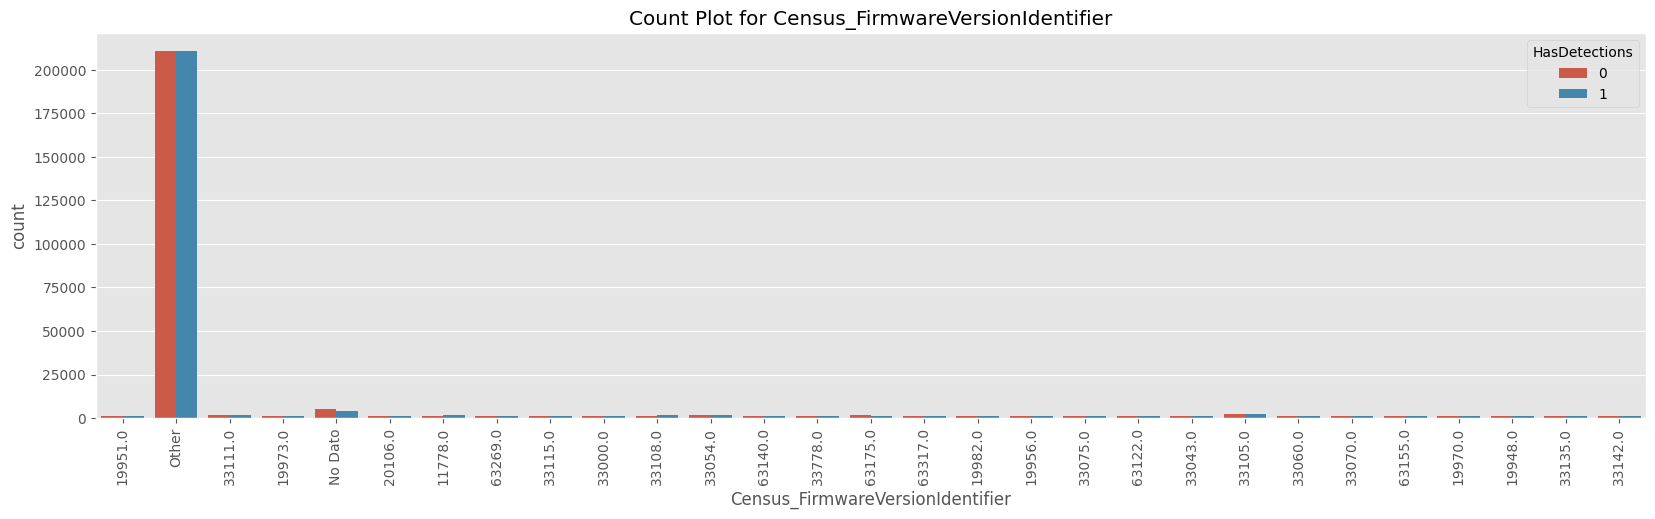



Exploring Column: Census_IsWIMBootEnabled



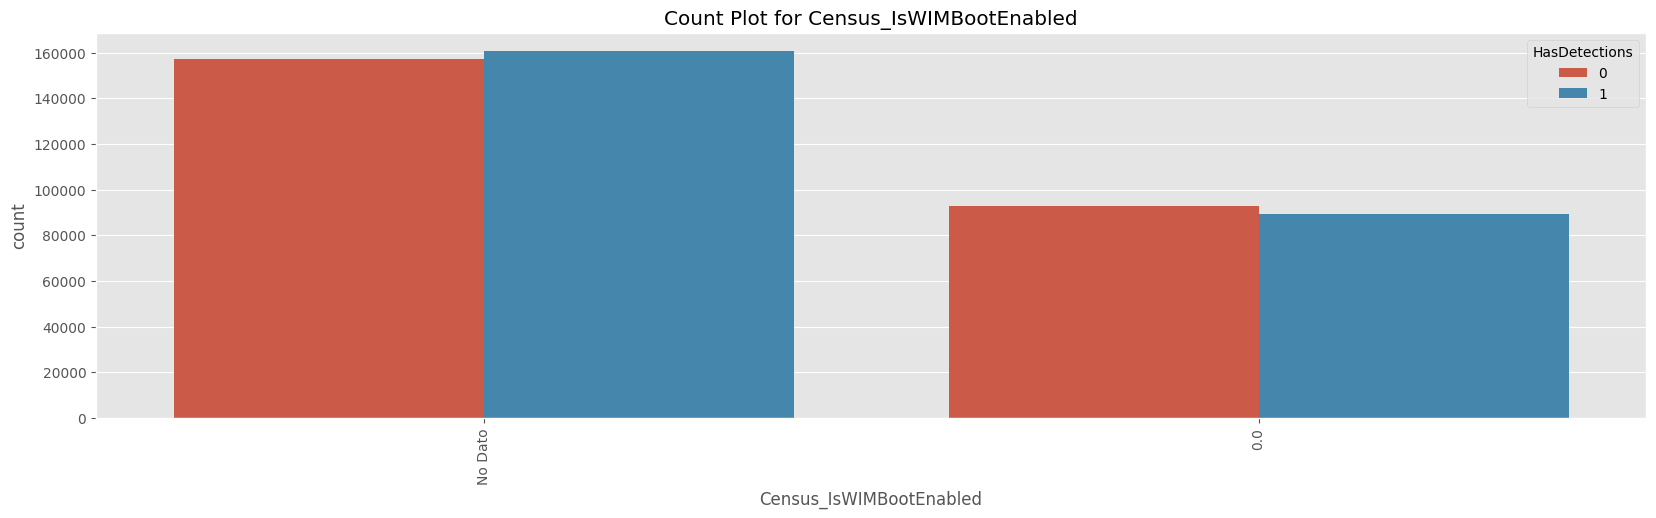



Exploring Column: Census_IsVirtualDevice



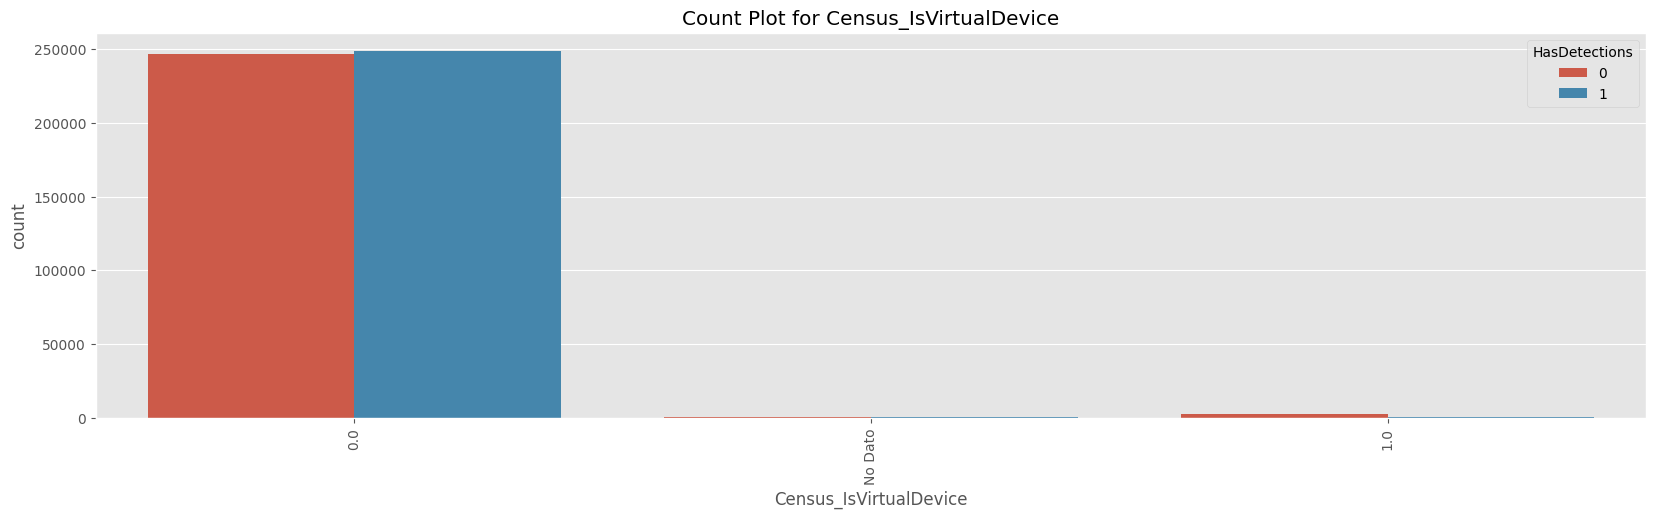



Exploring Column: Census_IsAlwaysOnAlwaysConnectedCapable



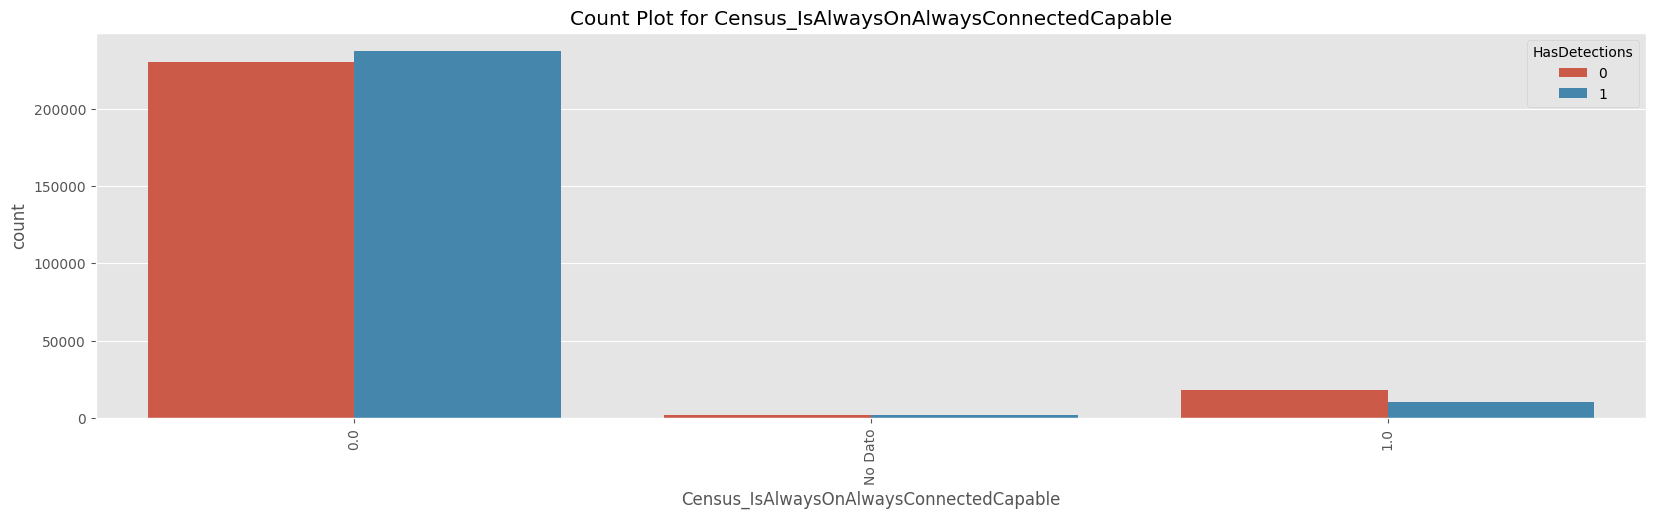



Exploring Column: Wdft_IsGamer



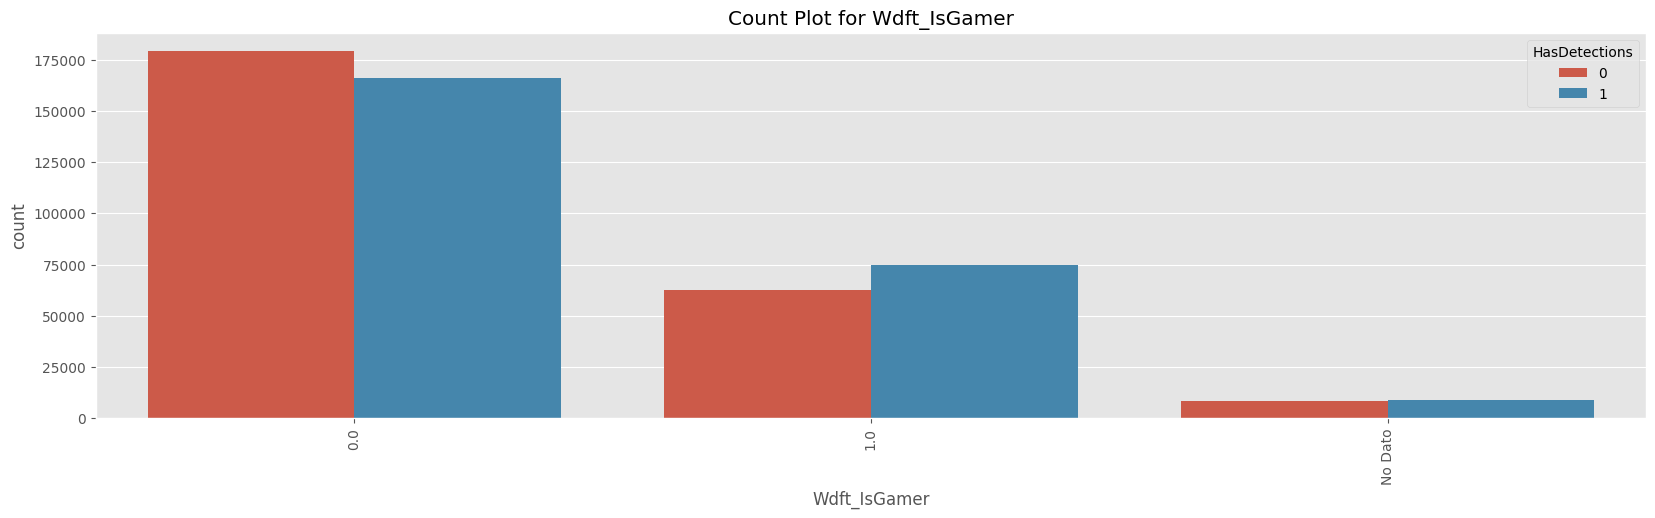



Exploring Column: Wdft_RegionIdentifier



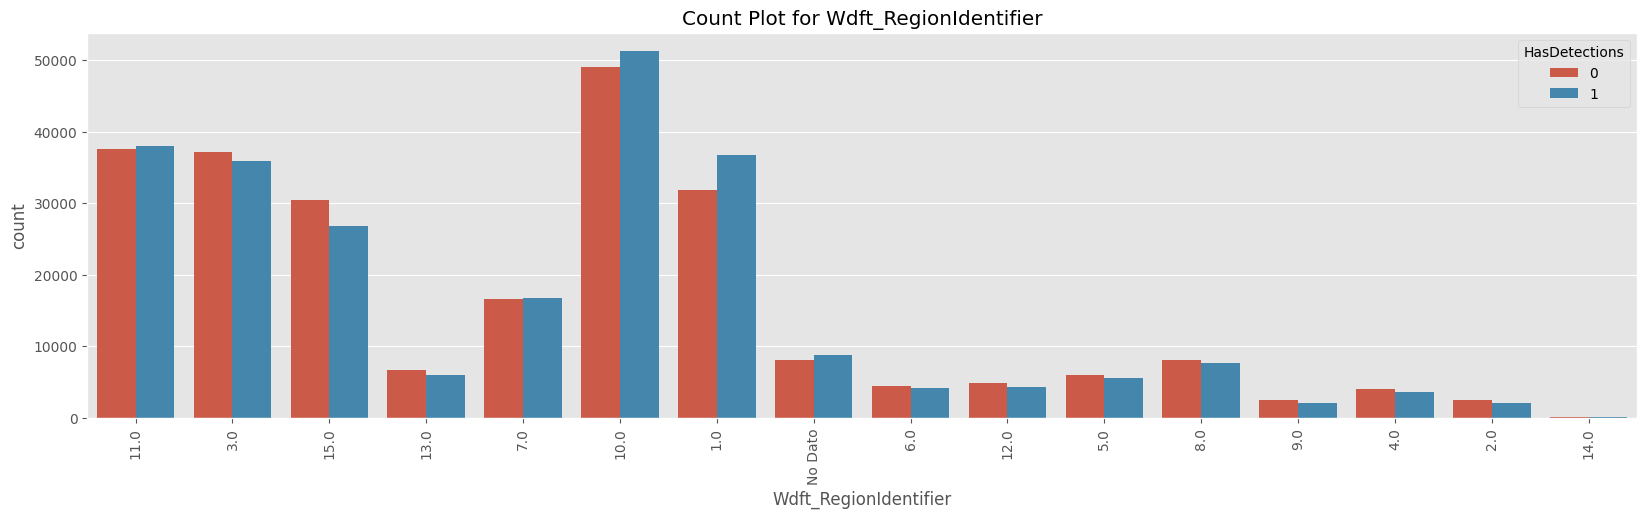

In [270]:
# Aplicamos la función
explore_categorical_columns(df3, lcat2)

# Podemos ver que no hay diferencias significativas entre los dispositivos infectados y no infectados

In [271]:
# Exploración de las variables categóricas después de la limpieza

pd.set_option('display.max_rows', None)
df3.select_dtypes(include = ['object']).describe().T

count unique  \
ProductName                                          499996      2   
RtpStateBitfield                                   499996.0    8.0   
DefaultBrowsersIdentifier                            499996      8   
AVProductStatesIdentifier                          499996.0   16.0   
CountryIdentifier                                    499996     63   
CityIdentifier                                       499996     20   
OrganizationIdentifier                             499996.0    8.0   
GeoNameIdentifier                                  499996.0   53.0   
LocaleEnglishNameIdentifier                          499996     43   
Platform                                             499996      4   
Processor                                            499996      3   
OsVer                                                499996      3   
OsBuild                                              499996      9   
OsSuite                                              499996      4   
OsPlatformSubRelease                                 499996      3   
OsBuildLab                                           499996      3   
SkuEdition                                           499996      7   
IsProtected                                        499996.0    3.0   
PuaMode                                              499996      2   
SMode                                              499996.0    3.0   
IeVerIdentifier                                    499996.0   18.0   
Firewall                                           499996.0    3.0   
UacLuaenable                                       499996.0    3.0   
Census_MDC2FormFactor                                499996      8   
Census_DeviceFamily                                  499996      2   
Census_OEMNameIdentifier                           499996.0   24.0   
Census_OEMModelIdentifier                            499996     13   
Census_ProcessorCoreCount                          499996.0    9.0   
Census_ProcessorManufacturerIdentifier             499996.0    4.0   
Census_ProcessorModelIdentifier                      499996     52   
Census_ProcessorClass                                499996      4   
Census_PrimaryDiskTotalCapacity                    499996.0   19.0   
Census_PrimaryDiskTypeName                           499996      4   
Census_SystemVolumeTotalCapacity                     499996      9   
Census_TotalPhysicalRAM                            499996.0   11.0   
Census_ChassisTypeName                               499996     13   
Census_InternalPrimaryDiagonalDisplaySizeInInches  499996.0   36.0   
Census_InternalPrimaryDisplayResolutionHorizontal  499996.0   13.0   
Census_InternalPrimaryDisplayResolutionVertical    499996.0   14.0   
Census_PowerPlatformRoleName                         499996      7   
Census_InternalBatteryType                           499996      5   
Census_InternalBatteryNumberOfCharges              499996.0    5.0   
Census_OSArchitecture                                499996      3   
Census_OSBranch                                      499996      2   
Census_OSBuildNumber                                 499996      7   
Census_OSBuildRevision                               499996     37   
Census_OSEdition                                     499996      6   
Census_OSSkuName                                     499996      7   
Census_OSInstallTypeName                             499996      9   
Census_OSInstallLanguageIdentifier                 499996.0   25.0   
Census_OSUILocaleIdentifier                          499996     25   
Census_OSWUAutoUpdateOptionsName                     499996      6   
Census_GenuineStateName                              499996      4   
Census_ActivationChannel                             499996      6   
Census_IsFlightingInternal                           499996      3   
Census_IsFlightsDisabled                           499996.0    3.0   
Census_FlightRing                                    499996     

##### Booleans

In [272]:
# Generamos CountPlots para las variables boolean

def explore_boolean_columns(df, lbool2):
    for column in lbool2:
        # Imprimir nombre de la columna
        print(f"\n\nExploring Column: {column}\n")

        # Countplot
        plt.figure(figsize=[15, 5])
        sns.countplot(data=df3, x=column, hue='HasDetections')
        plt.title(f'Count Plot for {column}')
        plt.show()




Exploring Column: IsBeta



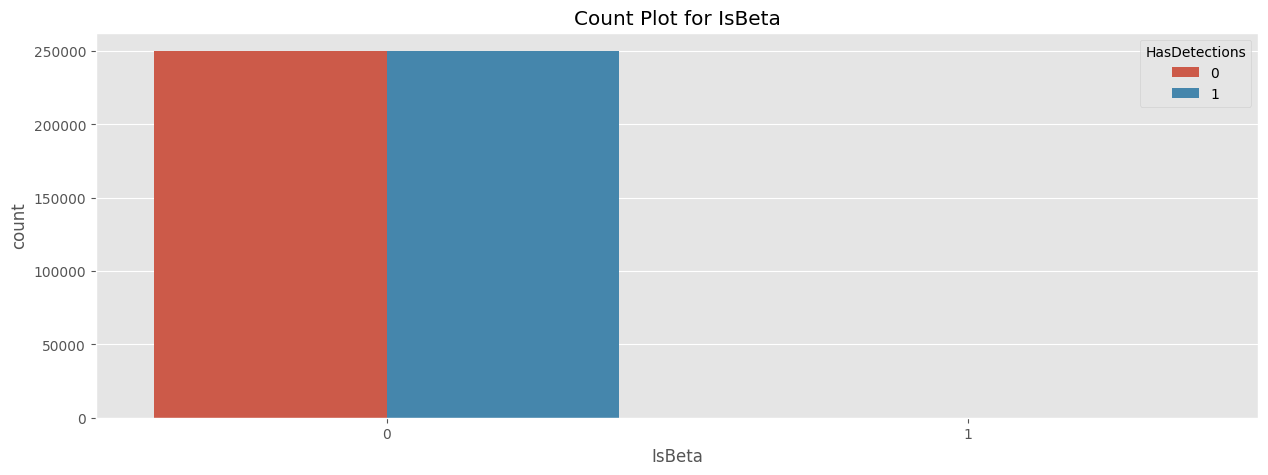



Exploring Column: IsSxsPassiveMode



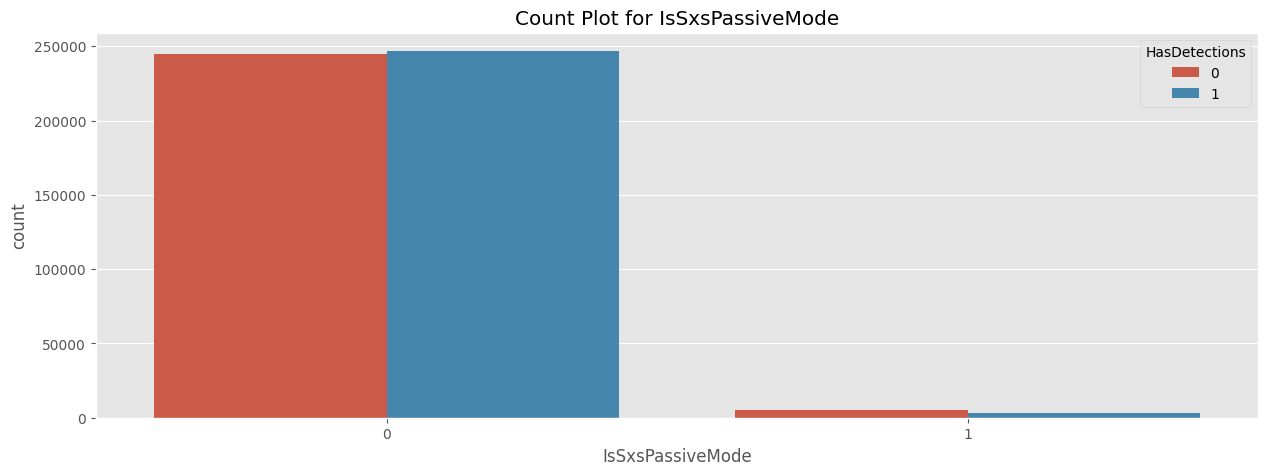



Exploring Column: HasTpm



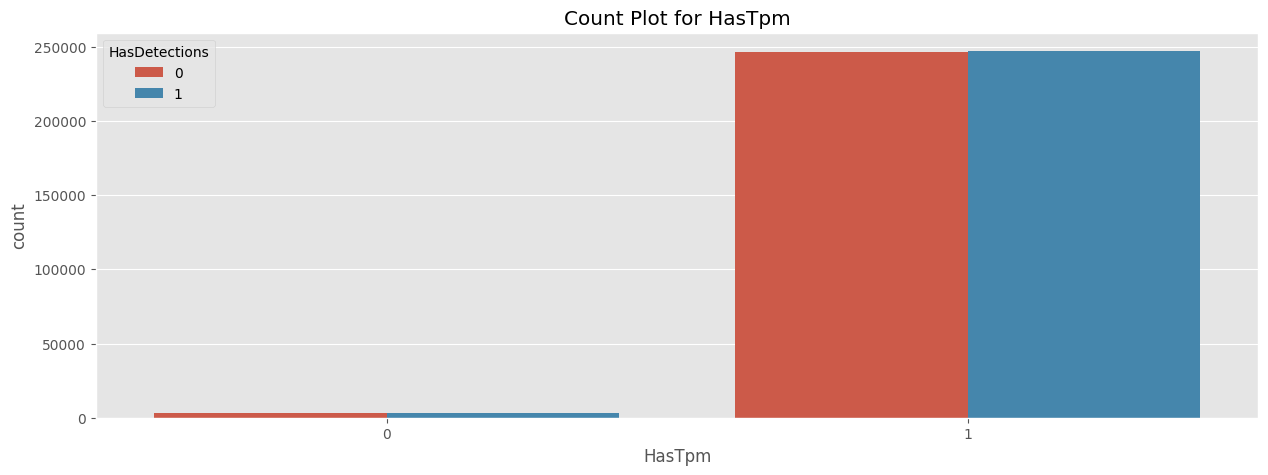



Exploring Column: AutoSampleOptIn



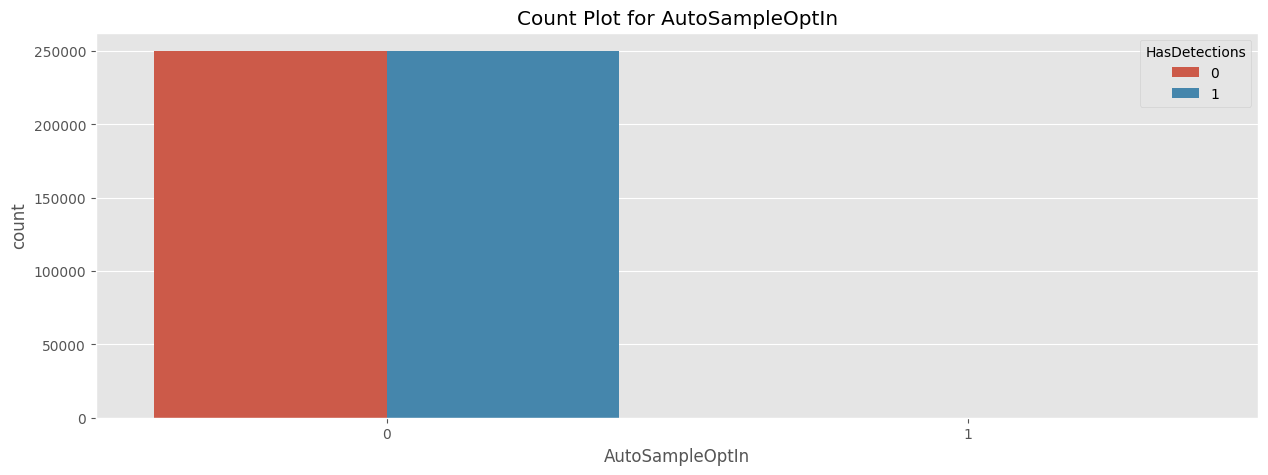



Exploring Column: Census_HasOpticalDiskDrive



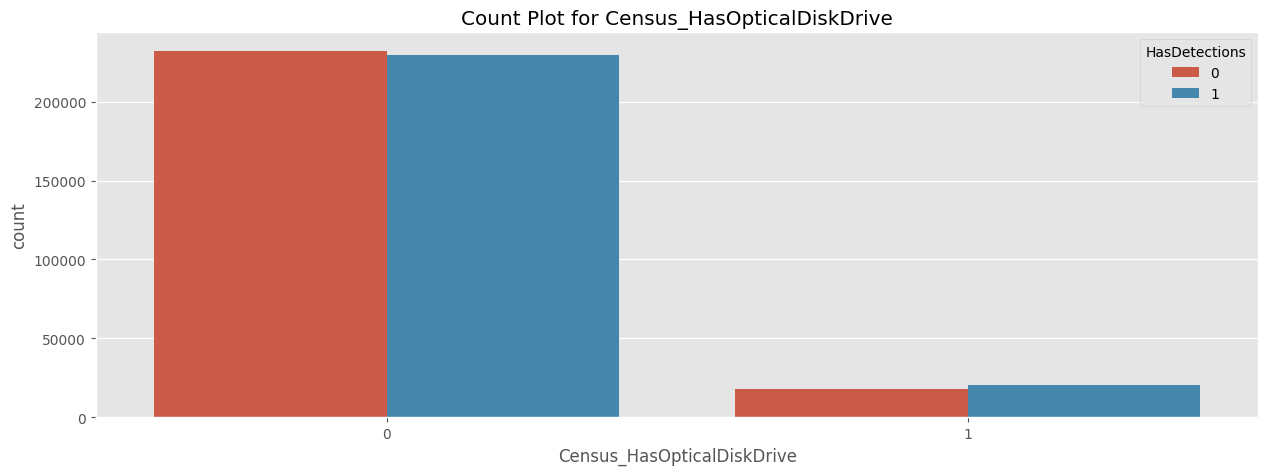



Exploring Column: Census_IsPortableOperatingSystem



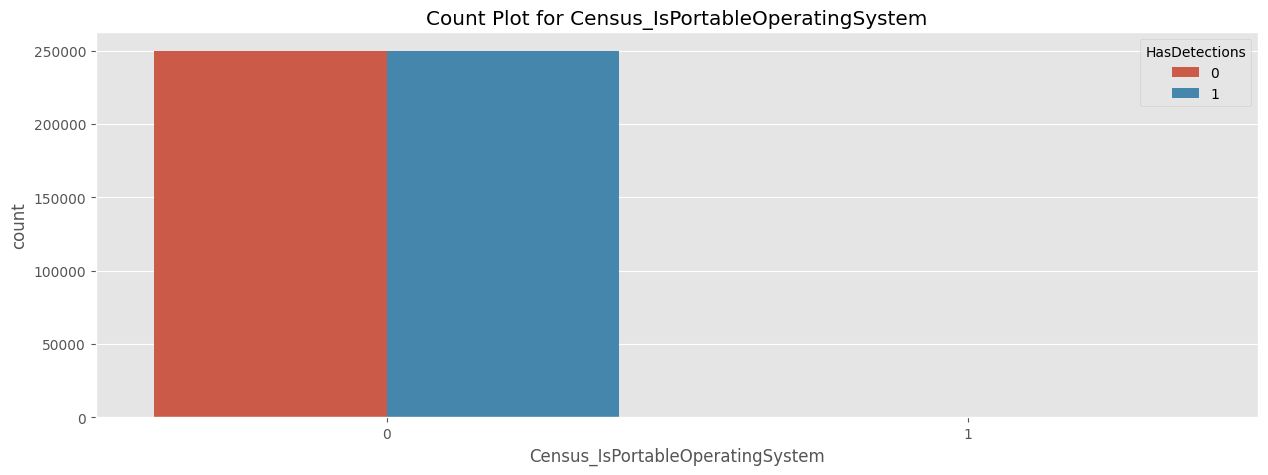



Exploring Column: Census_IsSecureBootEnabled



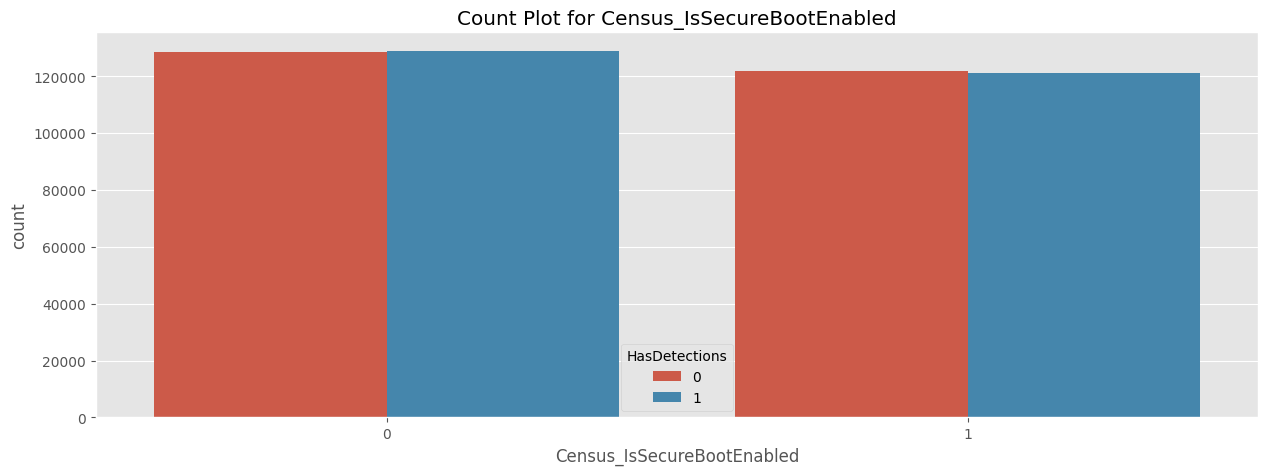



Exploring Column: Census_IsTouchEnabled



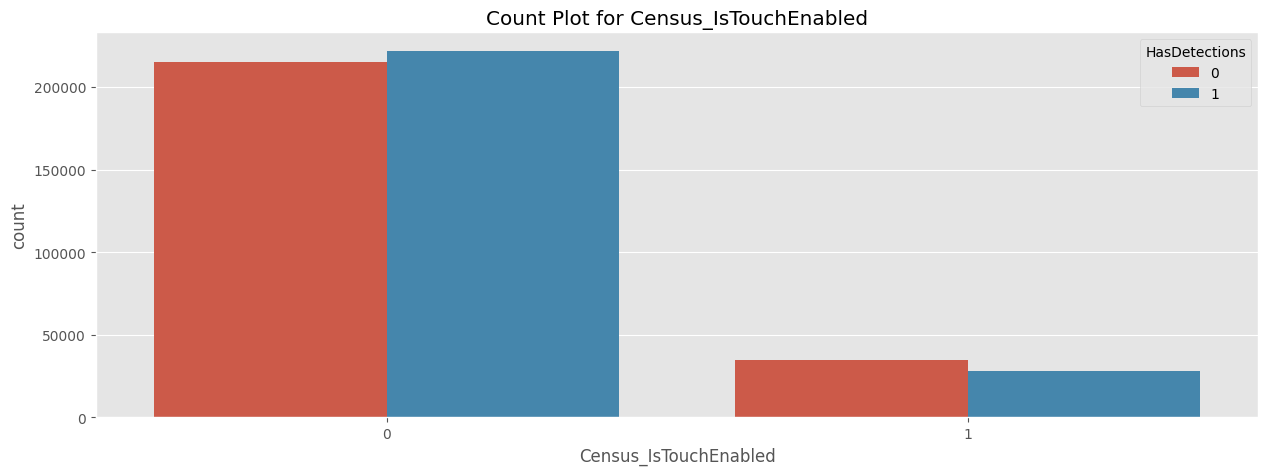



Exploring Column: Census_IsPenCapable



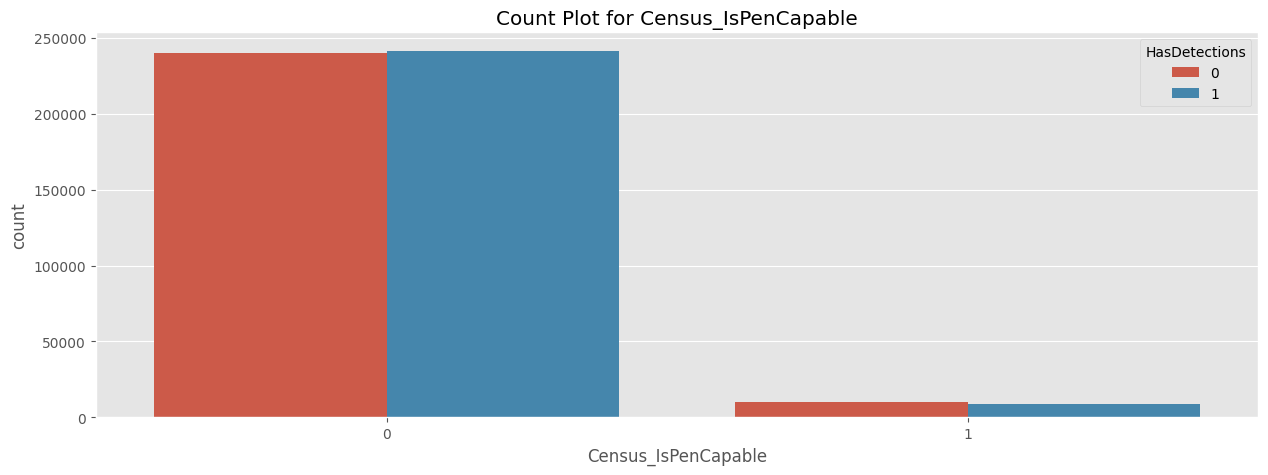

In [273]:
# Aplicamos la función
explore_boolean_columns(df3, lbool2)

# Podemos ver que no hay diferencias significativas entre los dispositivos infectados y no infectados